<a href="https://colab.research.google.com/github/carlitos9087/Analises_de_amostras/blob/main/Analises_de_amostras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#bibliotecas


In [2]:
import numpy as np
import re
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
caminho = "/content/drive/MyDrive/Laboratory/Alunos/Cadu/SRR files/normalizados/"
#Aspergilus
GSE55648 = caminho+"Aspergilus/GSE55648(homo sapiens).xlsx-Log2 RPKM-.xlsx"

#candida albicans
GSE120012 = caminho+"Candida albicans/GSE120012(Mus musculus).xlsx-Log2 RPKM-.xlsx"
GSE184104 = caminho+"Candida albicans/GSE184104(Mus musculus).xlsx-Log2 RPKM-.xlsx" #12 mus

#HIV
GSE103666 = caminho+"HIV/GSE103666(homo sapiens).xlsx-Log2 RPKM-.xlsx"
GSE148796 = caminho+"HIV/GSE148796(homo sapiens).xlsx-Log2 RPKM-.xlsx"
GSE156072 = caminho+"HIV/GSE156072(homo sapiens).xlsx-Log2 RPKM-.xlsx"

#Leishmania
GSE162760 = caminho+"Leishmania/GSE162760.xlsx-Log2 RPKM-.xlsx"
GSE185253 = caminho+"Leishmania/GSE185253.xlsx-Log2 RPKM-.xlsx"
GSE189385 = caminho+"Leishmania/GSE189385.xlsx-Log2 RPKM-.xlsx"
PRJEB36928= caminho+"Leishmania/PRJEB36928.xlsx-Log2 RPKM-.xlsx"
PRJNA290995= caminho+"Leishmania/PRJNA290995.xlsx-Log2 RPKM-.xlsx"
PRJNA516707 = caminho+"Leishmania/PRJNA516707.xlsx-Log2 RPKM-.xlsx" #3 homo
PRJNA552352 = caminho+"Leishmania/PRJNA552352.xlsx-Log2 RPKM-.xlsx"
PRJNA601732 = caminho+"Leishmania/PRJNA601732.xlsx-Log2 RPKM-.xlsx"# musmu 30
PRJNA633893 = caminho+"Leishmania/PRJNA633893.xlsx-Log2 RPKM-.xlsx"
PRJNA656921 = caminho+"Leishmania/PRJNA656921.xlsx-Log2 RPKM-.xlsx"
PRJNA838552 = caminho+"Leishmania/PRJNA838552.xlsx-Log2 RPKM-.xlsx"
SRP009251 = caminho+"Leishmania/SRP009251.xlsx-Log2 RPKM-.xlsx"
SRP069976 = caminho+"Leishmania/SRP069976.xlsx-Log2 RPKM-.xlsx"
SRP377060 = caminho+"Leishmania/SRP377060.xlsx-Log2 RPKM-.xlsx"

#M_tuberculosis
GSE100897 = caminho+"M_tuberculosis/GSE100897.xlsx-Log2 RPKM-.xlsx"
GSE141656 = caminho+"M_tuberculosis/GSE141656.xlsx-Log2 RPKM-.xlsx"
PRJNA707548 = caminho+"M_tuberculosis/PRJNA707548.xlsx-Log2 RPKM-.xlsx"
SRP151491 = caminho+"M_tuberculosis/SRP151491.xlsx-Log2 RPKM-.xlsx" # 18 mus
SRP185421 = caminho+"M_tuberculosis/SRP185421.xlsx-Log2 RPKM-.xlsx"

#SARS-CoV-2
GSE163668 = caminho+"SARS-CoV-2/GSE163668(homo sapiens).xlsx-Log2 RPKM-.xlsx"
GSE163959 = caminho+"SARS-CoV-2/GSE163959(homo sapiens).xlsx-Log2 RPKM-.xlsx" #homo 20
GSE166253 = caminho+"SARS-CoV-2/GSE166253(homo sapiens).xlsx-Log2 RPKM-.xlsx"
GSE167749 = caminho+"SARS-CoV-2/GSE167749(mus musculus).xlsx-Log2 RPKM-.xlsx"

#Aspergilus

##GSE55648

In [ ]:
GSE55648_tab = pd.read_excel(GSE55648 )
GSE55648_tab.head()

Nome  \
0   YTHDF 1   
1   YTHDF 2   
2  YTHDF 3    
3   YTHDC 1   
4       FTO   

   Fungus _and _Neutrophils _were _cultivated _separably _over _selected _time _points _and _were _united _for _RNA _isolation _SRR1184521  \
0                                           2.880477                                                                                         
1                                           2.829851                                                                                         
2                                           5.399966                                                                                         
3                                           0.000000                                                                                         
4                                           2.026767                                                                                         

   Fungus _and _Neutrophils _were _cultivated _separably _over _selected _time _points _and _were _united _for _RNA _isolation _SRR1184522  \
0                                           5.334035                                                                                         
1                                           0.000000                                                                                         
2                                           4.946633                                                                                         
3                                           0.000000                                                                                         
4                                           0.000000                                                                                         

   Fungus _and _Neutrophils _were _cultivated _separably _over _selected _time _points _and _were _united _for _RNA _isolation _SRR1184523  \
0                                           4.445297                                                                                         
1                                           1.224746                                                                                         
2                                           3.209898                                                                                         
3                                           0.000000                                                                                         
4                                           0.000000                                                                                         

   Fungus _and _Neutrophils _were _cultivated _separably _over _selected _time _points _and _were _united _for _RNA _isolation _SRR1184524  \
0                                           5.809671                                                                                         
1                                           5.022080                                                                                         
2                                           6.670197                                                                                         
3                                           0.000000                                                                                         
4                                           0.000000                                                                                         

   Fungus _and _Neutrophils _were _cultivated _separably _over _selected _time _points _and _were _united _for _RNA _isolation _SRR1184525  \
0                                           5.574809                                                                                         
1                                           5.983615                                                                                         
2                                           4.509335                          

In [ ]:
# Lista de genes desejados
genes_desejados = ['HAT1','KAT2A','KAT2B','KAT5','KAT6A','KAT6B','KAT7','KAT8','KAT12',
'CREBBP','aTAT1','p300','HDAC1','HDAC2','HDAC3','HDAC4','HDAC5','HDAC6','HDAC7',
'HDAC8','HDAC9','HDAC10','SIRT1','SIRT2','SIRT3','SIRT4','SIRT5','SIRT6','SIRT7'
]

# Filtrando o DataFrame para manter apenas as linhas com genes desejados na coluna "nome"
GSE55648_df_filtrado = GSE55648_tab[GSE55648_tab['Nome'].isin(genes_desejados)]
# # Visualizando o DataFrame filtrado
GSE55648_df_filtrado.index = GSE55648_df_filtrado["Nome"]


In [ ]:
GSE55648_df_filtrado = GSE55648_df_filtrado.T

In [ ]:
GSE55648_df_filtrado = GSE55648_df_filtrado.iloc[1:]

In [ ]:
GSE55648_df_filtrado.index.to_list()
GSE55648_df_filtrado

Nome                                                    HAT1     KAT2A  \
Fungus _and _Neutrophils _were _cultivated _sep...  4.880477  2.298954   
Fungus _and _Neutrophils _were _cultivated _sep...  4.427144  3.430583   
Fungus _and _Neutrophils _were _cultivated _sep...  3.690409  1.693848   
Fungus _and _Neutrophils _were _cultivated _sep...  3.902781       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...  4.989847  3.993286   
Fungus _and _Neutrophils _were _cultivated _sep...  5.244292  4.247731   
Fungus _and _Neutrophils _were _cultivated _sep...  4.857587  3.861026   
Fungus _and _Neutrophils _were _cultivated _sep...       0.0  4.477846   
Fungus _and _Neutrophils _were _cultivated _sep...       0.0  3.227292   
Fungus _and _Neutrophils _were _cultivated _sep...       0.0       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...  5.321936       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...       0.0  4.495103   
Fungus _and _Neutrophils _were _cultivated _tog...    4.3784  2.059911   
Fungus _and _Neutrophils _were _cultivated _tog...  4.926217  1.707263   
Fungus _and _Neutrophils _were _cultivated _tog...  4.457733  1.747476   
Fungus _and _Neutrophils _were _cultivated _tog...  3.922587   2.05727   
Fungus _and _Neutrophils _were _cultivated _tog...  2.125906  3.129345   
Fungus _and _Neutrophils _were _cultivated _tog...  4.327557       0.0   
Fungus _and _Neutrophils _were _cultivated _tog...       0.0       0.0   
Fungus _and _Neutrophils _were _cultivated _tog...       0.0       0.0   
Fungus _and _Neutrophils _were _cultivated _tog...   3.92818       0.0   
Fungus _and _Neutrophils _were _cultivated _tog...       0.0  3.753768   
Fungus _and _Neutrophils _were _cultivated _tog...   4.61345  2.294961   
Fungus _and _Neutrophils _were _cultivated _tog...   4.65405       0.0   
Fungus _and _Neutrophils _were _cultivated _tog...  5.357055  4.682423   
Fungus _and _Neutrophils _were _cultivated _tog...       0.0  5.356873   
Fungus _and _Neutrophils _were _cultivated _tog...       0.0       0.0   
Fungus _and _Neutrophils _were _cultivated _tog...  5.113196  4.116635   

Nome                                                   KAT2B      KAT5  \
Fungus _and _Neutrophils _were _cultivated _sep...  4.307588  2.914363   
Fungus _and _Neutrophils _were _cultivated _sep...  5.439217       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...  1.702482       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...  5.084778  3.521629   
Fungus _and _Neutrophils _were _cultivated _sep...   5.00192       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...       0.0       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...  5.191588  4.476435   
Fungus _and _Neutrophils _were _cultivated _sep...  4.071443  4.093256   
Fungus _and _Neutrophils _were _cultivated _sep...  3.235925       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...       0.0       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...  3.749046       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...  6.503737       0.0   
Fungus _and _Neutrophils _were _cultivated _tog...  4.238469   3.67532   
Fungus _and _Neutrophils _were _cultivated _tog...  3.403953  4.362201   
Fungus _and _Neutrophils _were _cultivated _tog...  4.853721   3.62592   
Fungus _and _Neutrophils _were _cultivated _tog...  4.681894  4.007099   
Fungus _and _Neutrophils _were _cultivated _tog...  4.385907  3.329717   
Fungus _and _Neutrophils _were _cultivated _tog...  5.509555  2.946406   
Fungus _and _Neutrophils _were _cultivated _tog...  4.239112  4.360461   
Fungus _and _Neutrophils _were _cultivated _tog...  4.749245  3.896589   
Fungus _and _Neutrophils _were _cultivated _tog...  5.262181  4.868957   
Fungus _and _Neutrophils _were _cultivated _tog...  5.347364  4.369177   
Fungus _and _Neutrophils _were _cultivated _tog...  4.625523  5.080296   
Fungus _and _Neutrophils _were _cultivated _tog...  4.251086  4.272899   
Fun

In [ ]:
GSE55648_df_filtrado["Patient"] = ['D1',
'D4',
'D5',
'D6',
'D1',
'D4',
'D5',
'D6',
'D1',
'D4',
'D5',
'D6',
'D1',
'D2',
'D4',
'D6',
'D1',
'D4',
'D5',
'D6',
'D1',
'D4',
'D5',
'D6',
'D1',
'D4',
'D5',
'D6']

In [ ]:
GSE55648_df_filtrado["Status"] = ['treatment_0',
'treatment_0',
'treatment_0',
'treatment_0',
'treatment_30',
'treatment_30',
'treatment_30',
'treatment_30',
'treatment_90',
'treatment_90',
'treatment_90',
'treatment_90',
'treatment_180',
'treatment_180',
'treatment_180',
'treatment_180',
'control_30',
'control_30',
'control_30',
'control_30',
'control_90',
'control_90',
'control_90',
'control_90',
'control_180',
'control_180',
'control_180',
'control_180']

In [ ]:
set(GSE55648_df_filtrado["Status"])

{'control_180',
 'control_30',
 'control_90',
 'treatment_0',
 'treatment_180',
 'treatment_30',
 'treatment_90'}

In [ ]:
GSE55648_df_filtrado.head()

Nome                                                    HAT1     KAT2A  \
Fungus _and _Neutrophils _were _cultivated _sep...  4.880477  2.298954   
Fungus _and _Neutrophils _were _cultivated _sep...  4.427144  3.430583   
Fungus _and _Neutrophils _were _cultivated _sep...  3.690409  1.693848   
Fungus _and _Neutrophils _were _cultivated _sep...  3.902781       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...  4.989847  3.993286   

Nome                                                   KAT2B      KAT5  \
Fungus _and _Neutrophils _were _cultivated _sep...  4.307588  2.914363   
Fungus _and _Neutrophils _were _cultivated _sep...  5.439217       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...  1.702482       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...  5.084778  3.521629   
Fungus _and _Neutrophils _were _cultivated _sep...   5.00192       0.0   

Nome                                                   KAT6A     KAT6B  \
Fungus _and _Neutrophils _were _cultivated _sep...  4.499805       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...  5.172003  4.123189   
Fungus _and _Neutrophils _were _cultivated _sep...  3.342159       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...  4.895567  1.598826   
Fungus _and _Neutrophils _were _cultivated _sep...  5.378562       0.0   

Nome                                                    KAT7      KAT8  \
Fungus _and _Neutrophils _were _cultivated _sep...  3.337335  6.254873   
Fungus _and _Neutrophils _were _cultivated _sep...  3.884002  5.884002   
Fungus _and _Neutrophils _were _cultivated _sep...  2.147267  5.469195   
Fungus _and _Neutrophils _were _cultivated _sep...  4.681566  4.774676   
Fungus _and _Neutrophils _were _cultivated _sep...       0.0  3.861742   

Nome                                                   KAT12    CREBBP  ...  \
Fungus _and _Neutrophils _were _cultivated _sep...       0.0  4.662213  ...   
Fungus _and _Neutrophils _were _cultivated _sep...       0.0  4.346383  ...   
Fungus _and _Neutrophils _were _cultivated _sep...       0.0  4.057107  ...   
Fungus _and _Neutrophils _were _cultivated _sep...  2.932277  6.195478  ...   
Fungus _and _Neutrophils _were _cultivated _sep...  3.604306  5.941507  ...   

Nome                                                   HDAC9    HDAC10  \
Fungus _and _Neutrophils _were _cultivated _sep...       0.0   6.01406   
Fungus _and _Neutrophils _were _cultivated _sep...  3.077994  4.753372   
Fungus _and _Neutrophils _were _cultivated _sep...   0.34126    6.6016   
Fungus _and _Neutrophils _were _cultivated _sep...       0.0  4.229009   
Fungus _and _Neutrophils _were _cultivated _sep...  2.640697  5.316075   

Nome                                                   SIRT1     SIRT2  \
Fungus _and _Neutrophils _were _cultivated _sep...  4.784794   3.40243   
Fungus _and _Neutrophils _were _cultivated _sep...  3.594495  5.119022   
Fungus _and _Neutrophils _were _cultivated _sep...  4.027685  6.256756   
Fungus _and _Neutrophils _were _cultivated _sep...   5.39206  4.009696   
Fungus _and _Neutrophils _were _cultivated _sep...  6.244661       0.0   

Nome                                                   SIRT3     SIRT4  \
Fungus _and _Neutrophils _were _cultivated _sep...       0.0       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...       0.0       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...  3.345761  3.105447   
Fungus _and _Neutrophils _were _cultivated _sep...   3.97317       0.0   
Fungus _and _Neutrophils _were _cultivated _sep...       0.0       0.0   

Nome                                                   SIRT5     SIRT6  \
Fungus _and _Neutrophils _were _cultivated _sep...       0.0  3.534027   
Fungus _and _Neutrophils _were _cultivated _sep...       0.0  4.665656   
Fungus _and _Neutrophils _were _cultivated _sep...  4.708846  4.736276   
Fungus _and _Neutrophils _were _cultivated _sep...  5.336255       0.0   
Fungus _and _Neutrophils _were _cultivat

In [ ]:
# Filtrando as linhas para Uninfected_Mouse e Infected_Mouse_Linfantum
# subset_PRJNA601732_df_Linfantum = PRJNA601732_df_filtrado[(PRJNA601732_df_filtrado['Status'] == 'Uninfected_Mouse') | (PRJNA601732_df_filtrado['Status'] == 'Mouse_Linfantum')]
# subset_PRJNA601732_df_Linfantum.iloc[[1,-1],:]

In [ ]:
# Filtrando as linhas para Infected_Mouse_Ldonovani e Infected_Mouse_Linfantum
# subset_PRJNA601732_df_Ldonovani = PRJNA601732_df_filtrado[(PRJNA601732_df_filtrado['Status'] == 'Mouse_Ldonovani') | (PRJNA601732_df_filtrado['Status'] == 'Infected_Mouse_Linfantum')]
# subset_PRJNA601732_df_Ldonovani.iloc[[1,-1],:]

In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
  sns.set_theme(style="ticks", font_scale=0.8)
  sns.set_style("whitegrid")
  for i in tabela:
    if "Status" in i: continue

    plt.figure(figsize=(4,8));
    graficos=sns.catplot(data=tabela,x="Status",y=i,kind="strip",palette=paleta, size=5 ,edgecolor='black',linewidth=1,hue="Status",order=ordem);
    graficos=sns.boxplot(data = tabela,x="Status", y = i, showcaps=True,boxprops={'facecolor':'None'},showfliers=True,whiskerprops={'linewidth':1},hue="Status", order=ordem)
    plt.xticks(rotation=0)
    # graficos.set_axis_labels("Time", "Log²RPKM")

    plt.ylim(min(tabela[i])-1,max(tabela[i])+1)
    if max(tabela[i])-min(tabela[i])<5:
        plt.ylim(min(tabela[i])-2,max(tabela[i])+2)
    titulo = plt.gcf().suptitle(f'${especie}$  '+i, fontsize=14)
    titulo.set_y(1.05)
    graficos = plt.xlabel(' ', fontdict={'size': 13});
    graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});
    # plt.savefig(f"{caminho}/{i}.png",dpi=200, format='png')
    # plt.savefig(f"/content/drive/MyDrive/Laboratory/Alunos/Cadu/img/{especie}{i}.png",dpi=200, format='png')

    plt.show(graficos)
    print("carregando")
    # break


In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
    for i in tabela:
        if "Status" in i or "Patient" in i:
            continue

        plt.figure(figsize=(8, 8))  # Aumentando o tamanho da figura

        ax = sns.catplot(data=tabela, x="Status", y=i, kind="strip", size=5, edgecolor='black',
                         linewidth=1, hue="Patient", order=ordem)

        sns.boxplot(data=tabela, x="Status", y=i, showcaps=True, boxprops={'facecolor': 'None'},
                    showfliers=True, whiskerprops={'linewidth': 1}, hue="Status", order=ordem, fliersize=0)

        plt.xticks(rotation=45)

        plt.ylim(min(tabela[i]) - 1, max(tabela[i]) + 1)

        if max(tabela[i]) - min(tabela[i]) < 5:
            plt.ylim(min(tabela[i]) - 1, max(tabela[i]) + 2)

        # Ajustando o título para evitar cortes
        ax.set(title=f'${especie}$  ' + i)
        ax.fig.subplots_adjust(top=0.9)  # Ajustando a posição vertical do título
        ax.fig.subplots_adjust(bottom=0.25)

        plt.xlabel(' ', fontdict={'size': 13})
        plt.ylabel('Log²RPKM', fontdict={'size': 13})

        plt.savefig(f"/content/drive/MyDrive/Laboratory/Alunos/Cadu/img/GSE55648/{especie}_{i}.png",dpi=200, format='png')

        plt.show()

        print("carregando")
        # break



<Figure size 800x800 with 0 Axes>

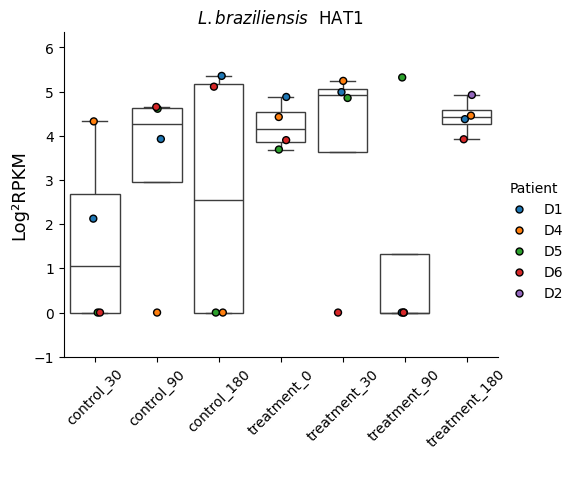

carregando


<Figure size 800x800 with 0 Axes>

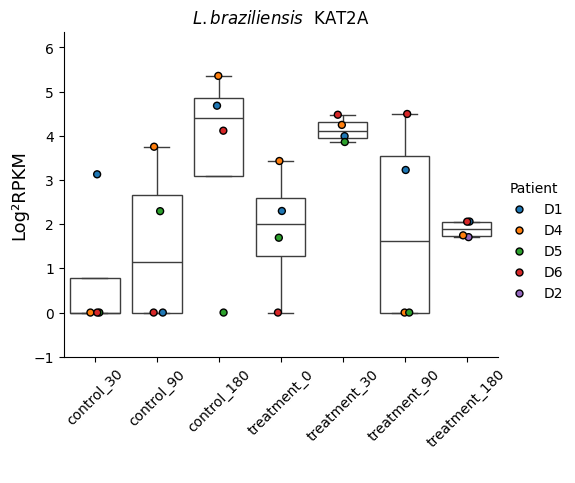

carregando


<Figure size 800x800 with 0 Axes>

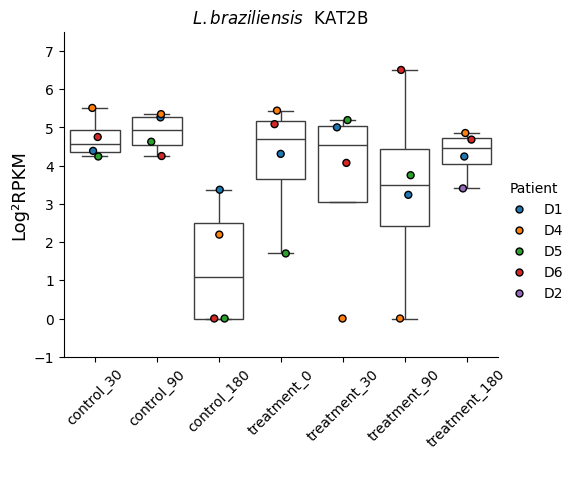

carregando


<Figure size 800x800 with 0 Axes>

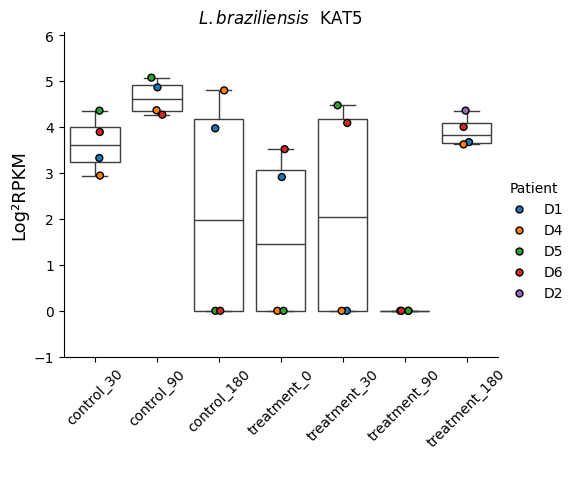

carregando


<Figure size 800x800 with 0 Axes>

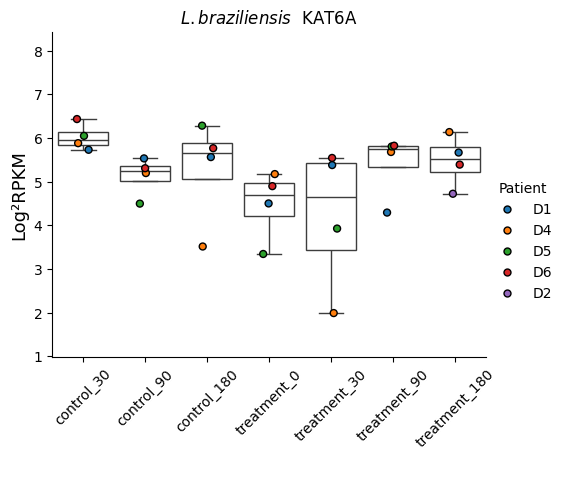

carregando


<Figure size 800x800 with 0 Axes>

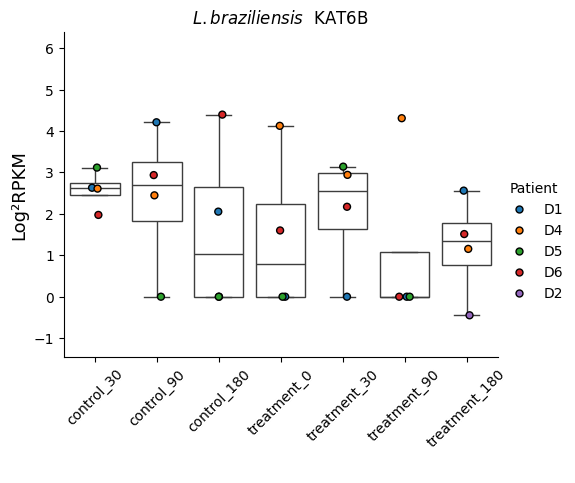

carregando


<Figure size 800x800 with 0 Axes>

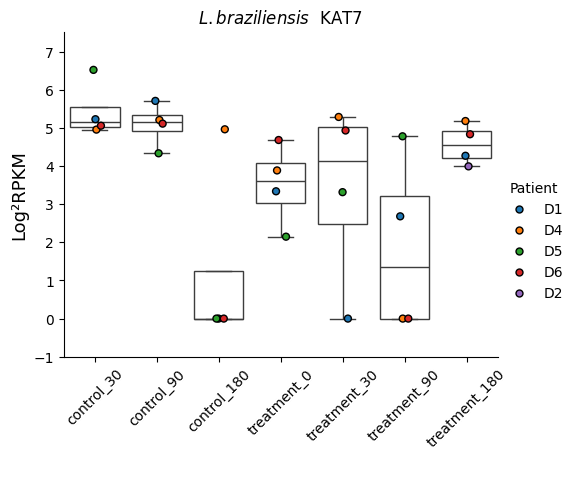

carregando


<Figure size 800x800 with 0 Axes>

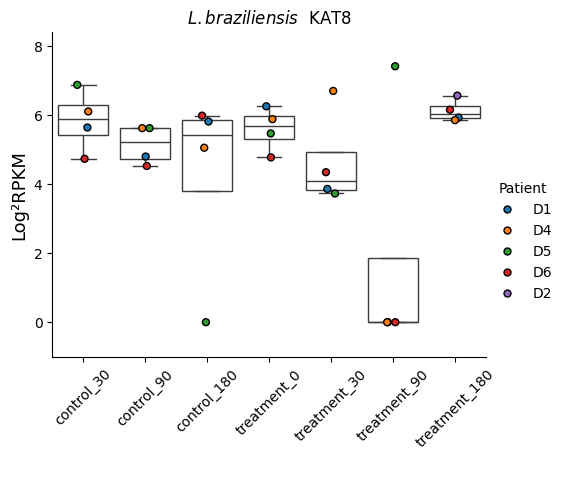

carregando


<Figure size 800x800 with 0 Axes>

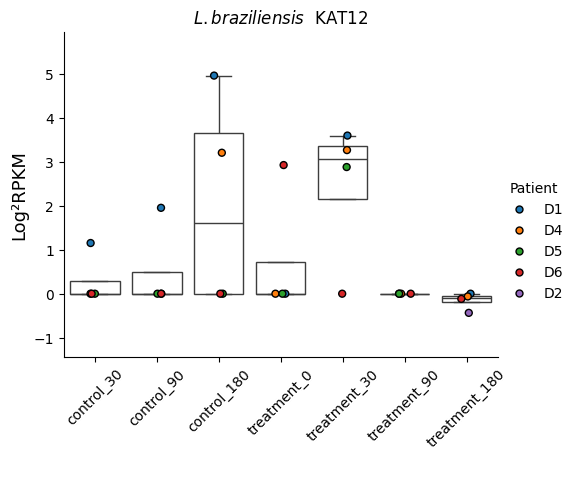

carregando


<Figure size 800x800 with 0 Axes>

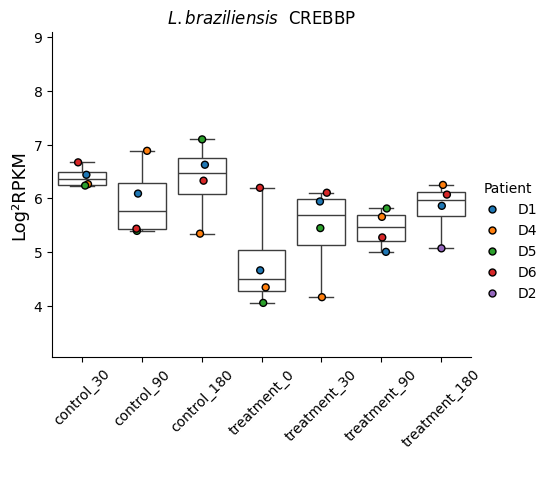

carregando


<Figure size 800x800 with 0 Axes>

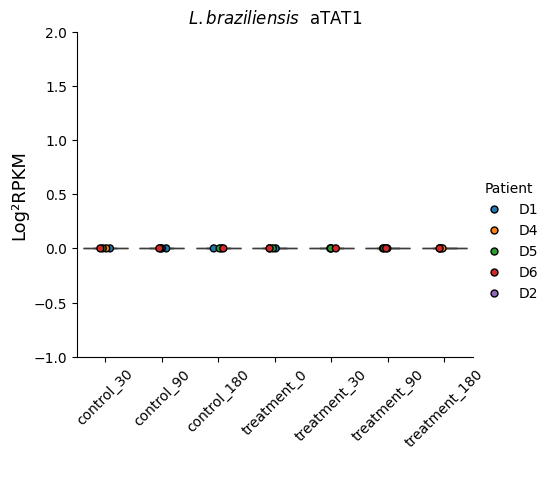

carregando


<Figure size 800x800 with 0 Axes>

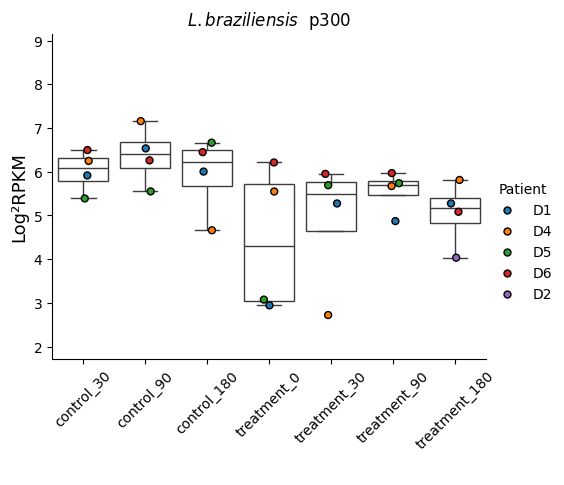

carregando


<Figure size 800x800 with 0 Axes>

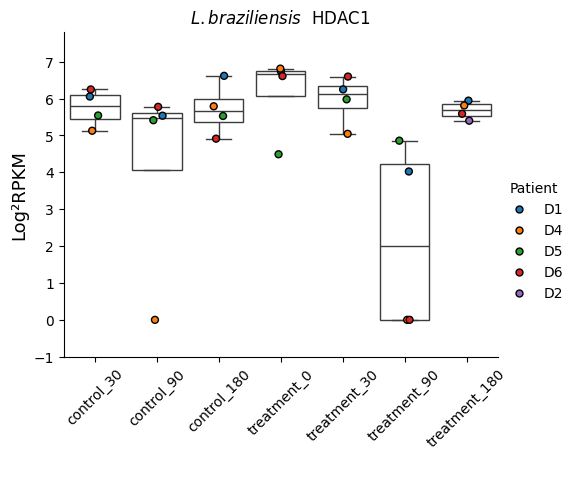

carregando


<Figure size 800x800 with 0 Axes>

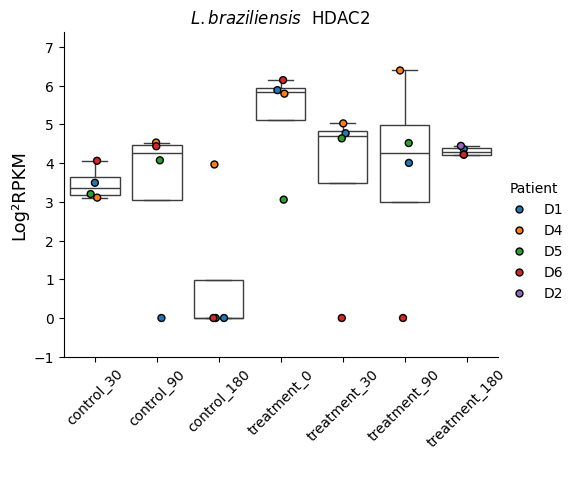

carregando


<Figure size 800x800 with 0 Axes>

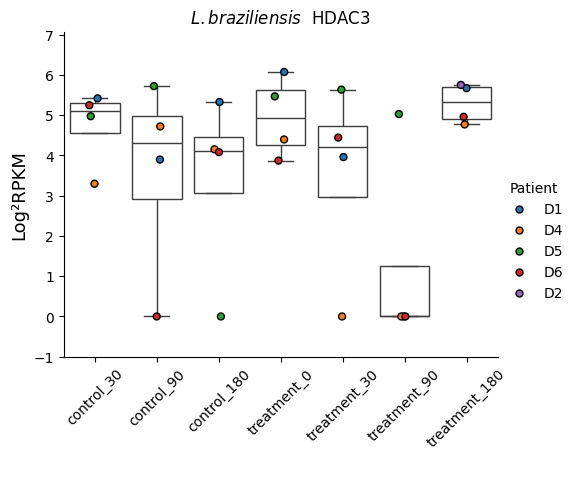

carregando


<Figure size 800x800 with 0 Axes>

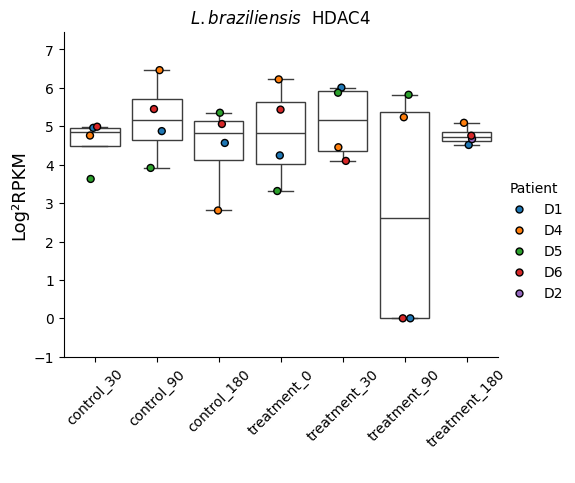

carregando


<Figure size 800x800 with 0 Axes>

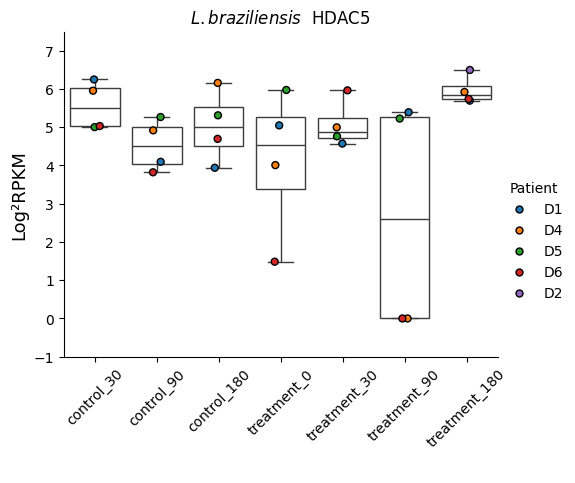

carregando


<Figure size 800x800 with 0 Axes>

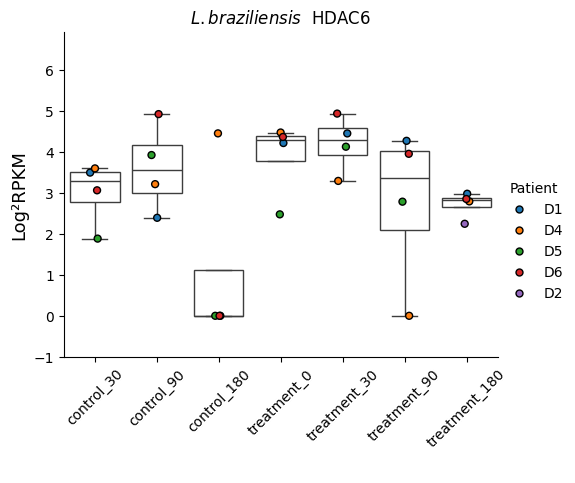

carregando


<Figure size 800x800 with 0 Axes>

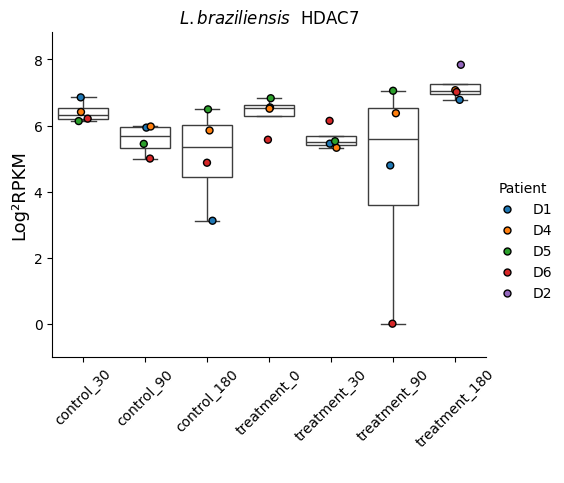

carregando


<Figure size 800x800 with 0 Axes>

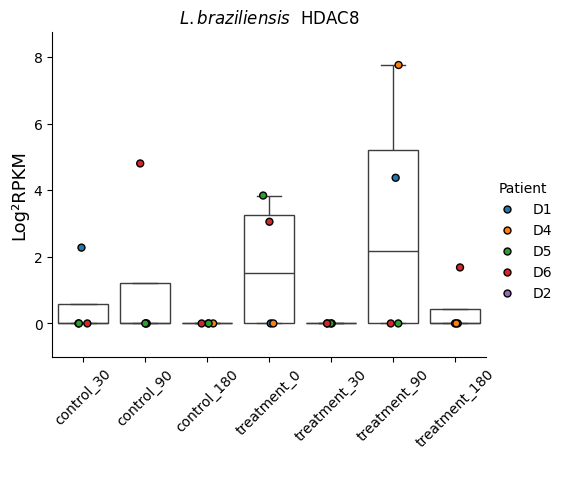

carregando


<Figure size 800x800 with 0 Axes>

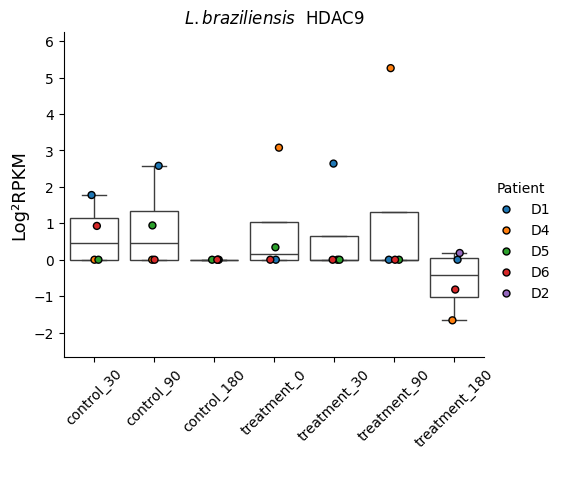

carregando


<Figure size 800x800 with 0 Axes>

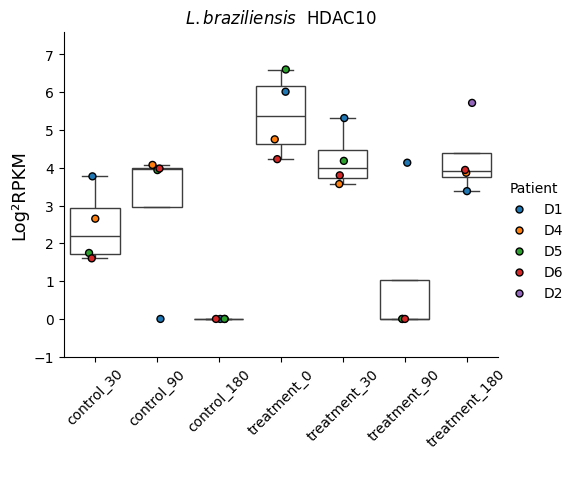

carregando


<Figure size 800x800 with 0 Axes>

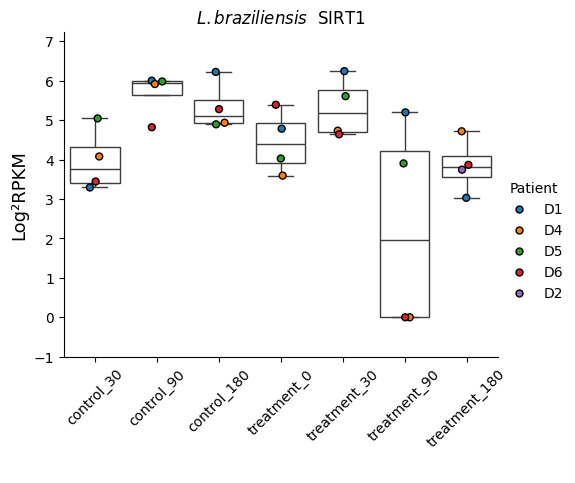

carregando


<Figure size 800x800 with 0 Axes>

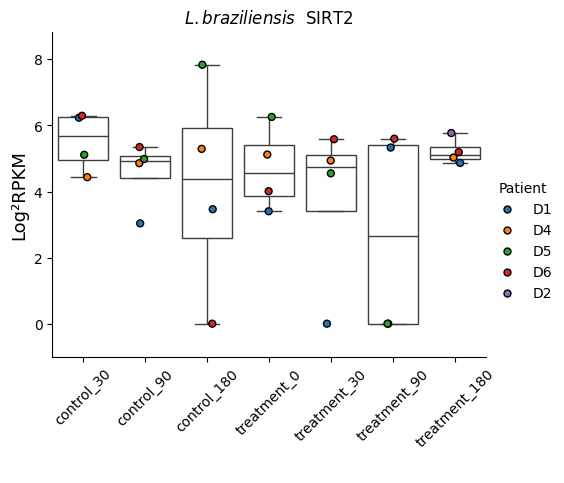

carregando


<Figure size 800x800 with 0 Axes>

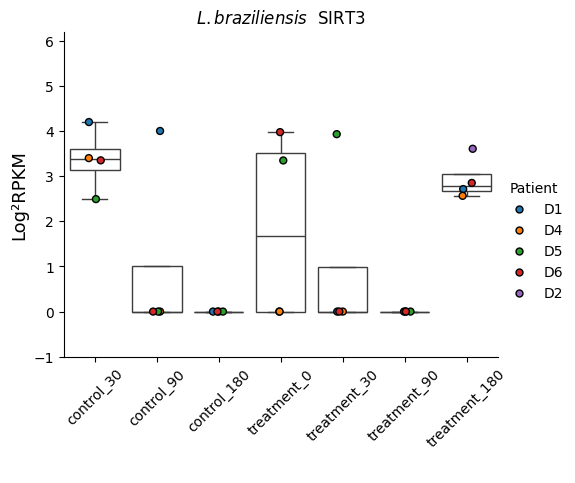

carregando


<Figure size 800x800 with 0 Axes>

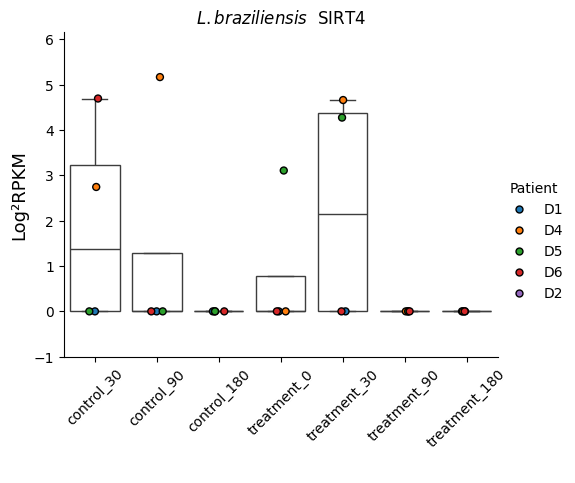

carregando


<Figure size 800x800 with 0 Axes>

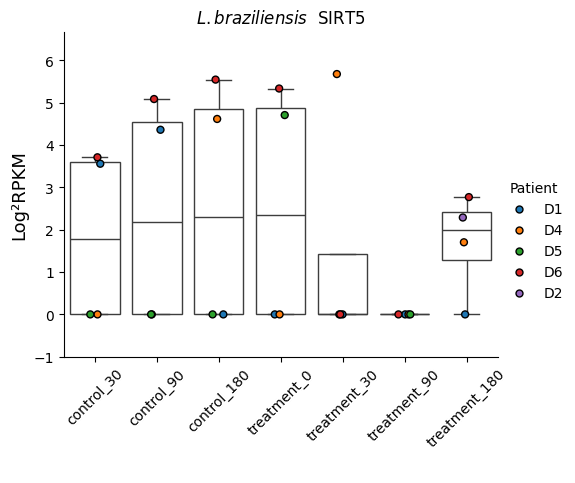

carregando


<Figure size 800x800 with 0 Axes>

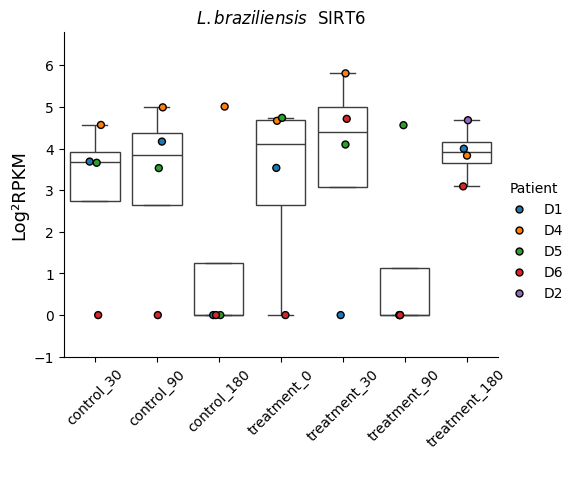

carregando


<Figure size 800x800 with 0 Axes>

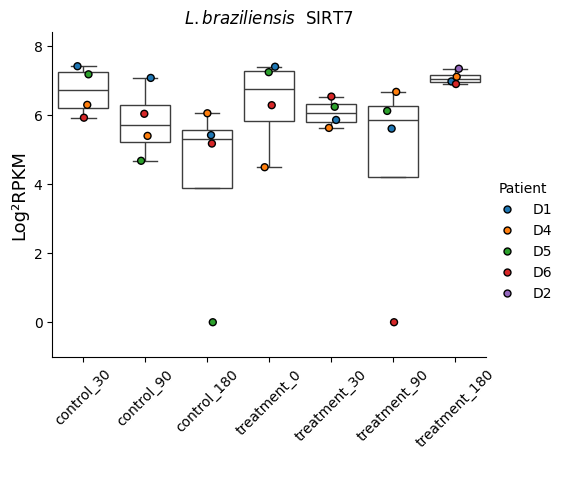

carregando


In [ ]:
graficos_boxplot(GSE55648_df_filtrado, "Blues", "L. braziliensis", [
'control_30',
'control_90',
'control_180',
'treatment_0',
'treatment_30',
'treatment_90',
'treatment_180'])


#Candida albicans

##GSE120012


##GSE184104

#HIV

##GSE103666

##GSE148796

##GSE156072

#Leishmania

##GSE185253  

##GSE162760

In [ ]:
GSE162760_tab = pd.read_excel(GSE162760 )
GSE162760_tab.head()

Nome  Control_Non-infected_10_SRR13207491  \
0  YTHDF1                             4.172961   
1  YTHDF2                             4.890095   
2  YTHDF3                             6.456912   
3  YTHDC1                            -4.627615   
4     FTO                             4.205525   

   Control_Non-infected_11_SRR13207492  Control_Non-infected_12_SRR13207493  \
0                             4.060678                             4.029716   
1                             4.773675                             4.598486   
2                             6.175913                             6.133393   
3                            -3.598604                             0.000000   
4                             3.752745                             3.669046   

   Control_Non-infected_13_SRR13207494  Control_Non-infected_14_SRR13207495  \
0                             4.211683                             4.343067   
1                             4.666392                             4.554770   
2                             5.981482                             5.991960   
3                            -2.206844                             0.000000   
4                             4.165954                             4.210155   

   Control_Non-infected_15_SRR13207496  Control_Non-infected_16_SRR13207497  \
0                             4.249430                             4.073955   
1                             4.679931                             4.666068   
2                             6.111311                             6.104134   
3                            -2.521399                             0.000000   
4                             4.127524                             3.993969   

   Control_Non-infected_17_SRR13207498  Control_Non-infected_18_SRR13207499  \
0                             4.458236                             4.528578   
1                             4.804429                             4.640008   
2                             6.115734                             6.107364   
3                             0.000000                             0.634051   
4                             4.653806                             4.463363   

   ...  Infected_Lbr_21_SRR13207530  Infected_Lbr_22_SRR13207531  \
0  ...                     4.498387                     4.287095   
1  ...                     5.125277                     5.053201   
2  ...                     6.508691                     6.524265   
3  ...                    -5.222200                    -2.419343   
4  ...                     4.106732                     4.210493   

   Infected_Lbr_2_SRR13207511  Infected_Lbr_3_SRR13207512  \
0                    4.114070                    3.994269   
1                    4.982016                    4.911558   
2                    6.573076                    6.709924   
3                   -3.943922                   -4.797871   
4                    4.088674                    4.153195   

   Infected_Lbr_4_SRR13207513  Infected_Lbr_5_SRR13207514  \
0                    3.862646                    3.977582   
1                    5.072584                    5.088762   
2                    6.685612                    6.486711   
3                   -2.929494                   -5.030286   
4                    4.017372                    3.699086   

   Infected_Lbr_6_SRR13207515  Infected_Lbr_7_SRR13207516  \
0                    3.880347                    3.995589   
1                    5.066328                    4.852746   
2                    6.451283                    6.566268   
3                   -3.156376                    0.000000   
4                    3.667633                    4.025656   

   Infected_Lbr_8_SRR13207517  Infected_Lbr_9_SRR13207518  
0                    3.934744                    3.772102  
1                    4.642918                    4.693863  
2                    6.615514                    6.018952  
3                    0.390532                   -3.327

In [ ]:
# Lista de genes desejados
genes_desejados = ['HAT1','KAT2A','KAT2B','KAT5','KAT6A','KAT6B','KAT7','KAT8','KAT12',
'CREBBP','aTAT1','p300','HDAC1','HDAC2','HDAC3','HDAC4','HDAC5','HDAC6','HDAC7',
'HDAC8','HDAC9','HDAC10','SIRT1','SIRT2','SIRT3','SIRT4','SIRT5','SIRT6','SIRT7'
]

# Filtrando o DataFrame para manter apenas as linhas com genes desejados na coluna "nome"
GSE162760_df_filtrado = GSE162760_tab[GSE162760_tab['Nome'].isin(genes_desejados)]
# # Visualizando o DataFrame filtrado
GSE162760_df_filtrado.index = GSE162760_df_filtrado["Nome"]


In [ ]:
GSE162760_df_filtrado = GSE162760_df_filtrado.T

In [ ]:
GSE162760_df_filtrado = GSE162760_df_filtrado.iloc[1:]

In [ ]:
GSE162760_df_filtrado.index.to_list()

['Control_Non-infected_10_SRR13207491',
 'Control_Non-infected_11_SRR13207492',
 'Control_Non-infected_12_SRR13207493',
 'Control_Non-infected_13_SRR13207494',
 'Control_Non-infected_14_SRR13207495',
 'Control_Non-infected_15_SRR13207496',
 'Control_Non-infected_16_SRR13207497',
 'Control_Non-infected_17_SRR13207498',
 'Control_Non-infected_18_SRR13207499',
 'Control_Non-infected_19_SRR13207500',
 'Control_Non-infected_1_SRR13207482',
 'Control_Non-infected_20_SRR13207501',
 'Control_Non-infected_21_SRR13207502',
 'Control_Non-infected_22_SRR13207503',
 'Control_Non-infected_23_SRR13207504',
 'Control_Non-infected_24_SRR13207505',
 'Control_Non-infected_25_SRR13207506',
 'Control_Non-infected_26_SRR13207507',
 'Control_Non-infected_27_SRR13207508',
 'Control_Non-infected_28_SRR13207509',
 'Control_Non-infected_2_SRR13207483',
 'Control_Non-infected_3_SRR13207484',
 'Control_Non-infected_4_SRR13207485',
 'Control_Non-infected_5_SRR13207486',
 'Control_Non-infected_6_SRR13207487',
 'Cont

In [ ]:
GSE162760_df_filtrado["Status"] =['Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Control_Non-infected',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr',
 'Infected_Lbr']

In [ ]:
GSE162760_df_filtrado.head()

Nome                                     HAT1     KAT2A     KAT2B      KAT5  \
Control_Non-infected_10_SRR13207491  5.072824  2.339298  7.978502   3.71552   
Control_Non-infected_11_SRR13207492  4.956496  1.752973  8.499627  3.836161   
Control_Non-infected_12_SRR13207493  5.114671  1.937928  8.487285  3.960078   
Control_Non-infected_13_SRR13207494  4.760632  2.768062  8.761547  3.476082   
Control_Non-infected_14_SRR13207495  4.856229  2.651697  8.750476  3.192144   

Nome                                    KAT6A     KAT6B      KAT7      KAT8  \
Control_Non-infected_10_SRR13207491  5.963361  2.847821  4.926572  4.513562   
Control_Non-infected_11_SRR13207492  5.596676  2.490903  4.930252  4.851475   
Control_Non-infected_12_SRR13207493  5.621539  2.529461  4.908564  4.970414   
Control_Non-infected_13_SRR13207494  5.623425  3.189641  4.918851  4.812629   
Control_Non-infected_14_SRR13207495  5.657767  3.122671  5.049262  4.679896   

Nome                                    KAT12    CREBBP  ...     HDAC9  \
Control_Non-infected_10_SRR13207491  2.703225  4.196546  ...  4.371373   
Control_Non-infected_11_SRR13207492  1.839152  3.699146  ...  3.573716   
Control_Non-infected_12_SRR13207493  1.727183  3.623291  ...  3.622898   
Control_Non-infected_13_SRR13207494  2.213137  4.601101  ...  3.660461   
Control_Non-infected_14_SRR13207495  2.472006  4.581539  ...   3.44241   

Nome                                   HDAC10     SIRT1     SIRT2     SIRT3  \
Control_Non-infected_10_SRR13207491  1.136018  4.885954   3.17974  2.593875   
Control_Non-infected_11_SRR13207492    2.5324  4.455053  4.420801  2.147977   
Control_Non-infected_12_SRR13207493  2.435047  4.315223  4.341998  2.236693   
Control_Non-infected_13_SRR13207494  3.175968  4.323912  4.185473  2.710206   
Control_Non-infected_14_SRR13207495  3.130137  4.424717  4.102444  2.345603   

Nome                                    SIRT4     SIRT5     SIRT6     SIRT7  \
Control_Non-infected_10_SRR13207491  0.165934  5.025673  1.104886  5.336009   
Control_Non-infected_11_SRR13207492 -1.390018  4.376612  2.603382  5.351844   
Control_Non-infected_12_SRR13207493 -0.331195  4.497624  2.822669  5.400509   
Control_Non-infected_13_SRR13207494 -0.150261  4.686936  2.457485  5.073031   
Control_Non-infected_14_SRR13207495 -0.240486  4.726319  2.732736  5.073042   

Nome                                               Status  
Control_Non-infected_10_SRR13207491  Control_Non-infected  
Control_Non-infected_11_SRR13207492  Control_Non-infected  
Control_Non-infected_12_SRR13207493  Control_Non-infected  
Control_Non-infected_13_SRR13207494  Control_Non-infected  
Control_Non-infected_14_SRR13207495  Control_Non-infected  

[5 rows x 30 columns]

In [ ]:
# Filtrando as linhas para Uninfected_Mouse e Infected_Mouse_Linfantum
# subset_PRJNA601732_df_Linfantum = PRJNA601732_df_filtrado[(PRJNA601732_df_filtrado['Status'] == 'Uninfected_Mouse') | (PRJNA601732_df_filtrado['Status'] == 'Mouse_Linfantum')]
# subset_PRJNA601732_df_Linfantum.iloc[[1,-1],:]

In [ ]:
# Filtrando as linhas para Infected_Mouse_Ldonovani e Infected_Mouse_Linfantum
# subset_PRJNA601732_df_Ldonovani = PRJNA601732_df_filtrado[(PRJNA601732_df_filtrado['Status'] == 'Mouse_Ldonovani') | (PRJNA601732_df_filtrado['Status'] == 'Infected_Mouse_Linfantum')]
# subset_PRJNA601732_df_Ldonovani.iloc[[1,-1],:]

In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
  sns.set_theme(style="ticks", font_scale=0.8)
  sns.set_style("whitegrid")
  for i in tabela:
    if "Status" in i: continue

    plt.figure(figsize=(4,8));
    graficos=sns.catplot(data=tabela,x="Status",y=i,kind="strip",palette=paleta, size=5 ,edgecolor='black',linewidth=1,hue="Status",order=ordem);
    graficos=sns.boxplot(data = tabela,x="Status", y = i, showcaps=True,boxprops={'facecolor':'None'},showfliers=True,whiskerprops={'linewidth':1},hue="Status", order=ordem)
    plt.xticks(rotation=0)
    # graficos.set_axis_labels("Time", "Log²RPKM")

    plt.ylim(min(tabela[i])-1,max(tabela[i])+1)
    if max(tabela[i])-min(tabela[i])<5:
        plt.ylim(min(tabela[i])-2,max(tabela[i])+2)
    titulo = plt.gcf().suptitle(f'${especie}$  '+i, fontsize=14)
    titulo.set_y(1.05)
    graficos = plt.xlabel(' ', fontdict={'size': 13});
    graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});
    # plt.savefig(f"{caminho}/{i}.png",dpi=200, format='png')
    plt.savefig(f"/content/drive/MyDrive/Laboratory/Alunos/Cadu/img/{especie}{i}.png",dpi=200, format='png')

    plt.show(graficos)
    print("carregando")
    # break


In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
    for i in tabela:
        if "Status" in i:
            continue

        plt.figure(figsize=(10, 8))  # Aumentando o tamanho da figura

        ax = sns.catplot(data=tabela, x="Status", y=i, kind="strip", size=5, edgecolor='black',
                         linewidth=1, hue="Status", order=ordem)

        sns.boxplot(data=tabela, x="Status", y=i, showcaps=True, boxprops={'facecolor': 'None'},
                    showfliers=True, whiskerprops={'linewidth': 1}, hue="Status", order=ordem)

        plt.xticks(rotation=0)

        plt.ylim(min(tabela[i]) - 1, max(tabela[i]) + 1)

        if max(tabela[i]) - min(tabela[i]) < 5:
            plt.ylim(min(tabela[i]) - 1, max(tabela[i]) + 2)

        # Ajustando o título para evitar cortes
        ax.set(title=f'${especie}$  ' + i)
        ax.fig.subplots_adjust(top=0.9)  # Ajustando a posição vertical do título

        plt.xlabel(' ', fontdict={'size': 13})
        plt.ylabel('Log²RPKM', fontdict={'size': 13})

        plt.savefig(f"/content/drive/MyDrive/Laboratory/Alunos/Cadu/img/GSE162760/{especie}_{i}.png",
                    dpi=200, format='png')

        plt.show()

        print("carregando")


<Figure size 1000x800 with 0 Axes>

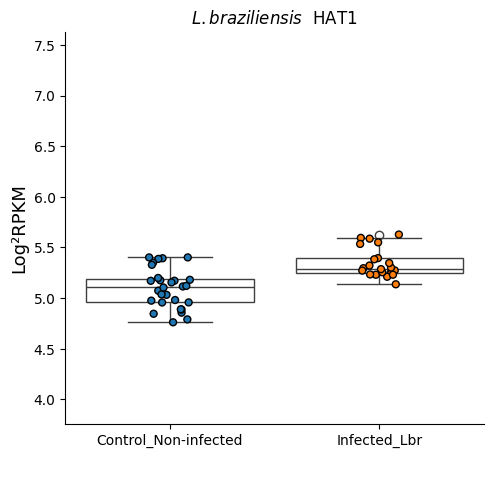

carregando


<Figure size 1000x800 with 0 Axes>

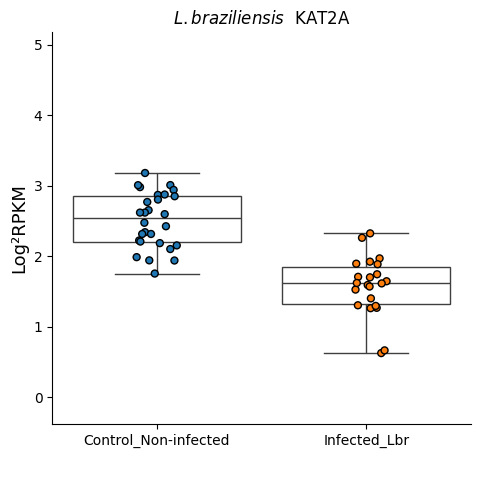

carregando


<Figure size 1000x800 with 0 Axes>

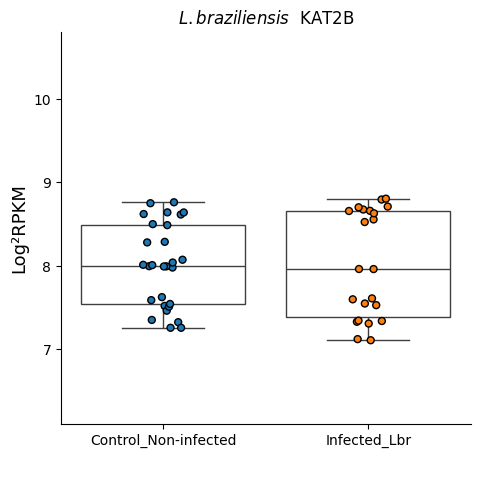

carregando


<Figure size 1000x800 with 0 Axes>

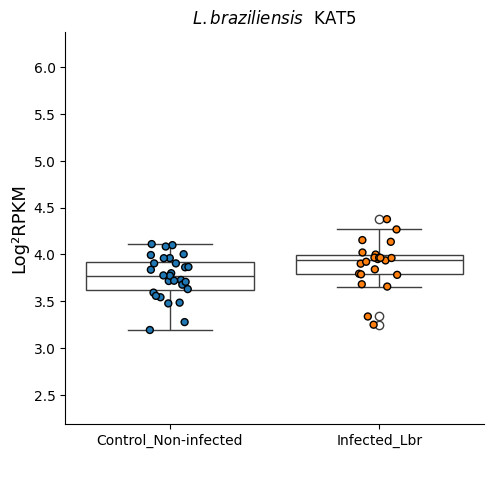

carregando


<Figure size 1000x800 with 0 Axes>

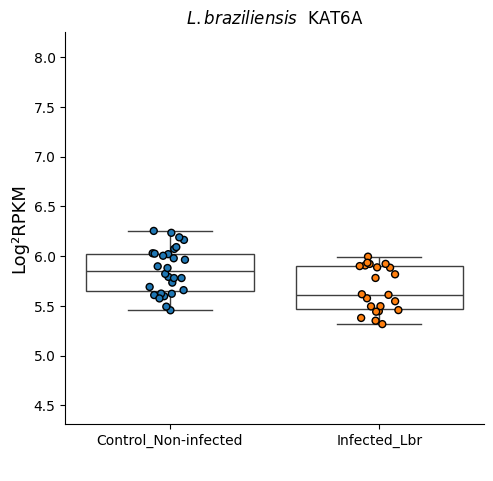

carregando


<Figure size 1000x800 with 0 Axes>

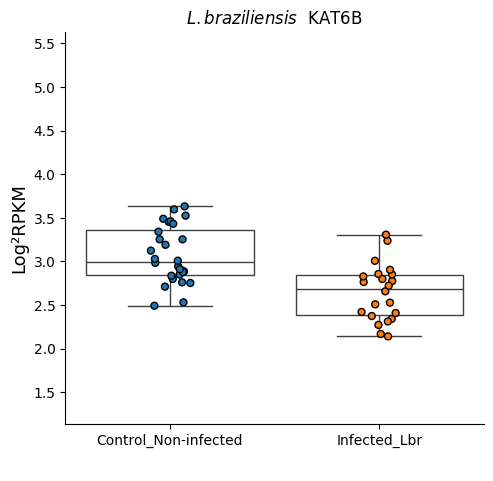

carregando


<Figure size 1000x800 with 0 Axes>

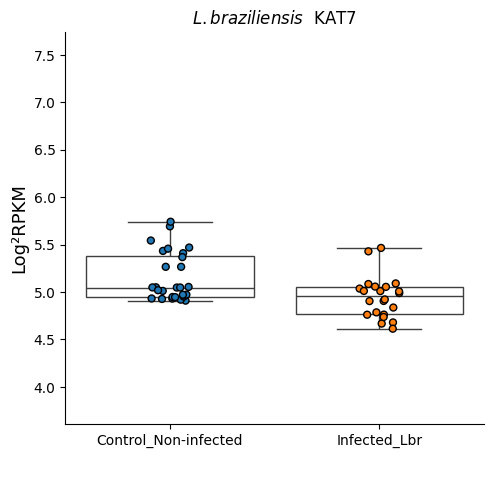

carregando


<Figure size 1000x800 with 0 Axes>

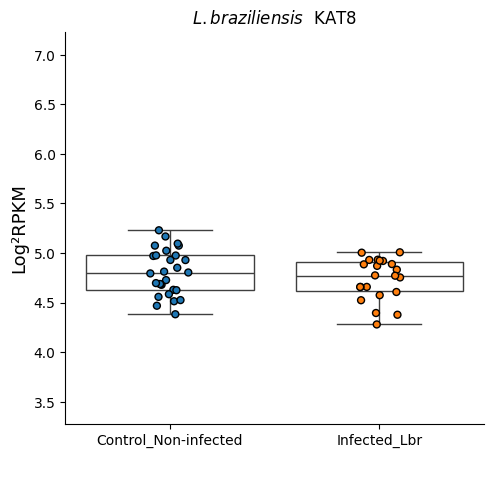

carregando


<Figure size 1000x800 with 0 Axes>

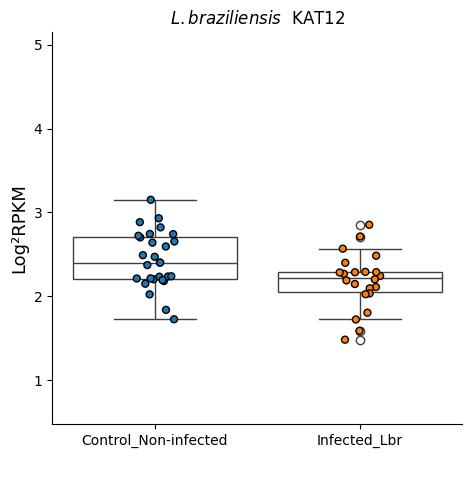

carregando


<Figure size 1000x800 with 0 Axes>

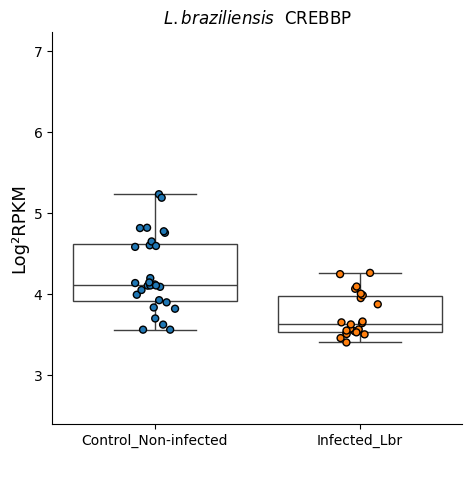

carregando


<Figure size 1000x800 with 0 Axes>

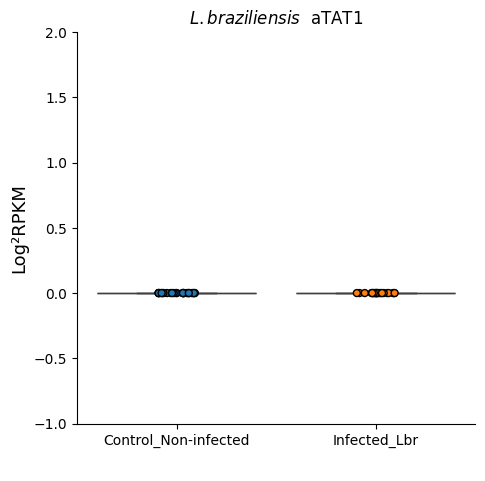

carregando


<Figure size 1000x800 with 0 Axes>

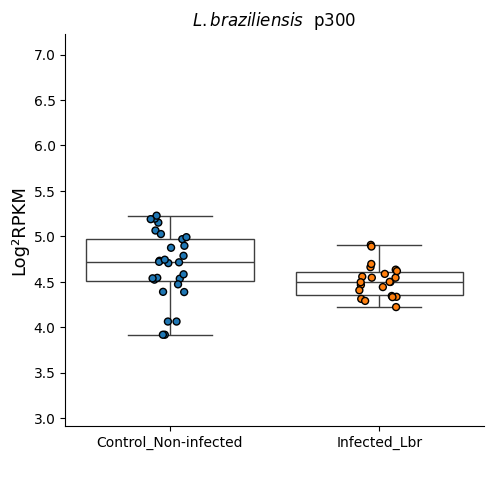

carregando


<Figure size 1000x800 with 0 Axes>

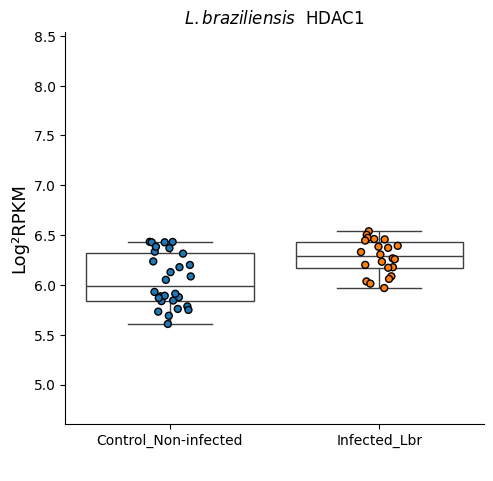

carregando


<Figure size 1000x800 with 0 Axes>

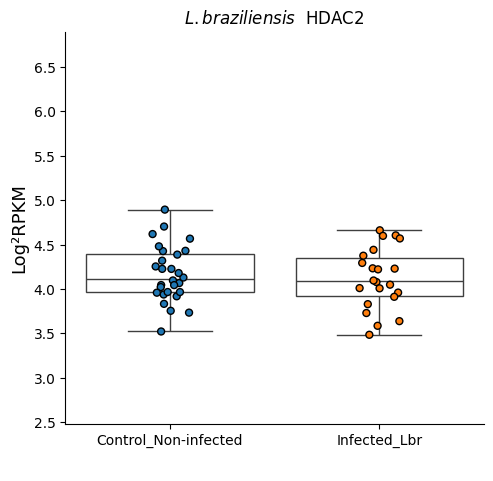

carregando


<Figure size 1000x800 with 0 Axes>

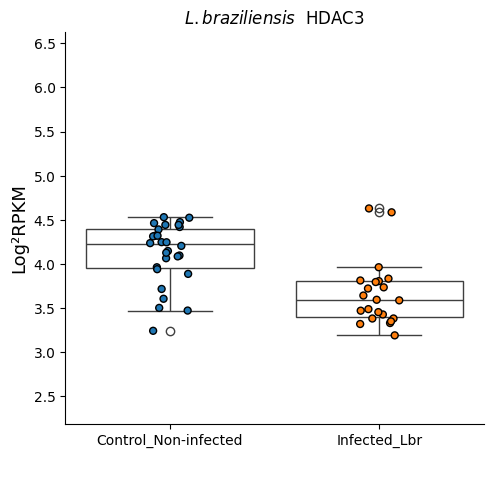

carregando


<Figure size 1000x800 with 0 Axes>

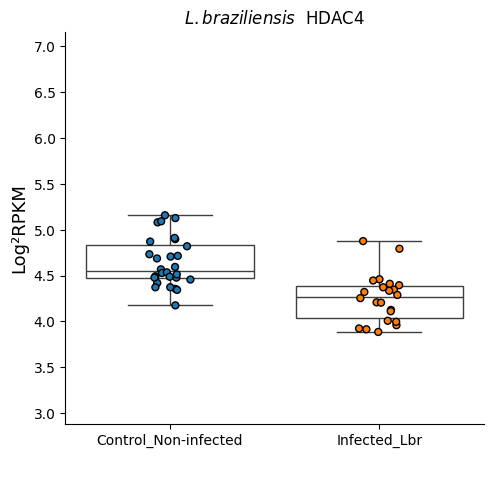

carregando


<Figure size 1000x800 with 0 Axes>

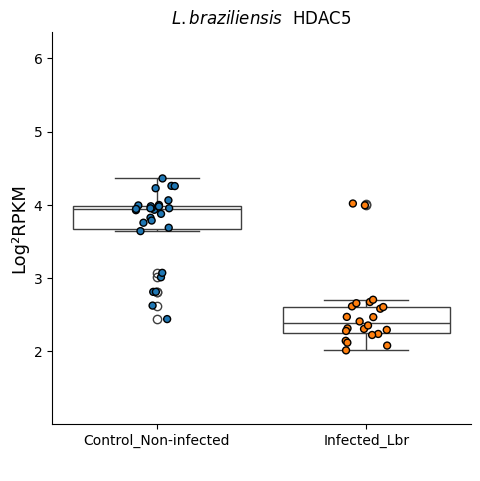

carregando


<Figure size 1000x800 with 0 Axes>

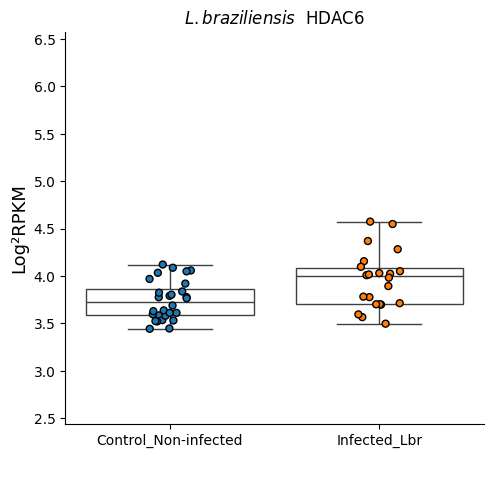

carregando


<Figure size 1000x800 with 0 Axes>

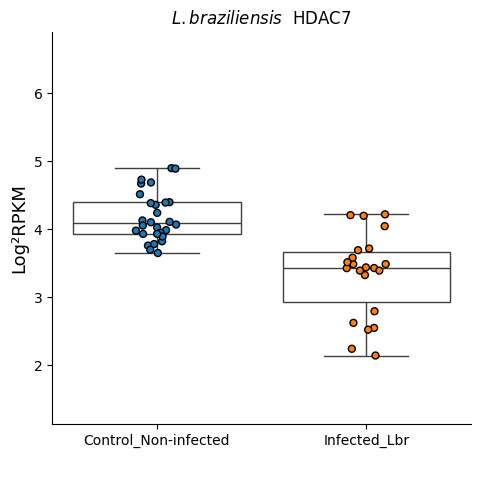

carregando


<Figure size 1000x800 with 0 Axes>

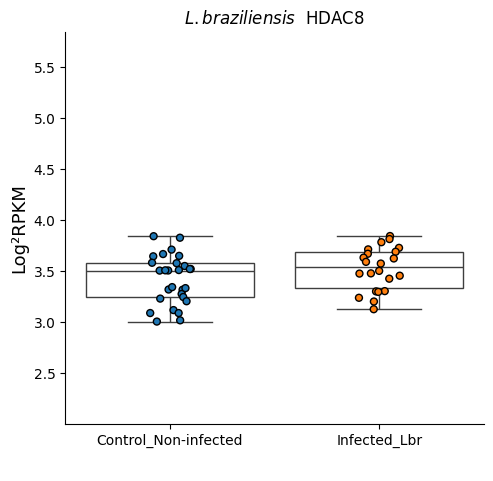

carregando


<Figure size 1000x800 with 0 Axes>

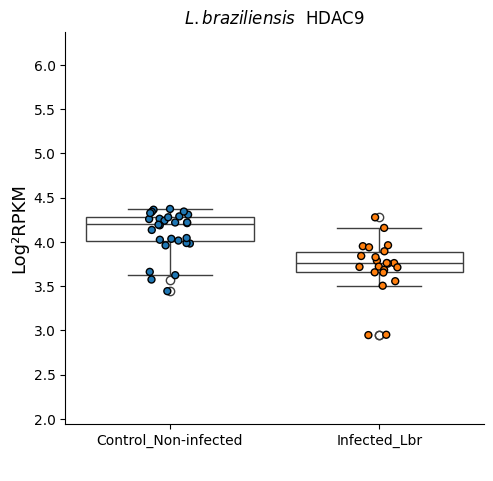

carregando


<Figure size 1000x800 with 0 Axes>

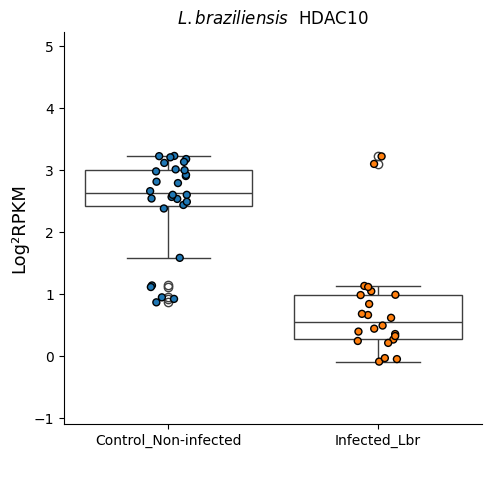

carregando


<Figure size 1000x800 with 0 Axes>

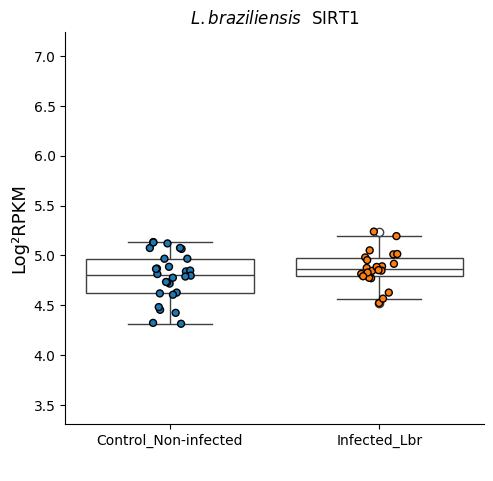

carregando


<Figure size 1000x800 with 0 Axes>

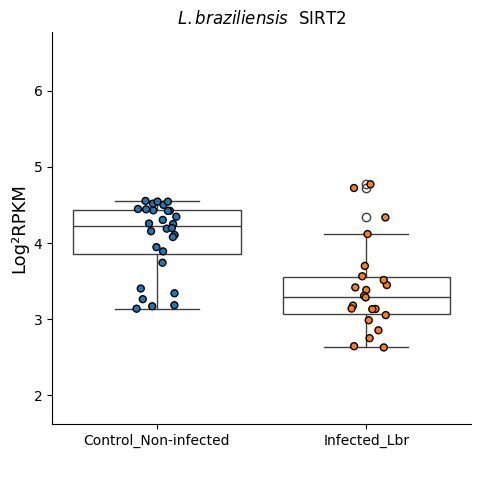

carregando


<Figure size 1000x800 with 0 Axes>

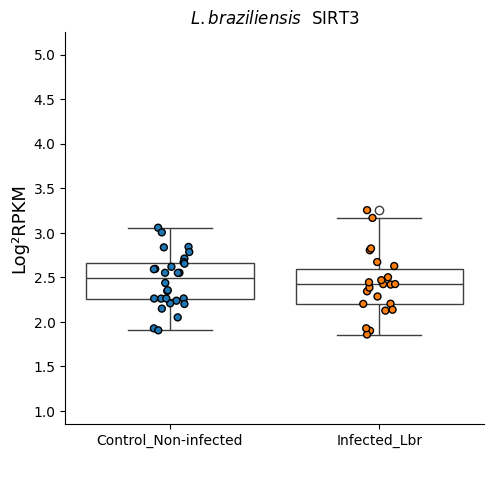

carregando


<Figure size 1000x800 with 0 Axes>

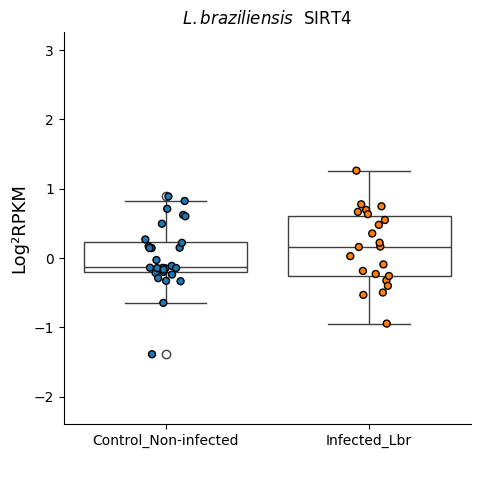

carregando


<Figure size 1000x800 with 0 Axes>

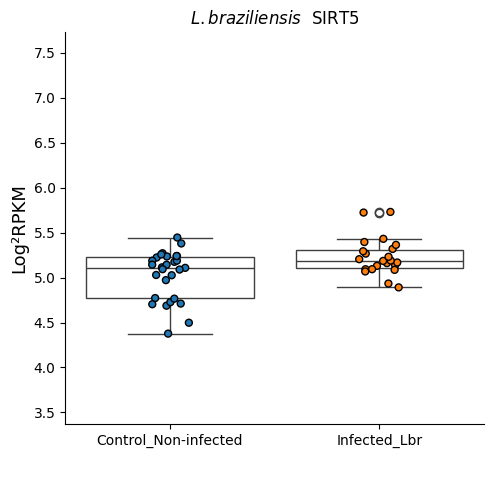

carregando


<Figure size 1000x800 with 0 Axes>

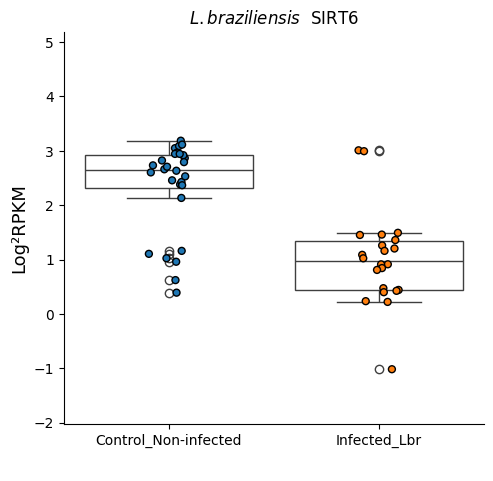

carregando


<Figure size 1000x800 with 0 Axes>

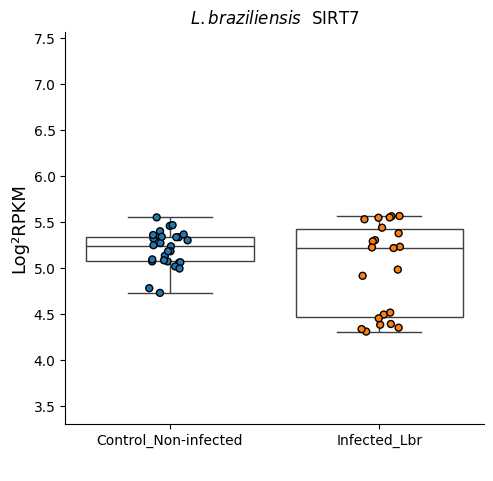

carregando


In [ ]:
graficos_boxplot(GSE162760_df_filtrado, "Blues", "L. braziliensis", ["Control_Non-infected", "Infected_Lbr" ])


##GSE189385  

##PRJEB36928

In [ ]:
PRJEB36928_tab = pd.read_excel(PRJEB36928 )
PRJEB36928_tab.head()

Nome  Active_Disease_Linf_1_ERR3957399  Active_Disease_Linf_2_ERR3957400  \
0  YTHDF1                          5.089985                          4.136770   
1  YTHDF2                          5.432388                          4.200328   
2  YTHDF3                          4.690716                          1.862442   
3  YTHDC1                         -4.523943                          0.000000   
4     FTO                          3.666194                          3.165580   

   Active_Disease_Linf_3_ERR3957401  Active_Disease_Linf_4_ERR3957402  \
0                          4.580332                          4.958992   
1                          4.902308                          5.455539   
2                          3.627294                          4.281067   
3                          0.713448                         -3.529537   
4                          3.266221                          3.713430   

   Active_Disease_Linf_5_ERR3957403  Active_Disease_Linf_6_ERR3957404  \
0                          3.739433                          5.107882   
1                          4.010735                          5.242749   
2                          2.172268                          4.175711   
3                         -2.855016                         -3.677594   
4                          3.203764                          4.034206   

   Healthy_Linf_1_ERR3957386  Healthy_Linf_2_ERR3957387  \
0                   5.315122                   5.048314   
1                   5.132416                   4.911974   
2                   4.581468                   4.722758   
3                  -4.782778                  -4.602439   
4                   3.680132                   3.487147   

   Healthy_Linf_3_ERR3957388  Healthy_Linf_4_ERR3957389  \
0                   5.062229                   5.227565   
1                   5.074039                   5.036451   
2                   4.441741                   4.703537   
3                  -5.317691                  -5.420073   
4                   4.109988                   3.881161   

   Healthy_Linf_Positive_1_ERR3957390  Healthy_Linf_Positive_2_ERR3957391  \
0                            5.506061                            5.454729   
1                            5.708488                            5.642262   
2                            5.441352                            5.350073   
3                           -3.168220                           -1.362990   
4                            4.758883                            4.520242   

   Healthy_Linf_Positive_3_ERR3957392  Healthy_Linf_Positive_4_ERR3957393  \
0                            5.211380                            5.146003   
1                            5.537675                            5.354274   
2                            5.499113                            4.805145   
3                            1.120250                           -3.796182   
4                            4.515768                            3.961040   

   Healthy_Linf_Positive_5_ERR3957394  Healthy_Linf_Positive_6_ERR3957395  \
0                            4.913798                            4.896927   
1                            5.339423                            4.966490   
2                            5.575804                            5.550898   
3                           -1.342578                           -1.406397   
4                            3.750968                            3.378932   

   Healthy_Linf_Positive_7_ERR3957396  Healthy_Linf_Positive_8_ERR3957397  \
0                            5.121337                            5.225190   
1                            5.079342                            5.526724   
2                            5.047179                            5.168981   
3                           -4.445146                           -1.048140   
4                            3.643805                            4.414476   

   Healthy_Linf_Positive_9_ERR3957398  
0                            5.071946 

In [ ]:
# Lista de genes desejados
genes_desejados = ['HAT1','KAT2A','KAT2B','KAT5','KAT6A','KAT6B','KAT7','KAT8','KAT12',
'CREBBP','aTAT1','p300','HDAC1','HDAC2','HDAC3','HDAC4','HDAC5','HDAC6','HDAC7',
'HDAC8','HDAC9','HDAC10','SIRT1','SIRT2','SIRT3','SIRT4','SIRT5','SIRT6','SIRT7'
]

# Filtrando o DataFrame para manter apenas as linhas com genes desejados na coluna "nome"
PRJEB36928_df_filtrado = PRJEB36928_tab[PRJEB36928_tab['Nome'].isin(genes_desejados)]
# # Visualizando o DataFrame filtrado
PRJEB36928_df_filtrado.index = PRJEB36928_df_filtrado["Nome"]


In [ ]:
PRJEB36928_df_filtrado = PRJEB36928_df_filtrado.T

In [ ]:
PRJEB36928_df_filtrado = PRJEB36928_df_filtrado.iloc[1:]

In [ ]:
PRJEB36928_df_filtrado.index.to_list()

['Active_Disease_Linf_1_ERR3957399',
 'Active_Disease_Linf_2_ERR3957400',
 'Active_Disease_Linf_3_ERR3957401',
 'Active_Disease_Linf_4_ERR3957402',
 'Active_Disease_Linf_5_ERR3957403',
 'Active_Disease_Linf_6_ERR3957404',
 'Healthy_Linf_1_ERR3957386',
 'Healthy_Linf_2_ERR3957387',
 'Healthy_Linf_3_ERR3957388',
 'Healthy_Linf_4_ERR3957389',
 'Healthy_Linf_Positive_1_ERR3957390',
 'Healthy_Linf_Positive_2_ERR3957391',
 'Healthy_Linf_Positive_3_ERR3957392',
 'Healthy_Linf_Positive_4_ERR3957393',
 'Healthy_Linf_Positive_5_ERR3957394',
 'Healthy_Linf_Positive_6_ERR3957395',
 'Healthy_Linf_Positive_7_ERR3957396',
 'Healthy_Linf_Positive_8_ERR3957397',
 'Healthy_Linf_Positive_9_ERR3957398']

In [ ]:
PRJEB36928_df_filtrado["Status"] =['Disease_Linf',
 'Disease_Linf',
 'Disease_Linf',
 'Disease_Linf',
 'Disease_Linf',
 'Disease_Linf',
 'Healthy_Linf',
 'Healthy_Linf',
 'Healthy_Linf',
 'Healthy_Linf',
 'Healthy_Linf_Positive',
 'Healthy_Linf_Positive',
 'Healthy_Linf_Positive',
 'Healthy_Linf_Positive',
 'Healthy_Linf_Positive',
 'Healthy_Linf_Positive',
 'Healthy_Linf_Positive',
 'Healthy_Linf_Positive',
 'Healthy_Linf_Positive']


In [ ]:
PRJEB36928_df_filtrado.iloc[[1,-1],:]

Nome                                    HAT1     KAT2A     KAT2B      KAT5  \
Active_Disease_Linf_2_ERR3957400   -1.287097  3.617497  2.123822  4.815951   
Healthy_Linf_Positive_9_ERR3957398  3.649697  4.752235  4.408958   4.66574   

Nome                                   KAT6A     KAT6B      KAT7      KAT8  \
Active_Disease_Linf_2_ERR3957400    2.646645 -0.652452  4.473542  5.878544   
Healthy_Linf_Positive_9_ERR3957398   4.13588  1.916815  5.106555  5.938538   

Nome                                   KAT12    CREBBP  ...     HDAC9  \
Active_Disease_Linf_2_ERR3957400    1.131442    3.1711  ...  -0.55283   
Healthy_Linf_Positive_9_ERR3957398  1.558615  4.607697  ...  2.071593   

Nome                                  HDAC10     SIRT1     SIRT2     SIRT3  \
Active_Disease_Linf_2_ERR3957400    5.955722  0.072899  6.638172  3.600429   
Healthy_Linf_Positive_9_ERR3957398    5.5492  3.223329  6.499568  4.217313   

Nome                                   SIRT4     SIRT5     SIRT6     SIRT7  \
Active_Disease_Linf_2_ERR3957400    0.350333  2.997235   5.89672  6.261202   
Healthy_Linf_Positive_9_ERR3957398  0.650425  3.941078  5.259483  6.453232   

Nome                                               Status  
Active_Disease_Linf_2_ERR3957400             Disease_Linf  
Healthy_Linf_Positive_9_ERR3957398  Healthy_Linf_Positive  

[2 rows x 30 columns]

In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
  sns.set_theme(style="ticks", font_scale=0.8)
  sns.set_style("whitegrid")
  for i in tabela:
    if "Status" in i: continue

    plt.figure(figsize=(4,8));
    graficos=sns.catplot(data=tabela,x="Status",y=i,kind="strip",palette=paleta, size=5 ,edgecolor='black',linewidth=1,hue="Status",order=ordem);
    graficos=sns.boxplot(data = tabela,x="Status", y = i, showcaps=True,boxprops={'facecolor':'None'},showfliers=True,whiskerprops={'linewidth':1},hue="Status", order=ordem)
    plt.xticks(rotation=0)
    # graficos.set_axis_labels("Time", "Log²RPKM")

    plt.ylim(min(tabela[i])-1,max(tabela[i])+1)
    if max(tabela[i])-min(tabela[i])<5:
        plt.ylim(min(tabela[i])-1,max(tabela[i])+2)
    titulo = plt.gcf().suptitle(f'${especie}$  '+i, fontsize=14)
    titulo.set_y(1.05)
    graficos = plt.xlabel(' ', fontdict={'size': 13});
    graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});
    # plt.savefig(f"{caminho}/{i}.png",dpi=200, format='png')
    plt.savefig(f"/content/drive/MyDrive/Laboratory/Alunos/Cadu/img/PRJEB36928/{especie}{i}.png",dpi=200, format='png')

    plt.show(graficos)
    print("carregando")
    # break


In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
    for i in tabela:
        if "Status" in i:
            continue

        plt.figure(figsize=(10, 8))  # Aumentando o tamanho da figura

        ax = sns.catplot(data=tabela, x="Status", y=i, kind="strip", size=5, edgecolor='black',
                         linewidth=1, hue="Status", order=ordem)

        sns.boxplot(data=tabela, x="Status", y=i, showcaps=True, boxprops={'facecolor': 'None'},
                    showfliers=True, whiskerprops={'linewidth': 1}, hue="Status", order=ordem)

        plt.xticks(rotation=0)

        plt.ylim(min(tabela[i]) - 1, max(tabela[i]) + 1)

        if max(tabela[i]) - min(tabela[i]) < 5:
            plt.ylim(min(tabela[i]) - 1, max(tabela[i]) + 2)

        # Ajustando o título para evitar cortes
        ax.set(title=f'${especie}$  ' + i)
        ax.fig.subplots_adjust(top=0.9)  # Ajustando a posição vertical do título

        plt.xlabel(' ', fontdict={'size': 13})
        plt.ylabel('Log²RPKM', fontdict={'size': 13})

        plt.savefig(f"/content/drive/MyDrive/Laboratory/Alunos/Cadu/img/PRJEB36928/{especie}_{i}.png",dpi=200, format='png')

        plt.show()

        print("carregando")



<Figure size 1000x800 with 0 Axes>

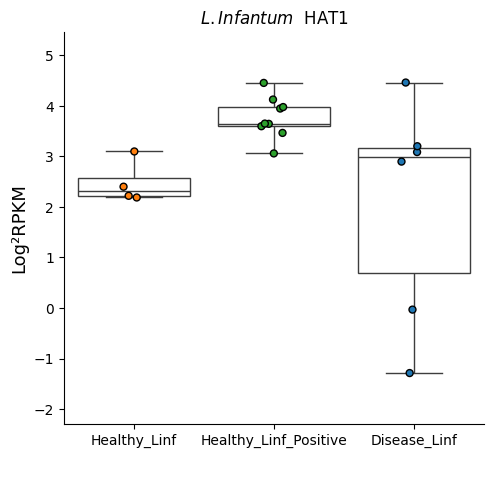

carregando


<Figure size 1000x800 with 0 Axes>

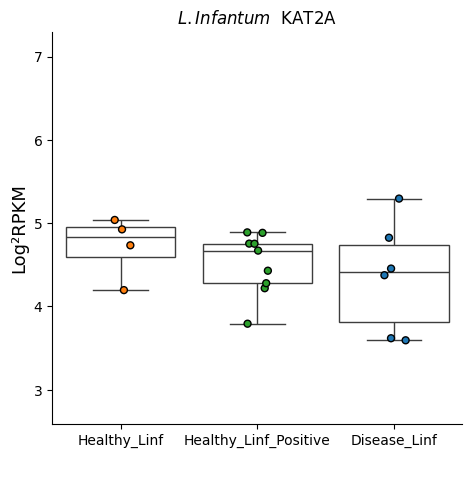

carregando


<Figure size 1000x800 with 0 Axes>

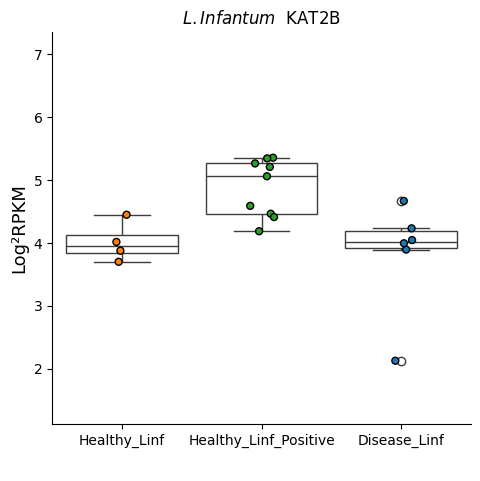

carregando


<Figure size 1000x800 with 0 Axes>

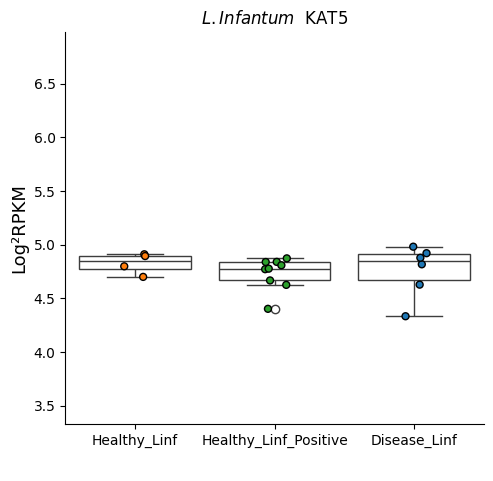

carregando


<Figure size 1000x800 with 0 Axes>

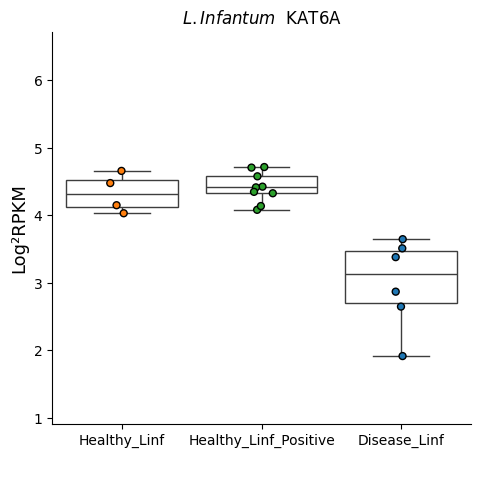

carregando


<Figure size 1000x800 with 0 Axes>

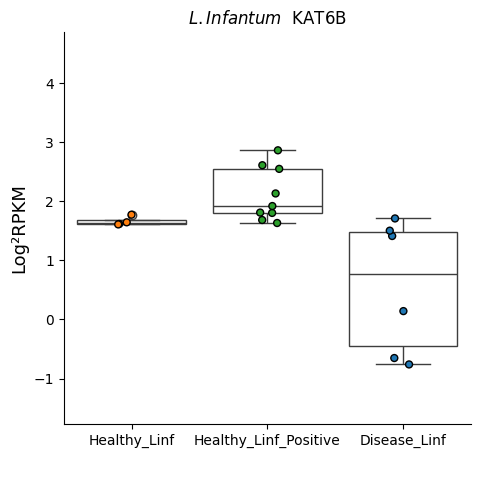

carregando


<Figure size 1000x800 with 0 Axes>

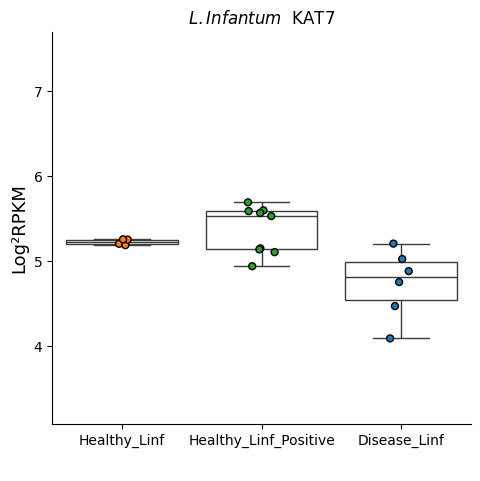

carregando


<Figure size 1000x800 with 0 Axes>

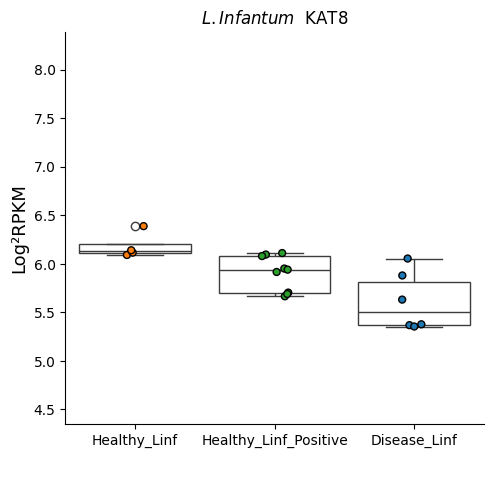

carregando


<Figure size 1000x800 with 0 Axes>

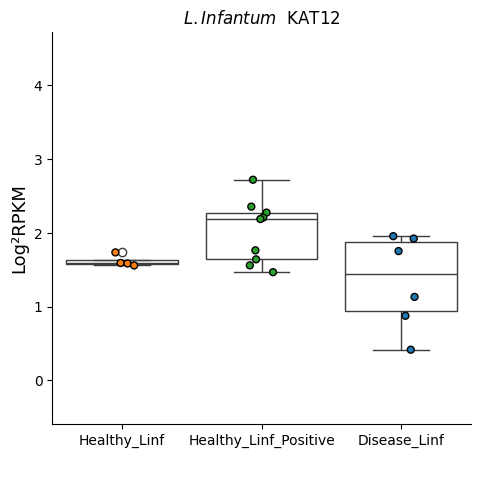

carregando


<Figure size 1000x800 with 0 Axes>

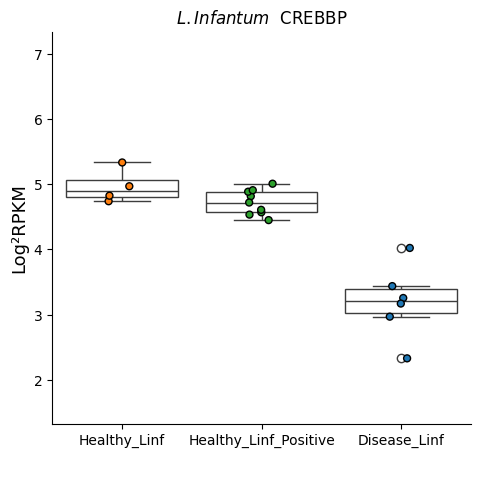

carregando


<Figure size 1000x800 with 0 Axes>

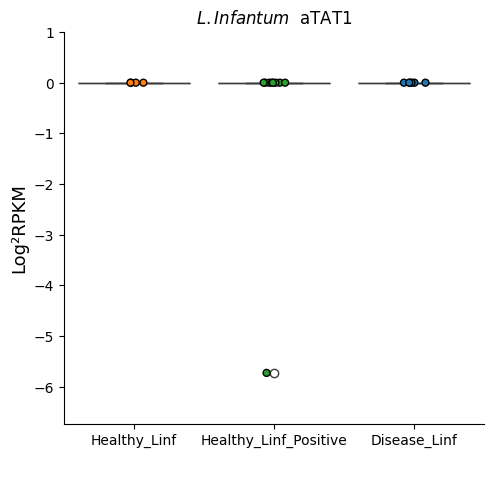

carregando


<Figure size 1000x800 with 0 Axes>

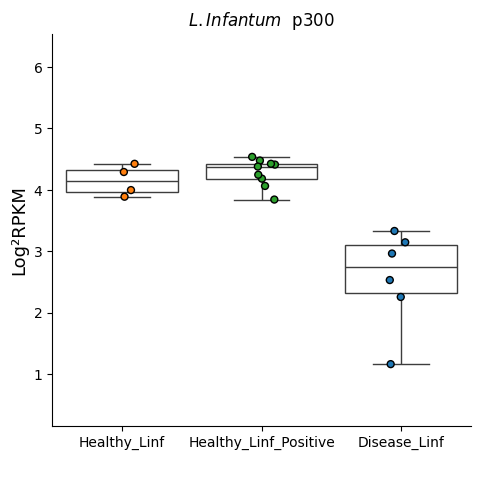

carregando


<Figure size 1000x800 with 0 Axes>

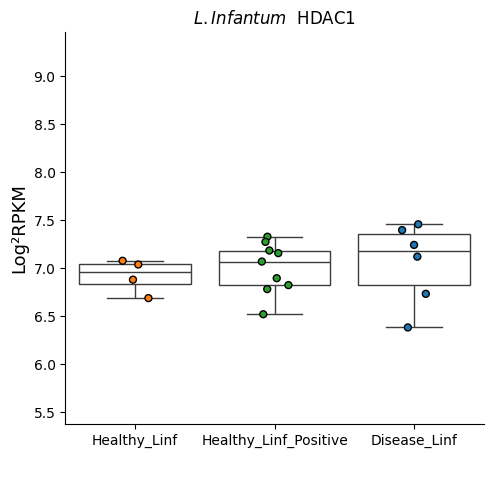

carregando


<Figure size 1000x800 with 0 Axes>

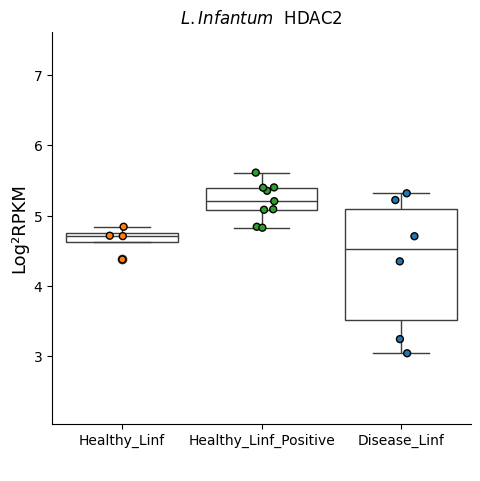

carregando


<Figure size 1000x800 with 0 Axes>

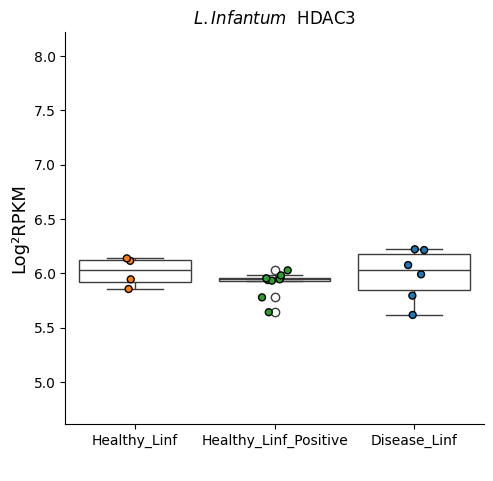

carregando


<Figure size 1000x800 with 0 Axes>

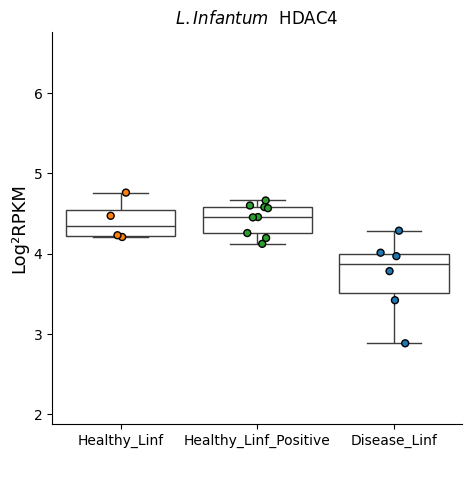

carregando


<Figure size 1000x800 with 0 Axes>

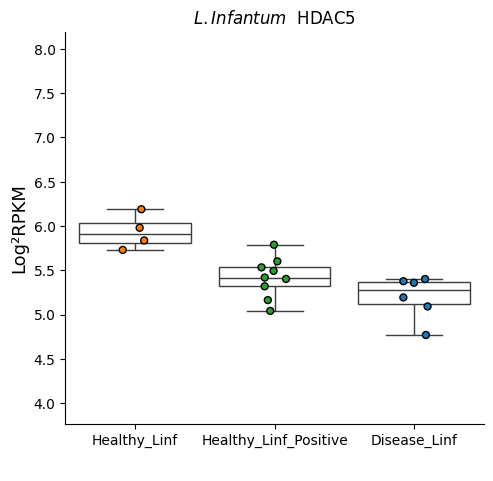

carregando


<Figure size 1000x800 with 0 Axes>

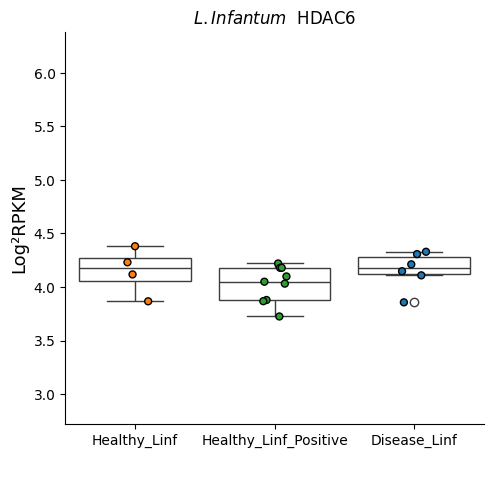

carregando


<Figure size 1000x800 with 0 Axes>

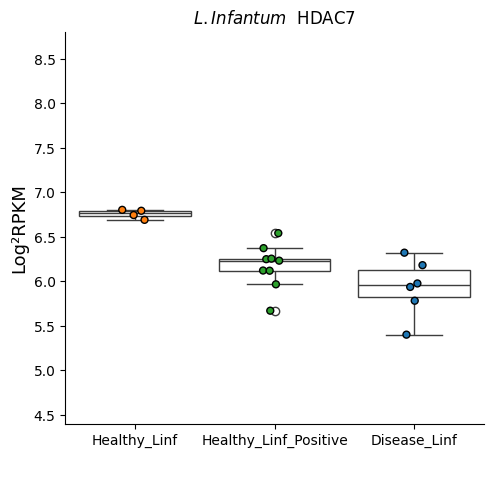

carregando


<Figure size 1000x800 with 0 Axes>

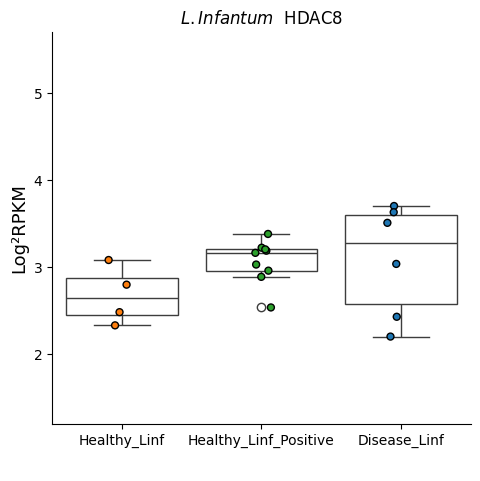

carregando


<Figure size 1000x800 with 0 Axes>

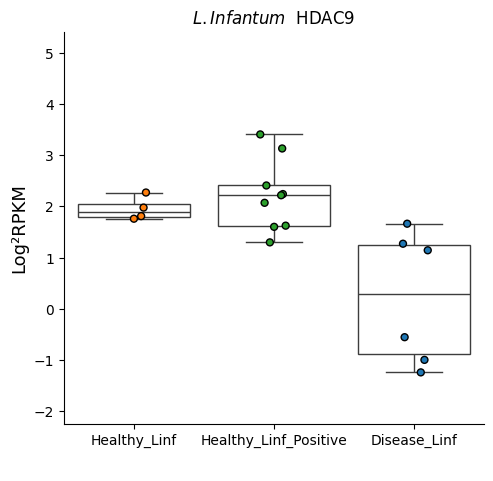

carregando


<Figure size 1000x800 with 0 Axes>

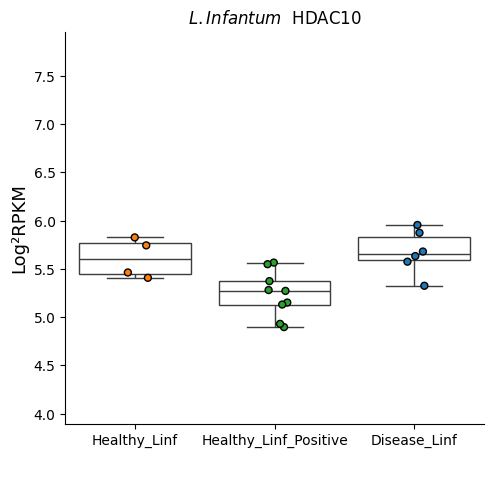

carregando


<Figure size 1000x800 with 0 Axes>

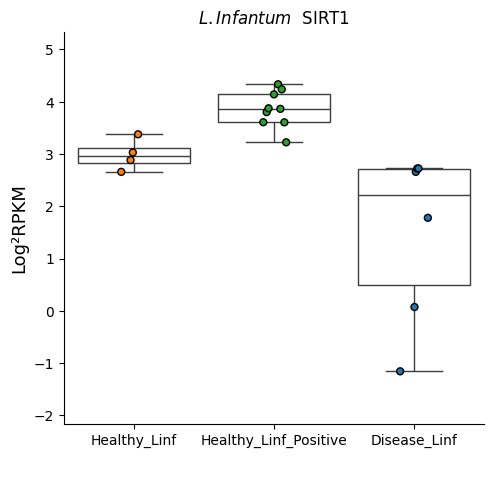

carregando


<Figure size 1000x800 with 0 Axes>

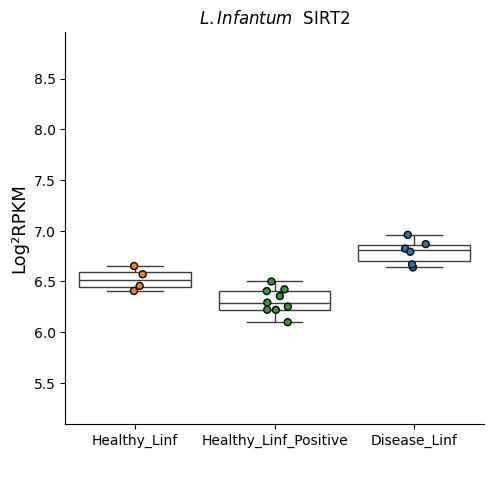

carregando


<Figure size 1000x800 with 0 Axes>

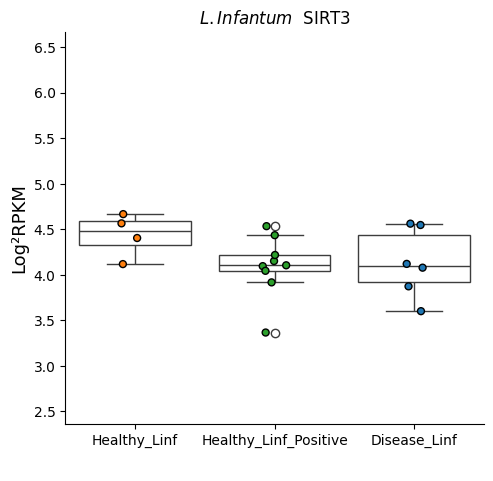

carregando


<Figure size 1000x800 with 0 Axes>

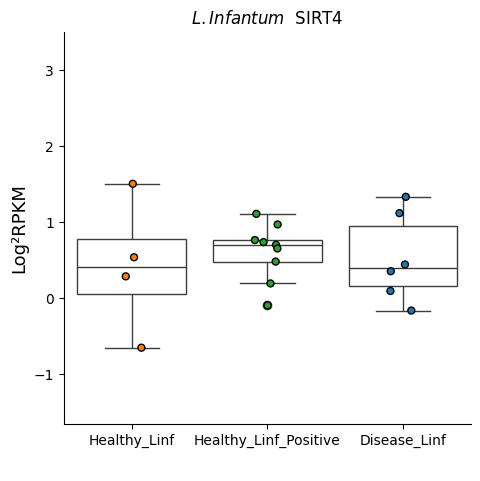

carregando


<Figure size 1000x800 with 0 Axes>

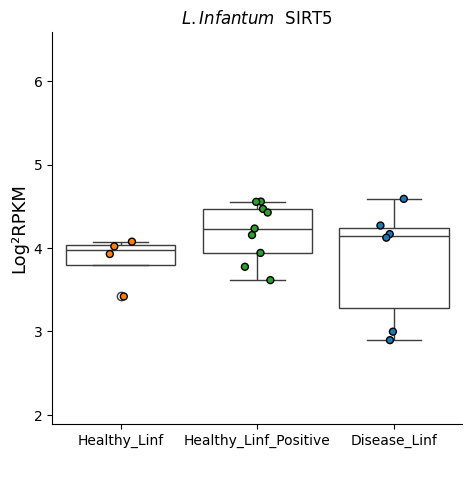

carregando


<Figure size 1000x800 with 0 Axes>

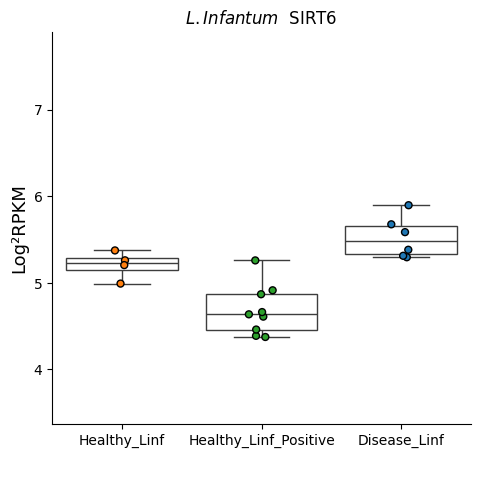

carregando


<Figure size 1000x800 with 0 Axes>

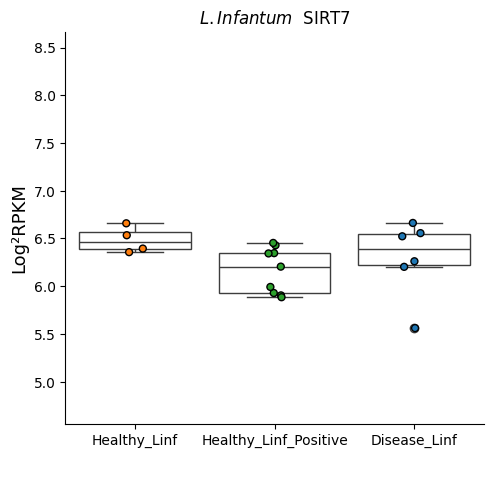

carregando


In [ ]:
graficos_boxplot(PRJEB36928_df_filtrado, "BrBG", "L. Infantum", ['Healthy_Linf', 'Healthy_Linf_Positive','Disease_Linf' ])


##PRJNA290995

In [ ]:
PRJNA290995_tab = pd.read_excel(PRJNA290995 )
PRJNA290995_tab.head()

Nome  Lama_Infected_24h_R1_SRR2156274  Lama_Infected_24h_R2_SRR2163242  \
0  YTHDF1                         4.786970                         5.018997   
1  YTHDF2                         5.172648                         5.499894   
2  YTHDF3                         6.114749                         5.755357   
3  YTHDC1                        -5.433106                        -3.643375   
4     FTO                         3.453639                         3.820026   

   Lama_Infected_24h_R3_SRR2163283  Lama_Infected_48h_R1_SRR2156856  \
0                         4.845101                         4.998841   
1                         5.350962                         5.487303   
2                         5.976349                         6.481777   
3                        -4.795506                        -3.479019   
4                         4.070925                         3.488726   

   Lama_Infected_48h_R2_SRR2163272  Lama_Infected_48h_R3_SRR2163289  \
0                         4.909372                         4.877132   
1                         5.455480                         5.362321   
2                         5.891765                         6.239192   
3                        -6.488035                        -4.668170   
4                         3.928550                         4.268142   

   Lama_Infected_4h_R1_SRR2156271  Lama_Infected_4h_R2_SRR2163237  \
0                        4.318083                        5.333188   
1                        4.896659                        5.399034   
2                        6.330472                        6.595073   
3                        0.000000                       -3.534949   
4                        3.366164                        2.869776   

   Lama_Infected_4h_R3_SRR2163279  ...  Lmj_Uninfected_24h_R3_SRR2156106  \
0                        4.775170  ...                          4.827598   
1                        5.136276  ...                          5.233520   
2                        6.179396  ...                          6.053884   
3                       -4.374831  ...                         -4.985542   
4                        2.510451  ...                          3.882667   

   Lmj_Uninfected_48h_R1_SRR2155075  Lmj_Uninfected_48h_R2_SRR2155161  \
0                          4.808341                          4.745160   
1                          5.212702                          5.087936   
2                          5.953639                          5.990009   
3                         -3.355058                         -5.043273   
4                          3.710095                          3.969368   

   Lmj_Uninfected_48h_R3_SRR2156108  Lmj_Uninfected_4h_R1_SRR2155070  \
0                          4.707940                         5.038853   
1                          5.073899                         5.249746   
2                          6.158381                         5.899957   
3                         -3.949795                        -4.427500   
4                          3.723624                         3.389294   

   Lmj_Uninfected_4h_R2_SRR2155101  Lmj_Uninfected_4h_R3_SRR2155165  \
0                         4.771240                         5.055206   
1                         5.202642                         5.327045   
2                         5.669412                         6.102161   
3                        -4.247517                         0.176429   
4                         3.455771                         3.627230   

   Lmj_Uninfected_72h_R1_SRR2155082  Lmj_Uninfected_72h_R2_SRR2155163  \
0                          4.756757                          4.653161   
1                          5.184206                          5.048682   
2                          6.144187                          6.150825   
3                         -5.019429                         -5.381179   
4                          3.670279                          3.955264   

   Lmj_Uninfected_72h_R3_SRR2156110  
0                          4

In [ ]:
# Lista de genes desejados
genes_desejados = ['HAT1','KAT2A','KAT2B','KAT5','KAT6A','KAT6B','KAT7','KAT8','KAT12',
'CREBBP','aTAT1','p300','HDAC1','HDAC2','HDAC3','HDAC4','HDAC5','HDAC6','HDAC7',
'HDAC8','HDAC9','HDAC10','SIRT1','SIRT2','SIRT3','SIRT4','SIRT5','SIRT6','SIRT7'
]

# Filtrando o DataFrame para manter apenas as linhas com genes desejados na coluna "nome"
PRJNA290995_df_filtrado = PRJNA290995_tab[SRP069976_tab['Nome'].isin(genes_desejados)]
# # Visualizando o DataFrame filtrado
PRJNA290995_df_filtrado.index = PRJNA290995_df_filtrado["Nome"]


In [ ]:
PRJNA290995_df_filtrado = PRJNA290995_df_filtrado.T

In [ ]:
PRJNA290995_df_filtrado = PRJNA290995_df_filtrado.iloc[1:]

In [ ]:
PRJNA290995_df_filtrado.index.to_list()

['Lama_Infected_24h_R1_SRR2156274',
 'Lama_Infected_24h_R2_SRR2163242',
 'Lama_Infected_24h_R3_SRR2163283',
 'Lama_Infected_48h_R1_SRR2156856',
 'Lama_Infected_48h_R2_SRR2163272',
 'Lama_Infected_48h_R3_SRR2163289',
 'Lama_Infected_4h_R1_SRR2156271',
 'Lama_Infected_4h_R2_SRR2163237',
 'Lama_Infected_4h_R3_SRR2163279',
 'Lama_Infected_72h_R1_SRR2156860',
 'Lama_Infected_72h_R2_SRR2163276',
 'Lama_Infected_72h_R3_SRR2163299',
 'Lama_Uninfected_24h_R1_SRR2156273',
 'Lama_Uninfected_24h_R2_SRR2163240',
 'Lama_Uninfected_24h_R3_SRR2163282',
 'Lama_Uninfected_48h_R1_SRR2156855',
 'Lama_Uninfected_48h_R2_SRR2163270',
 'Lama_Uninfected_48h_R3_SRR2163287',
 'Lama_Uninfected_4h_R1_SRR2156271',
 'Lama_Uninfected_4h_R2_SRR2156863',
 'Lama_Uninfected_4h_R3_SRR2163278',
 'Lama_Uninfected_72h_R1_SRR2156859',
 'Lama_Uninfected_72h_R2_SRR2163275',
 'Lama_Uninfected_72h_R3_SRR2163292 ',
 'Lmj_Infected_24h_R1_SRR2155074',
 'Lmj_Infected_24h_R2_SRR2155160',
 'Lmj_Infected_24h_R3_SRR2156107',
 'Lmj_Infect

In [ ]:
PRJNA290995_df_filtrado["Status"] =['Lama_Infected_24h',
 'Lama_Infected_24h',
 'Lama_Infected_24h',
 'Lama_Infected_48h',
 'Lama_Infected_48h',
 'Lama_Infected_48h',
 'Lama_Infected_4h',
 'Lama_Infected_4h',
 'Lama_Infected_4h',
 'Lama_Infected_72h',
 'Lama_Infected_72h',
 'Lama_Infected_72h',
 'Lama_Uninfected_24h',
 'Lama_Uninfected_24h',
 'Lama_Uninfected_24h',
 'Lama_Uninfected_48h',
 'Lama_Uninfected_48h',
 'Lama_Uninfected_48h',
 'Lama_Uninfected_4h',
 'Lama_Uninfected_4h',
 'Lama_Uninfected_4h',
 'Lama_Uninfected_72h',
 'Lama_Uninfected_72h',
 'Lama_Uninfected_72h',
 'Lmj_Infected_24h',
 'Lmj_Infected_24h',
 'Lmj_Infected_24h',
 'Lmj_Infected_48h',
 'Lmj_Infected_48h',
 'Lmj_Infected_48h',
 'Lmj_Infected_4h',
 'Lmj_Infected_4h',
 'Lmj_Infected_4h',
 'Lmj_Infected_72h',
 'Lmj_Infected_72h',
 'Lmj_Infected_72h',
 'Lmj_Uninfected_24h',
 'Lmj_Uninfected_24h',
 'Lmj_Uninfected_24h',
 'Lmj_Uninfected_48h',
 'Lmj_Uninfected_48h',
 'Lmj_Uninfected_48h',
 'Lmj_Uninfected_4h',
 'Lmj_Uninfected_4h',
 'Lmj_Uninfected_4h',
 'Lmj_Uninfected_72h',
 'Lmj_Uninfected_72h',
 'Lmj_Uninfected_72h']
set(PRJNA290995_df_filtrado["Status"])

{'Lama_Infected_24h',
 'Lama_Infected_48h',
 'Lama_Infected_4h',
 'Lama_Infected_72h',
 'Lama_Uninfected_24h',
 'Lama_Uninfected_48h',
 'Lama_Uninfected_4h',
 'Lama_Uninfected_72h',
 'Lmj_Infected_24h',
 'Lmj_Infected_48h',
 'Lmj_Infected_4h',
 'Lmj_Infected_72h',
 'Lmj_Uninfected_24h',
 'Lmj_Uninfected_48h',
 'Lmj_Uninfected_4h',
 'Lmj_Uninfected_72h'}

In [ ]:
# Filtrando as linhas para Uninfected_Mouse e Infected_Mouse_Lama
subset_PRJNA290995_df_Lama = PRJNA290995_df_filtrado[(PRJNA290995_df_filtrado['Status'] == 'Lama_Uninfected_4h') | (PRJNA290995_df_filtrado['Status'] == 'Lama_Uninfected_24h') |
 (PRJNA290995_df_filtrado['Status'] == 'Lama_Uninfected_48h') | (PRJNA290995_df_filtrado['Status'] == 'Lama_Uninfected_72h') |
  (PRJNA290995_df_filtrado['Status'] == 'Lama_Infected_4h') | (PRJNA290995_df_filtrado['Status'] == 'Lama_Infected_24h') |
   (PRJNA290995_df_filtrado['Status'] == 'Lama_Infected_48h') | (PRJNA290995_df_filtrado['Status'] == 'Lama_Infected_72h')]
subset_PRJNA290995_df_Lama.iloc[[1,-1],:]

Nome                                    HAT1     KAT2A     KAT2B      KAT5  \
Lama_Infected_24h_R2_SRR2163242     5.445561  2.778104  3.599652  4.531682   
Lama_Uninfected_72h_R3_SRR2163292   4.904097  2.099734   4.11617  4.237208   

Nome                                   KAT6A     KAT6B      KAT7      KAT8  \
Lama_Infected_24h_R2_SRR2163242     2.804926  1.197895  4.102887  4.753388   
Lama_Uninfected_72h_R3_SRR2163292   3.232726  2.376259  4.266772   4.27565   

Nome                                   KAT12    CREBBP  ...     HDAC9  \
Lama_Infected_24h_R2_SRR2163242     2.952261  3.369315  ...   2.60838   
Lama_Uninfected_72h_R3_SRR2163292   2.974136  3.749481  ... -0.014015   

Nome                                  HDAC10     SIRT1     SIRT2     SIRT3  \
Lama_Infected_24h_R2_SRR2163242     3.882962  3.660341  5.819332   3.28306   
Lama_Uninfected_72h_R3_SRR2163292   3.736292  4.359003  6.314951  3.630944   

Nome                                   SIRT4     SIRT5     SIRT6     SIRT7  \
Lama_Infected_24h_R2_SRR2163242    -2.019751  3.053969  4.377371  5.106719   
Lama_Uninfected_72h_R3_SRR2163292  -1.529936  3.239568  3.635931  4.265744   

Nome                                             Status  
Lama_Infected_24h_R2_SRR2163242       Lama_Infected_24h  
Lama_Uninfected_72h_R3_SRR2163292   Lama_Uninfected_72h  

[2 rows x 30 columns]

In [ ]:
# Filtrando as linhas para Uninfected_Mouse e Infected_Mouse_Lmj
subset_PRJNA290995_df_Lmj = PRJNA290995_df_filtrado[(PRJNA290995_df_filtrado['Status'] == 'Lmj_Uninfected_4h') | (PRJNA290995_df_filtrado['Status'] == 'Lmj_Uninfected_24h') |
 (PRJNA290995_df_filtrado['Status'] == 'Lmj_Uninfected_48h') | (PRJNA290995_df_filtrado['Status'] == 'Lmj_Uninfected_72h') |
  (PRJNA290995_df_filtrado['Status'] == 'Lmj_Infected_4h') | (PRJNA290995_df_filtrado['Status'] == 'Lmj_Infected_24h') |
   (PRJNA290995_df_filtrado['Status'] == 'Lmj_Infected_48h') | (PRJNA290995_df_filtrado['Status'] == 'Lmj_Infected_72h')]
subset_PRJNA290995_df_Lmj.iloc[[1,-1],:]

Nome                                  HAT1     KAT2A     KAT2B      KAT5  \
Lmj_Infected_24h_R2_SRR2155160    5.091906  1.001212  3.533788  5.855316   
Lmj_Uninfected_72h_R3_SRR2156110  4.951723  3.096576  4.249161  4.109808   

Nome                                 KAT6A     KAT6B      KAT7      KAT8  \
Lmj_Infected_24h_R2_SRR2155160    3.861132  2.256754  4.171788   4.24986   
Lmj_Uninfected_72h_R3_SRR2156110   3.16308  1.595032  4.210186  4.535294   

Nome                                 KAT12    CREBBP  ...     HDAC9    HDAC10  \
Lmj_Infected_24h_R2_SRR2155160    3.518928  4.743879  ...  4.240129  2.496838   
Lmj_Uninfected_72h_R3_SRR2156110  2.706426  3.818682  ...   1.73695  3.771169   

Nome                                 SIRT1     SIRT2     SIRT3     SIRT4  \
Lmj_Infected_24h_R2_SRR2155160    4.561184  5.790254  1.911293 -3.953512   
Lmj_Uninfected_72h_R3_SRR2156110  4.109362   6.61196  3.674057  -0.56011   

Nome                                 SIRT5     SIRT6     SIRT7  \
Lmj_Infected_24h_R2_SRR2155160    1.885104  4.159982  4.880632   
Lmj_Uninfected_72h_R3_SRR2156110   3.08917  4.019342   4.61712   

Nome                                          Status  
Lmj_Infected_24h_R2_SRR2155160      Lmj_Infected_24h  
Lmj_Uninfected_72h_R3_SRR2156110  Lmj_Uninfected_72h  

[2 rows x 30 columns]

In [ ]:
lama = [ 'Lama_Uninfected_4h','Lama_Infected_4h', 'Lama_Uninfected_24h','Lama_Infected_24h', 'Lama_Uninfected_48h', 'Lama_Infected_48h','Lama_Uninfected_72h', 'Lama_Infected_72h']

lmj = [ 'Lmj_Uninfected_4h','Lmj_Infected_4h', 'Lmj_Uninfected_24h','Lmj_Infected_24h', 'Lmj_Uninfected_48h', 'Lmj_Infected_48h','Lmj_Uninfected_72h', 'Lmj_Infected_72h']

In [ ]:
PRJNA290995_df_filtrado.iloc[[1,-1],:]

Nome                                  HAT1     KAT2A     KAT2B      KAT5  \
Lama_Infected_24h_R2_SRR2163242   5.445561  2.778104  3.599652  4.531682   
Lmj_Uninfected_72h_R3_SRR2156110  4.951723  3.096576  4.249161  4.109808   

Nome                                 KAT6A     KAT6B      KAT7      KAT8  \
Lama_Infected_24h_R2_SRR2163242   2.804926  1.197895  4.102887  4.753388   
Lmj_Uninfected_72h_R3_SRR2156110   3.16308  1.595032  4.210186  4.535294   

Nome                                 KAT12    CREBBP  ...    HDAC9    HDAC10  \
Lama_Infected_24h_R2_SRR2163242   2.952261  3.369315  ...  2.60838  3.882962   
Lmj_Uninfected_72h_R3_SRR2156110  2.706426  3.818682  ...  1.73695  3.771169   

Nome                                 SIRT1     SIRT2     SIRT3     SIRT4  \
Lama_Infected_24h_R2_SRR2163242   3.660341  5.819332   3.28306 -2.019751   
Lmj_Uninfected_72h_R3_SRR2156110  4.109362   6.61196  3.674057  -0.56011   

Nome                                 SIRT5     SIRT6     SIRT7  \
Lama_Infected_24h_R2_SRR2163242   3.053969  4.377371  5.106719   
Lmj_Uninfected_72h_R3_SRR2156110   3.08917  4.019342   4.61712   

Nome                                          Status  
Lama_Infected_24h_R2_SRR2163242    Lama_Infected_24h  
Lmj_Uninfected_72h_R3_SRR2156110  Lmj_Uninfected_72h  

[2 rows x 30 columns]

In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
  sns.set_theme(style="ticks", font_scale=0.8)
  sns.set_style("whitegrid")
  for i in tabela:
    if "Status" in i: continue

    plt.figure(figsize=(4,8));
    graficos=sns.catplot(data=tabela,x="Status",y=i,kind="strip",palette=paleta, size=5 ,edgecolor='black',linewidth=1,hue="Status",order=ordem);
    graficos=sns.boxplot(data = tabela,x="Status", y = i, showcaps=True,boxprops={'facecolor':'None'},showfliers=True,whiskerprops={'linewidth':1},hue="Status", order=ordem)
    plt.xticks(rotation=0)
    # graficos.set_axis_labels("Time", "Log²RPKM")

    plt.ylim(min(tabela[i])-1,max(tabela[i])+1)
    if max(tabela[i])-min(tabela[i])<5:
        plt.ylim(min(tabela[i])-1,max(tabela[i])+2)
    titulo = plt.gcf().suptitle(f'${especie}$  '+i, fontsize=14)
    titulo.set_y(1.05)
    graficos = plt.xlabel(' ', fontdict={'size': 13});
    graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});
    # plt.savefig(f"{caminho}/{i}.png",dpi=200, format='png')
    plt.savefig(f"/content/drive/MyDrive/Laboratory/Alunos/Cadu/img/PRJNA290995/{especie}{i}.png",dpi=200, format='png')

    plt.show(graficos)
    print("carregando")
    # break


In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
    for i in tabela:
        if "Status" in i:
            continue

        plt.figure(figsize=(12, 8))  # Aumentando o tamanho da figura

        ax = sns.catplot(data=tabela, x="Status", y=i, kind="strip", size=5, edgecolor='black',palette=paleta,
                         linewidth=1, hue="Status", order=ordem)

        sns.boxplot(data=tabela, x="Status", y=i, showcaps=True, boxprops={'facecolor': 'None'},
                    showfliers=True, whiskerprops={'linewidth': 1}, hue="Status", order=ordem)

        plt.xticks(rotation=45, ha="right")

        plt.ylim(min(tabela[i]) - 1, max(tabela[i]) + 1)

        if max(tabela[i]) - min(tabela[i]) < 5:
            plt.ylim(min(tabela[i]) - 1, max(tabela[i]) + 2)

        # Ajustando o título para evitar cortes
        ax.set(title=f'${especie}$  ' + i)
        ax.fig.subplots_adjust(top=0.9)  # Ajustando a posição vertical do título
        plt.subplots_adjust(bottom=0.27)
        plt.subplots_adjust(left=0.2)

        plt.xlabel(' ', fontdict={'size': 13})
        plt.ylabel('Log²RPKM', fontdict={'size': 13})

        plt.savefig(f"/content/drive/MyDrive/Laboratory/Alunos/Cadu/img/PRJNA290995/{especie}_{i}.png",dpi=200, format='png')
        # plt.savefig("teste.png" ,dpi=200, format='png')

        plt.show()

        print("carregando")
        # break


<Figure size 1200x800 with 0 Axes>

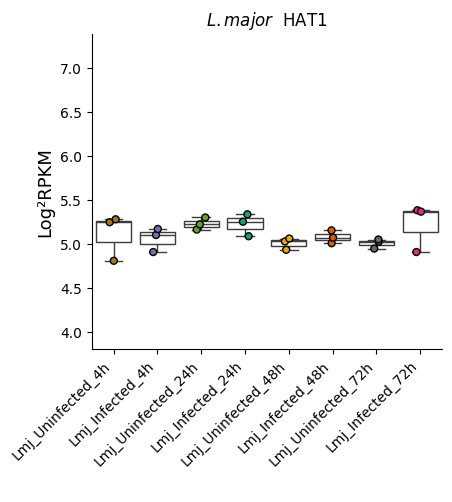

carregando


<Figure size 1200x800 with 0 Axes>

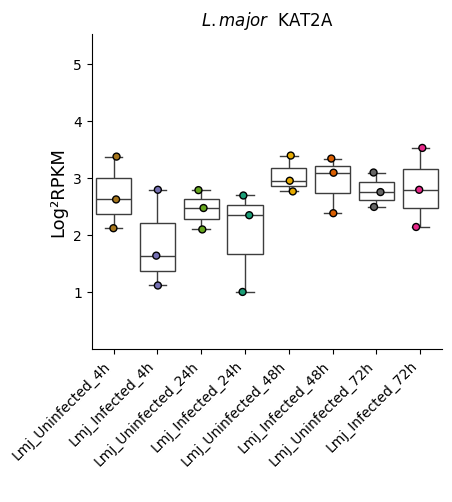

carregando


<Figure size 1200x800 with 0 Axes>

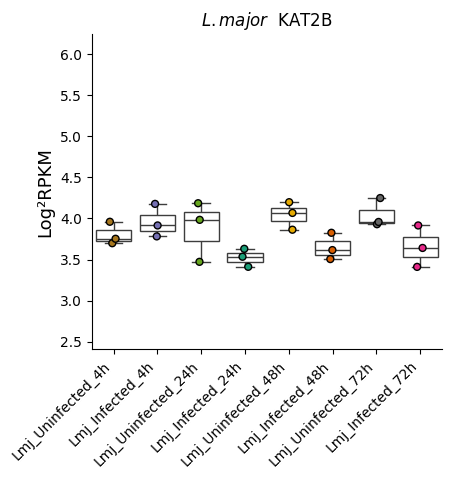

carregando


<Figure size 1200x800 with 0 Axes>

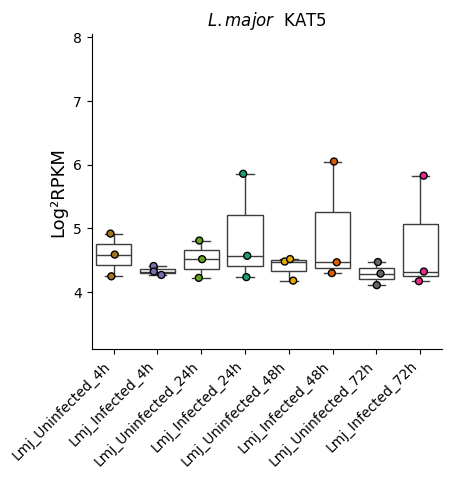

carregando


<Figure size 1200x800 with 0 Axes>

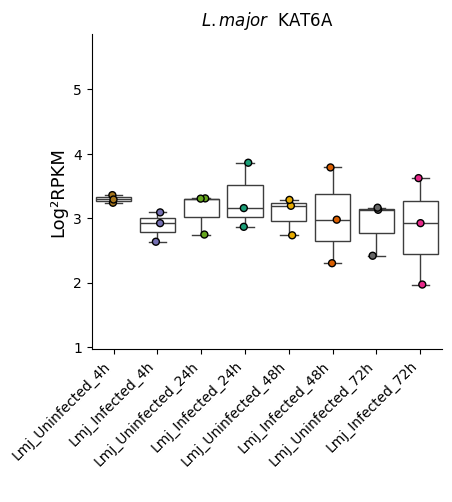

carregando


<Figure size 1200x800 with 0 Axes>

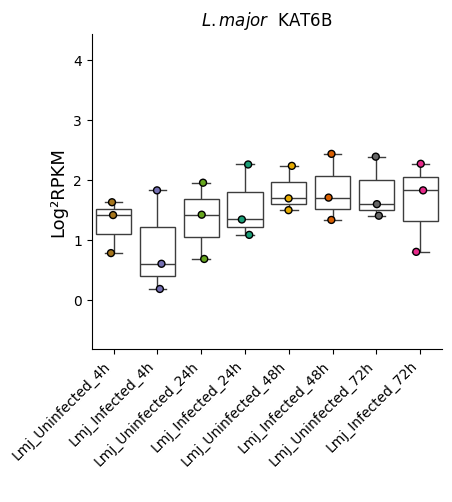

carregando


<Figure size 1200x800 with 0 Axes>

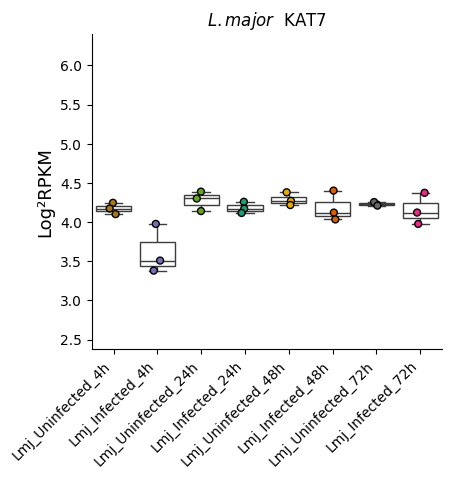

carregando


<Figure size 1200x800 with 0 Axes>

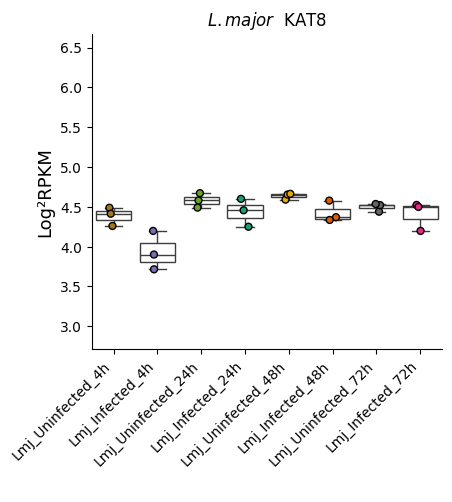

carregando


<Figure size 1200x800 with 0 Axes>

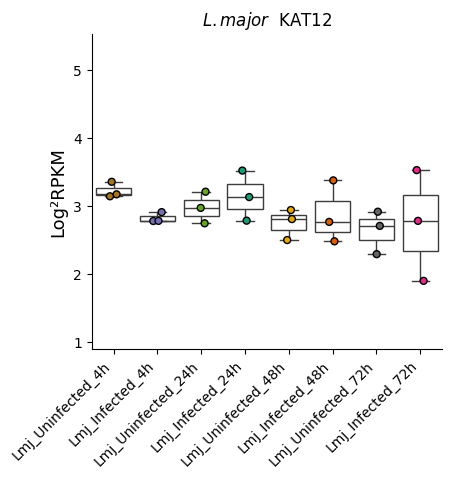

carregando


<Figure size 1200x800 with 0 Axes>

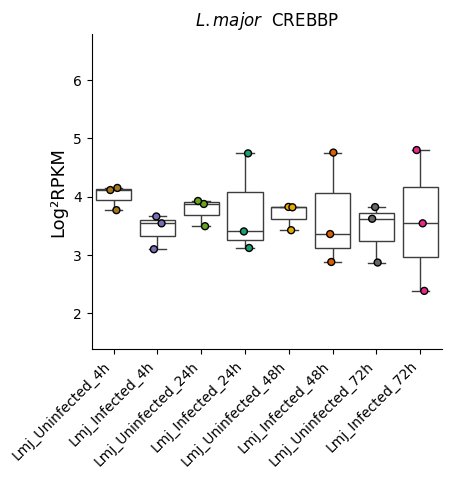

carregando


<Figure size 1200x800 with 0 Axes>

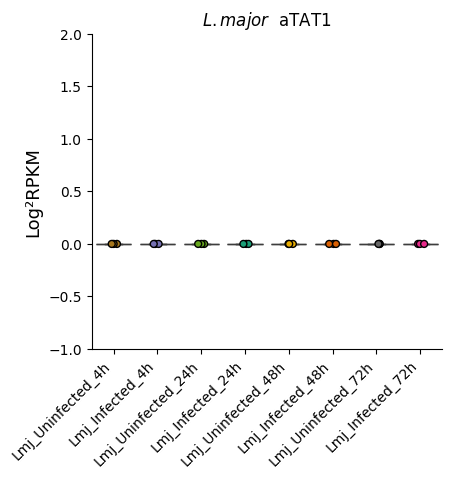

carregando


<Figure size 1200x800 with 0 Axes>

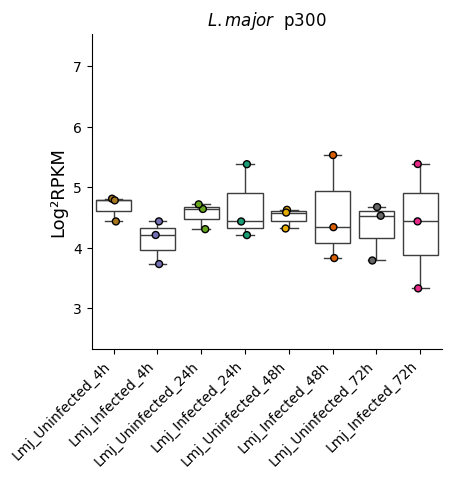

carregando


<Figure size 1200x800 with 0 Axes>

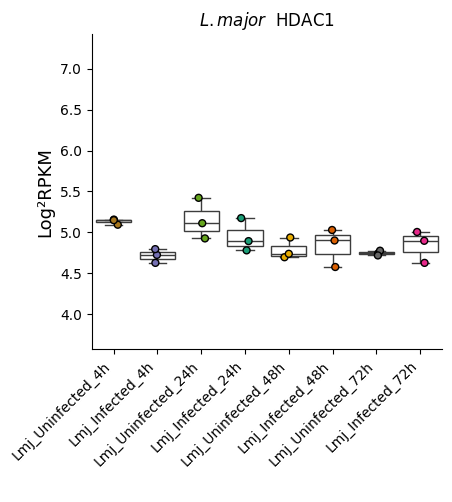

carregando


<Figure size 1200x800 with 0 Axes>

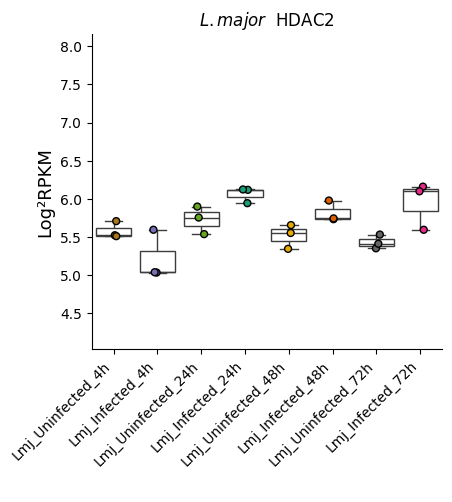

carregando


<Figure size 1200x800 with 0 Axes>

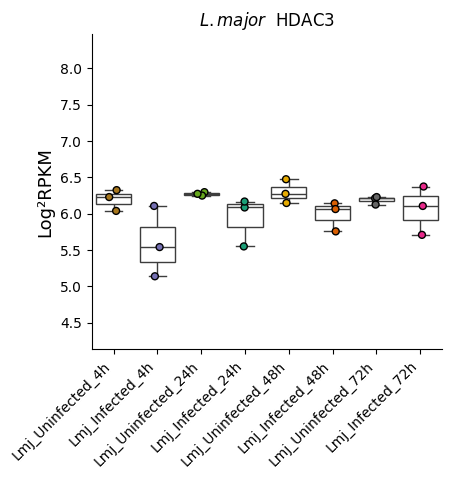

carregando


<Figure size 1200x800 with 0 Axes>

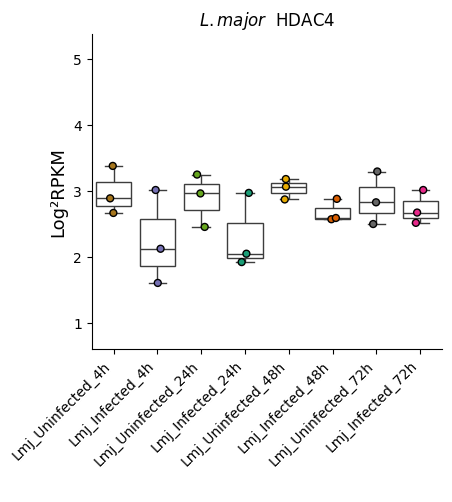

carregando


<Figure size 1200x800 with 0 Axes>

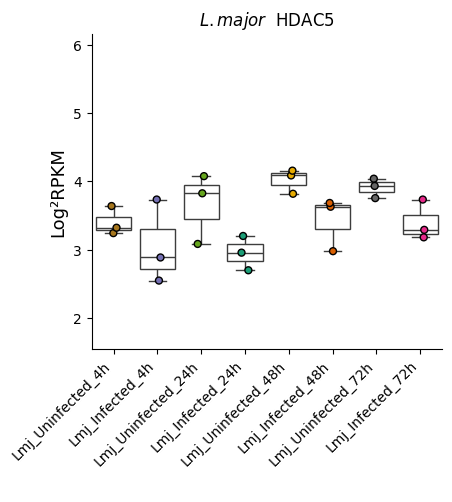

carregando


<Figure size 1200x800 with 0 Axes>

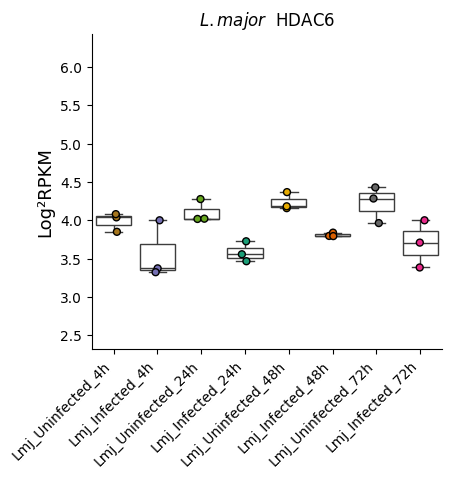

carregando


<Figure size 1200x800 with 0 Axes>

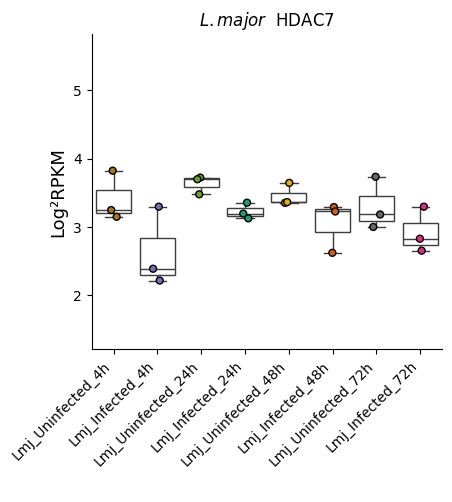

carregando


<Figure size 1200x800 with 0 Axes>

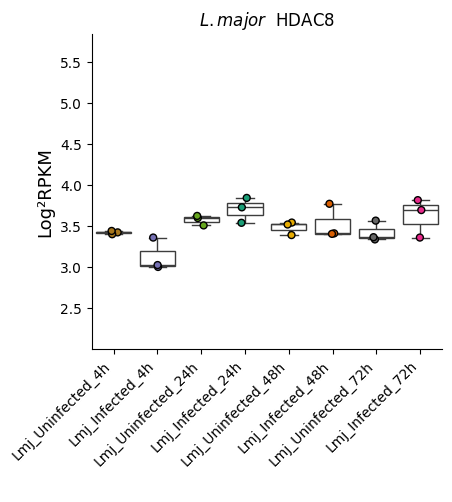

carregando


<Figure size 1200x800 with 0 Axes>

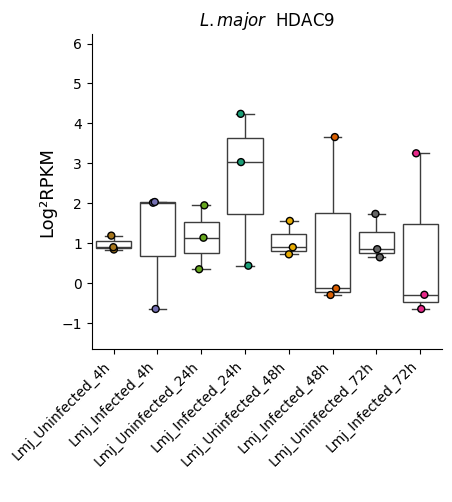

carregando


<Figure size 1200x800 with 0 Axes>

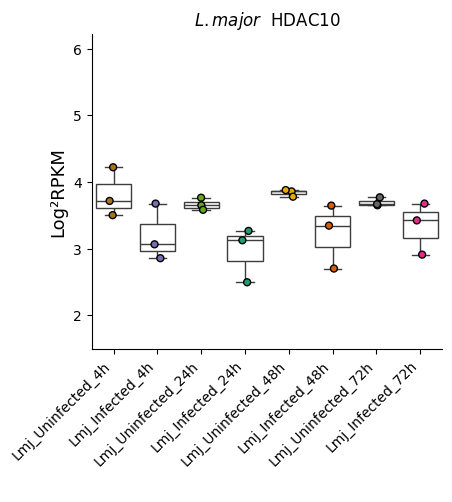

carregando


<Figure size 1200x800 with 0 Axes>

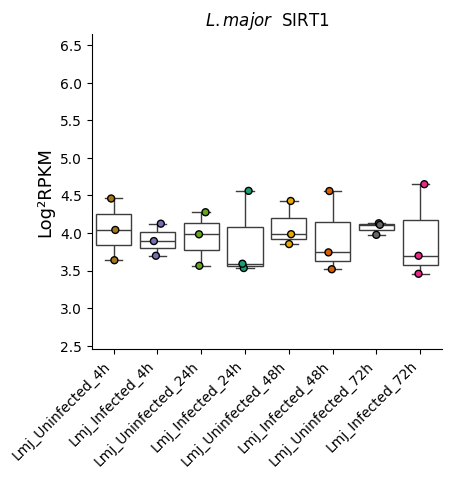

carregando


<Figure size 1200x800 with 0 Axes>

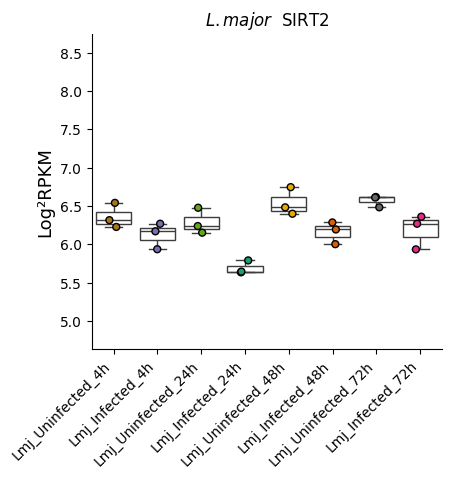

carregando


<Figure size 1200x800 with 0 Axes>

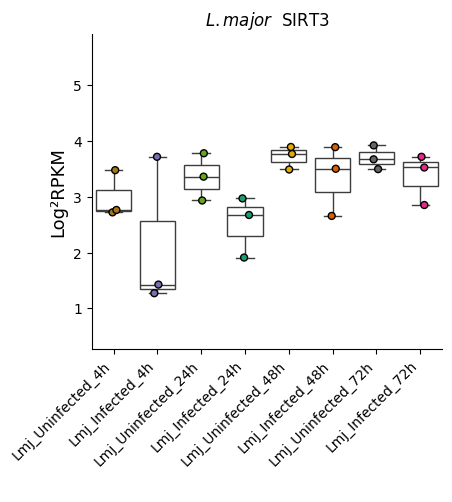

carregando


<Figure size 1200x800 with 0 Axes>

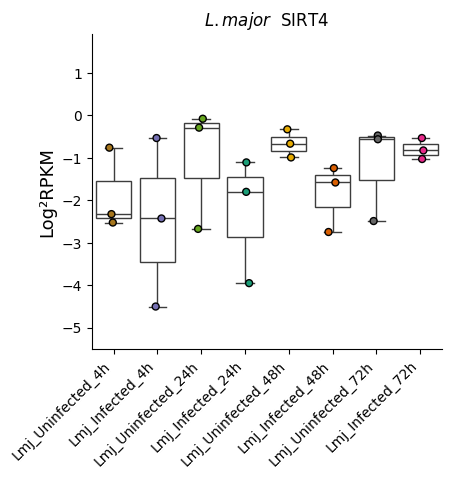

carregando


<Figure size 1200x800 with 0 Axes>

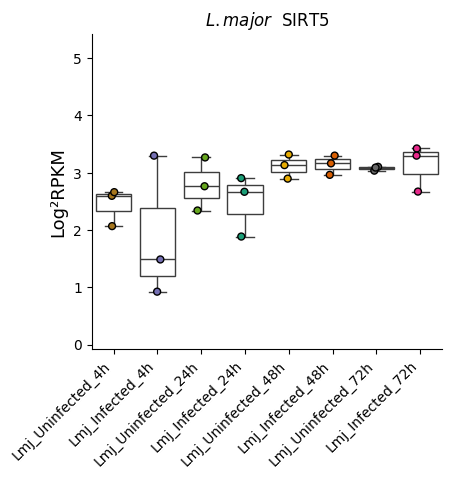

carregando


<Figure size 1200x800 with 0 Axes>

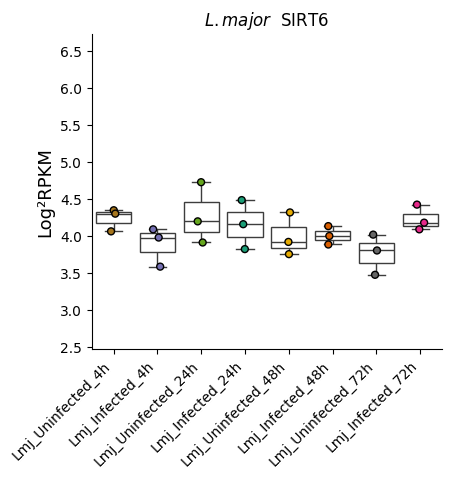

carregando


<Figure size 1200x800 with 0 Axes>

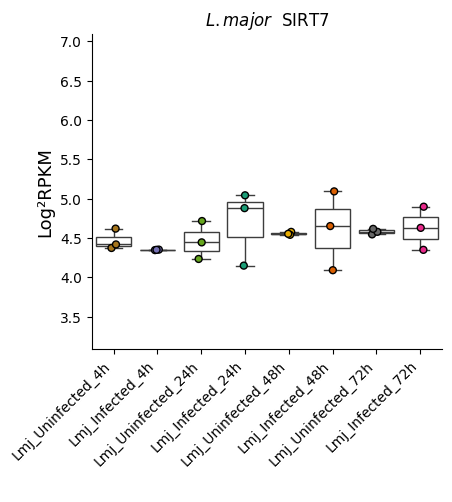

carregando


In [ ]:
graficos_boxplot(subset_PRJNA290995_df_Lmj, "Dark2", "L. major",lmj)


<Figure size 1200x800 with 0 Axes>

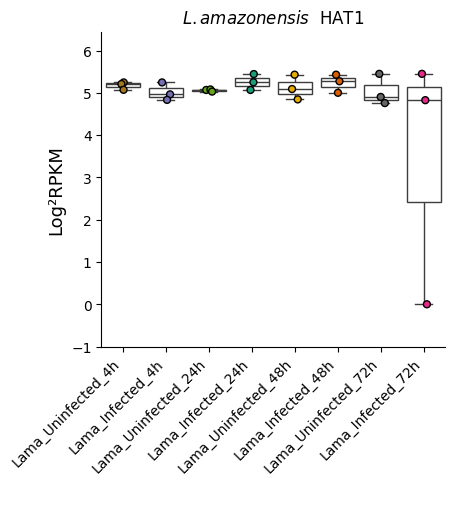

carregando


<Figure size 1200x800 with 0 Axes>

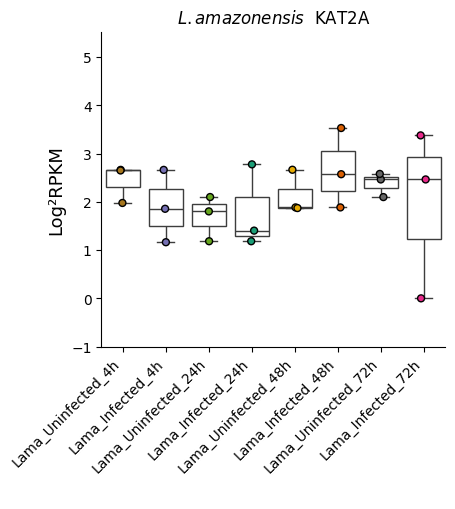

carregando


<Figure size 1200x800 with 0 Axes>

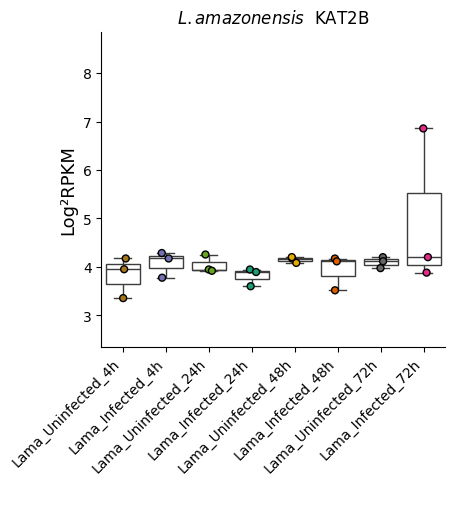

carregando


<Figure size 1200x800 with 0 Axes>

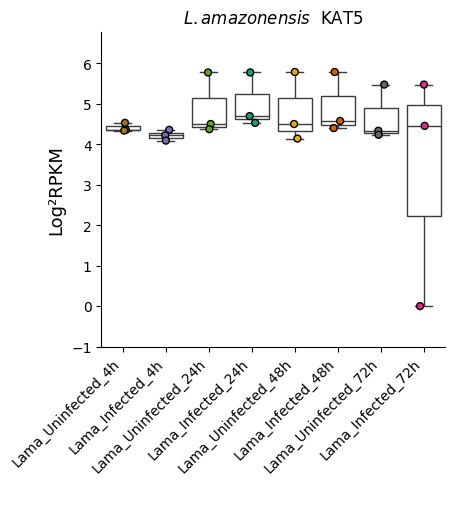

carregando


<Figure size 1200x800 with 0 Axes>

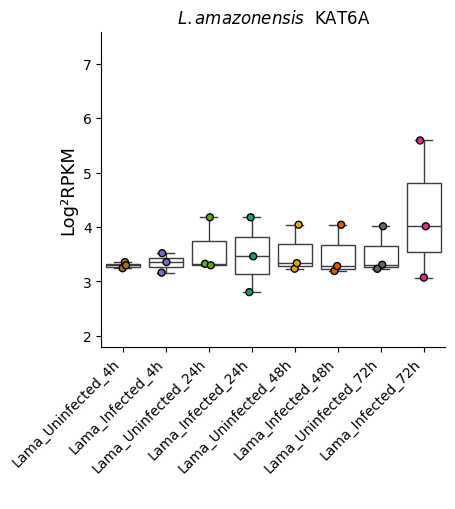

carregando


<Figure size 1200x800 with 0 Axes>

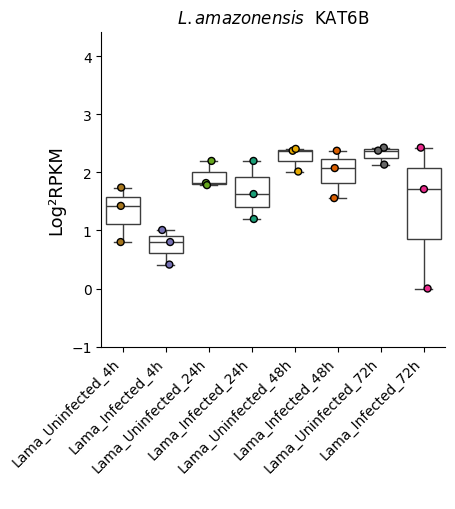

carregando


<Figure size 1200x800 with 0 Axes>

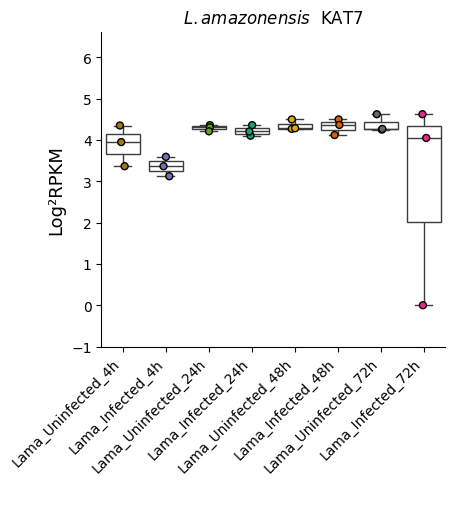

carregando


<Figure size 1200x800 with 0 Axes>

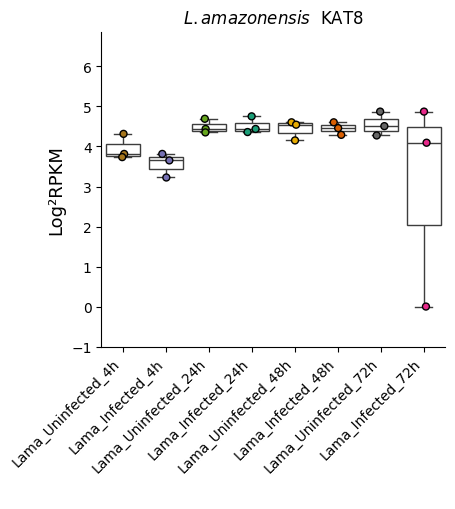

carregando


<Figure size 1200x800 with 0 Axes>

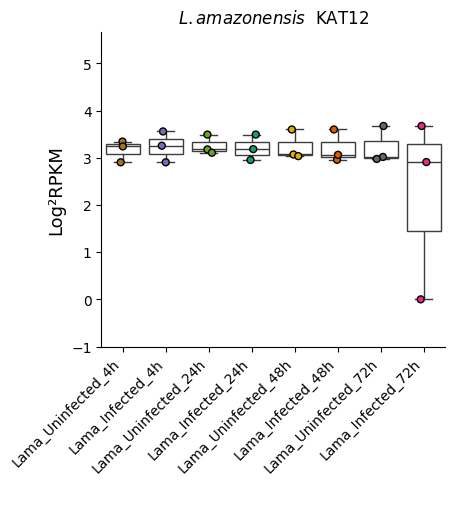

carregando


<Figure size 1200x800 with 0 Axes>

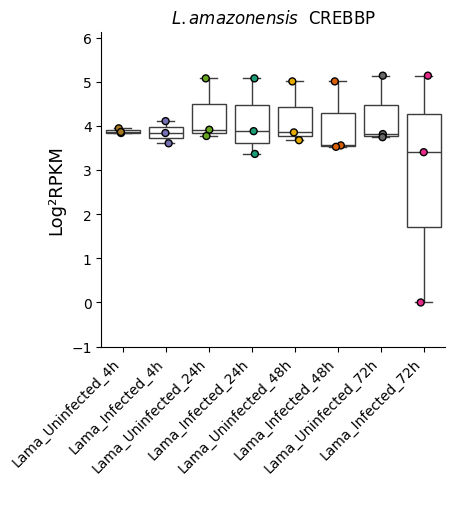

carregando


<Figure size 1200x800 with 0 Axes>

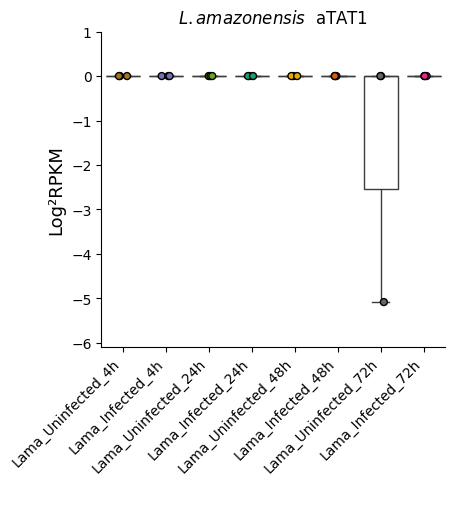

carregando


<Figure size 1200x800 with 0 Axes>

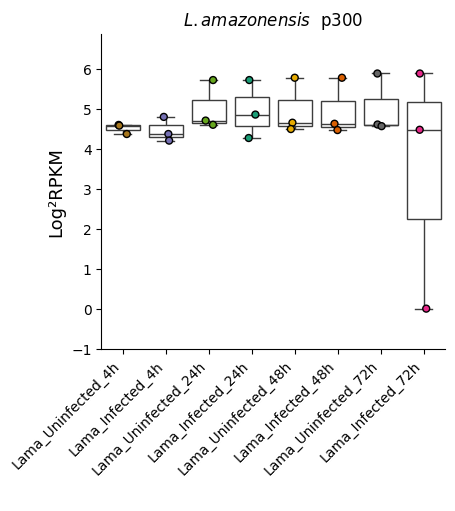

carregando


<Figure size 1200x800 with 0 Axes>

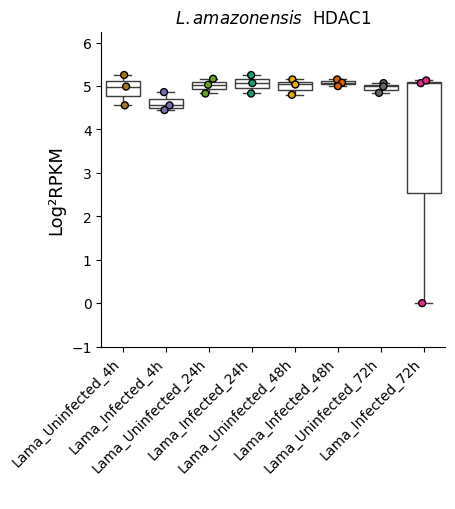

carregando


<Figure size 1200x800 with 0 Axes>

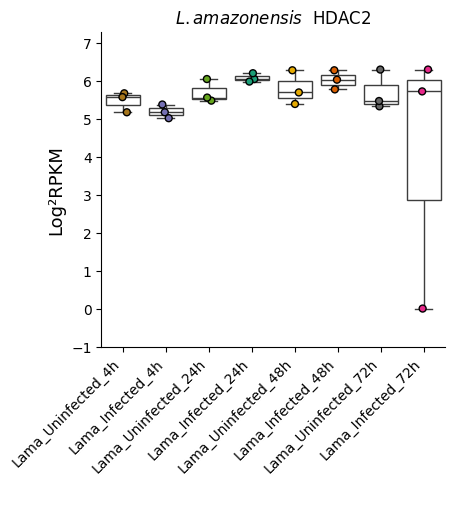

carregando


<Figure size 1200x800 with 0 Axes>

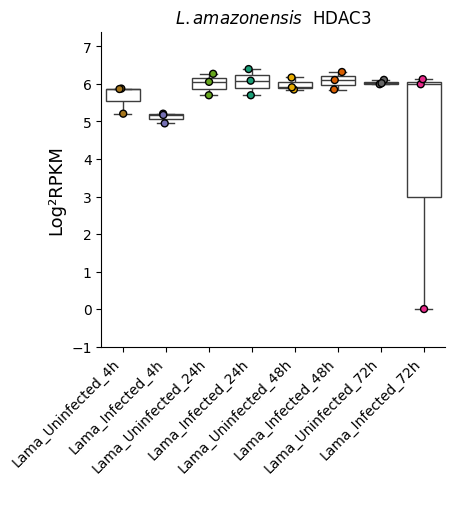

carregando


<Figure size 1200x800 with 0 Axes>

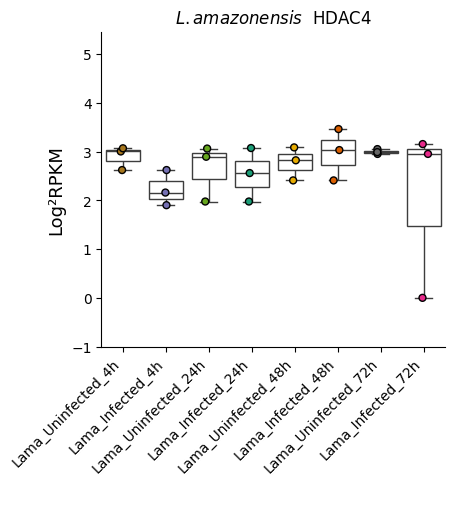

carregando


<Figure size 1200x800 with 0 Axes>

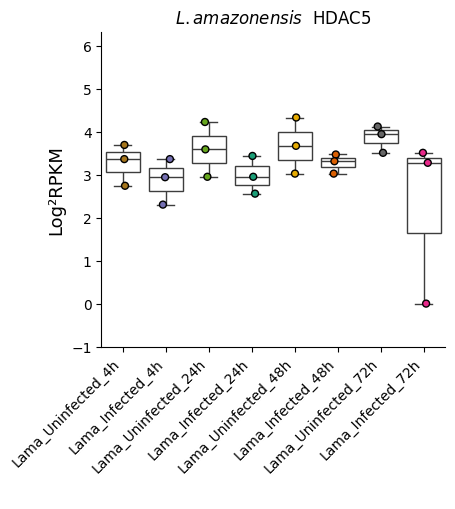

carregando


<Figure size 1200x800 with 0 Axes>

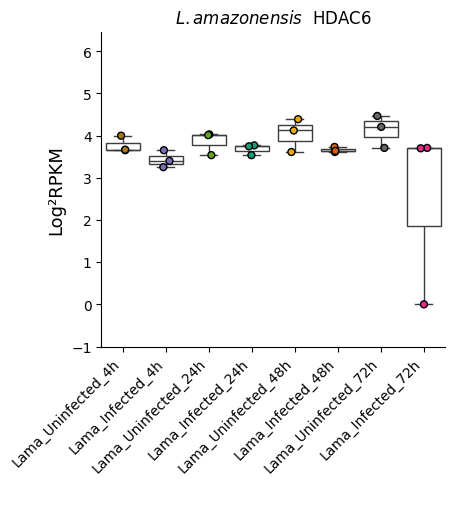

carregando


<Figure size 1200x800 with 0 Axes>

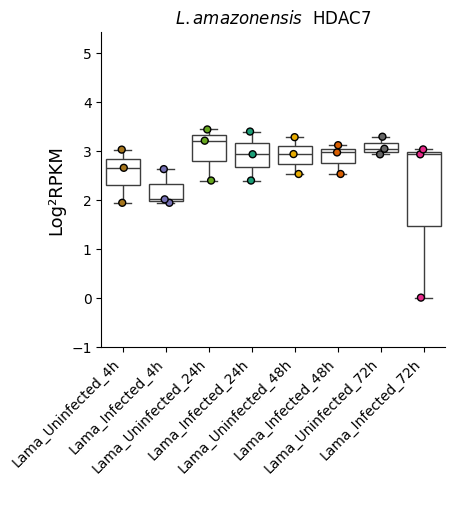

carregando


<Figure size 1200x800 with 0 Axes>

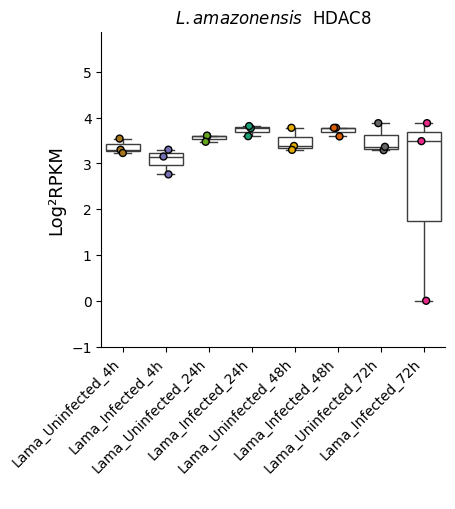

carregando


<Figure size 1200x800 with 0 Axes>

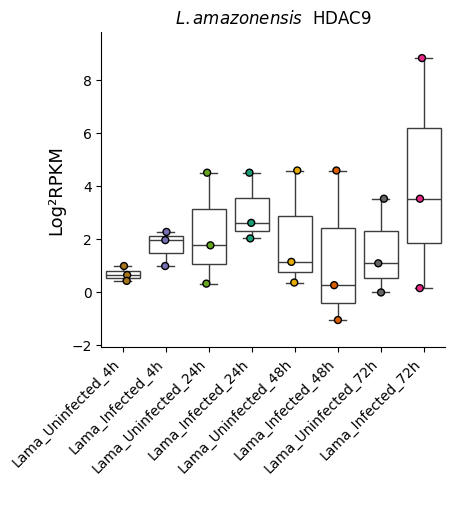

carregando


<Figure size 1200x800 with 0 Axes>

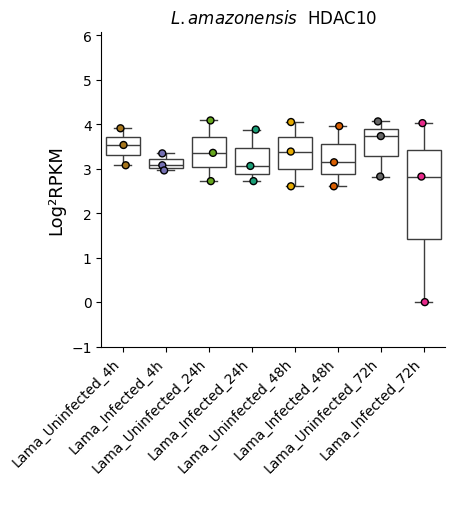

carregando


<Figure size 1200x800 with 0 Axes>

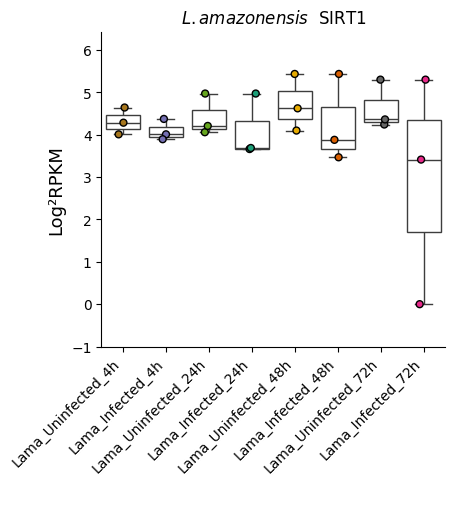

carregando


<Figure size 1200x800 with 0 Axes>

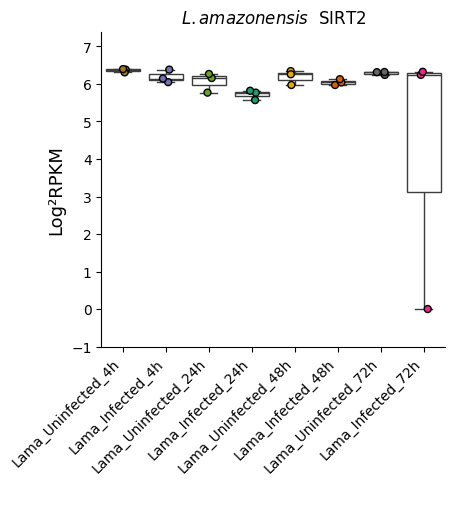

carregando


<Figure size 1200x800 with 0 Axes>

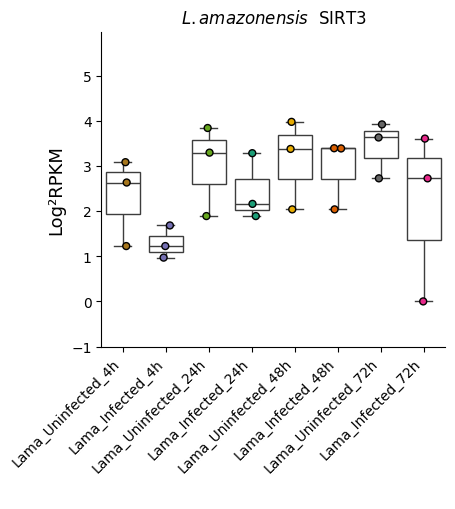

carregando


<Figure size 1200x800 with 0 Axes>

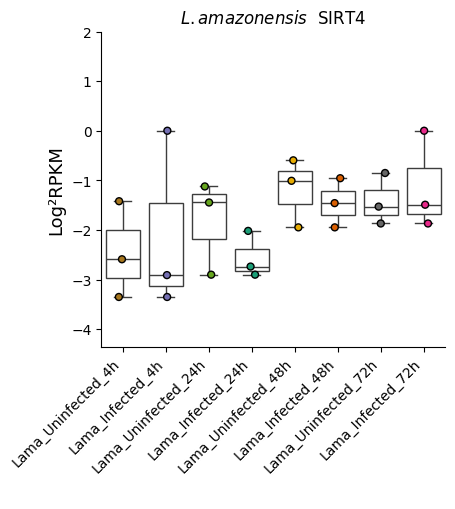

carregando


<Figure size 1200x800 with 0 Axes>

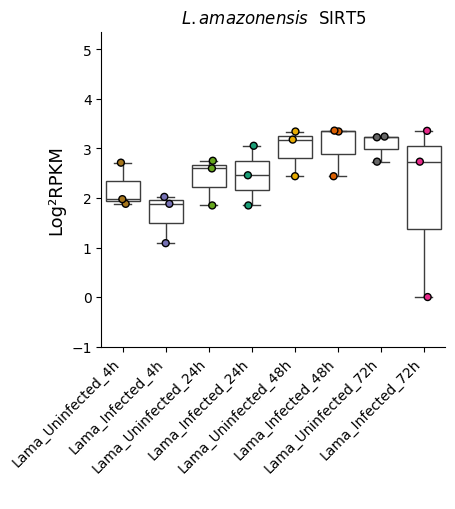

carregando


<Figure size 1200x800 with 0 Axes>

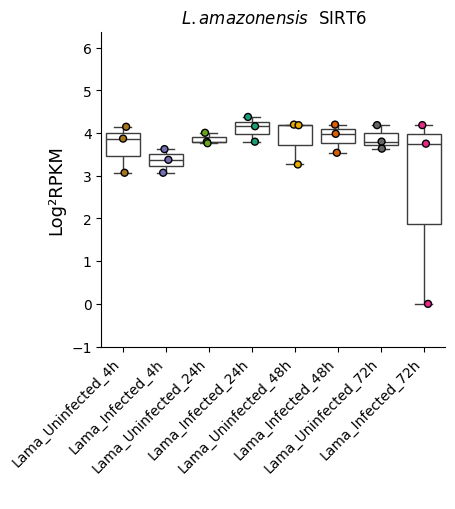

carregando


<Figure size 1200x800 with 0 Axes>

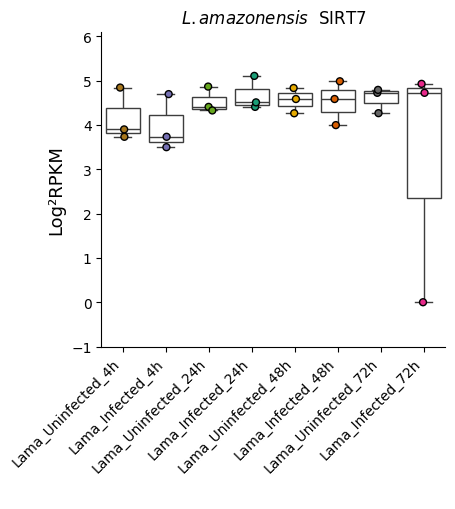

carregando


In [ ]:
graficos_boxplot(subset_PRJNA290995_df_Lama, "Dark2", "L. amazonensis",lama)

In [ ]:
subset_PRJNA290995_df_Lmj
subset_PRJNA290995_df_Lama

PRJNA290995

##PRJNA516707

In [ ]:
PRJNA516707_tab = pd.read_excel(PRJNA516707 )
PRJNA516707_tab.head()

Nome  Control_Uninfected_SRR8479210  Infected_Ldono_A2_SRR8479211  \
0  YTHDF1                       4.206024                      4.101487   
1  YTHDF2                       4.348690                      4.009889   
2  YTHDF3                       4.422908                      3.497289   
3  YTHDC1                       4.151685                      3.525242   
4     FTO                       4.795192                      4.634867   

   Infected_Ldono_A5_SRR8479212  
0                      4.138054  
1                      3.647246  
2                      1.608254  
3                      1.810422  
4                      4.548032

In [ ]:
# Lista de genes desejados
genes_desejados = ['HAT1','KAT2A','KAT2B','KAT5','KAT6A','KAT6B','KAT7','KAT8','KAT12',
'CREBBP','aTAT1','p300','HDAC1','HDAC2','HDAC3','HDAC4','HDAC5','HDAC6','HDAC7',
'HDAC8','HDAC9','HDAC10','SIRT1','SIRT2','SIRT3','SIRT4','SIRT5','SIRT6','SIRT7'
]

# Filtrando o DataFrame para manter apenas as linhas com genes desejados na coluna "nome"
df_filtrado = PRJNA516707_tab[PRJNA516707_tab['Nome'].isin(genes_desejados)]
# # Visualizando o DataFrame filtrado
df_filtrado.index = df_filtrado["Nome"]


In [ ]:
df_filtrado = df_filtrado.T
df_filtrado

Nome                               HAT1     KAT2A     KAT2B      KAT5  \
Nome                               HAT1     KAT2A     KAT2B      KAT5   
Control_Uninfected_SRR8479210   4.03476  4.097301  3.640333  5.003293   
Infected_Ldono_A2_SRR8479211   4.088559  4.180887  2.454082   5.24296   
Infected_Ldono_A5_SRR8479212   4.095771  3.907176  1.120665  5.095255   

Nome                              KAT6A     KAT6B      KAT7      KAT8  \
Nome                              KAT6A     KAT6B      KAT7      KAT8   
Control_Uninfected_SRR8479210  2.634837  0.566103  5.509747  3.803464   
Infected_Ldono_A2_SRR8479211   1.815955 -0.637006  5.639496  4.062881   
Infected_Ldono_A5_SRR8479212   0.194698 -2.057369  5.683107  3.952271   

Nome                              KAT12    CREBBP  ...     HDAC8     HDAC9  \
Nome                              KAT12    CREBBP  ...     HDAC8     HDAC9   
Control_Uninfected_SRR8479210  3.735952  2.004462  ...  2.233906 -2.877602   
Infected_Ldono_A2_SRR8479211   3.241352  1.011139  ...  2.024672       0.0   
Infected_Ldono_A5_SRR8479212   3.110235 -0.029082  ...  2.512189 -3.864023   

Nome                             HDAC10     SIRT1     SIRT2     SIRT3  \
Nome                             HDAC10     SIRT1     SIRT2     SIRT3   
Control_Uninfected_SRR8479210  2.985698  2.376747  6.885786  3.521887   
Infected_Ldono_A2_SRR8479211   3.028609  2.275269  7.309156  3.472927   
Infected_Ldono_A5_SRR8479212    3.53146 -0.254757  7.114289  3.600119   

Nome                              SIRT4     SIRT5     SIRT6     SIRT7  
Nome                              SIRT4     SIRT5     SIRT6     SIRT7  
Control_Uninfected_SRR8479210    2.7223  1.907695  4.788953  6.047401  
Infected_Ldono_A2_SRR8479211    3.10045  1.765575  5.262831  6.334864  
Infected_Ldono_A5_SRR8479212   2.970344  1.166387  5.178082  5.993596  

[4 rows x 29 columns]

In [ ]:
df_filtrado = df_filtrado.iloc[1:]

In [ ]:
df_filtrado["Status"] = ["Control_Uninfected", "InfectedA2", "Infected_A5"]
df_filtrado

<ipython-input-8-d280beff2c6f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtrado["Status"] = ["Control_Uninfected", "InfectedA2", "Infected_A5"]


Nome                               HAT1     KAT2A     KAT2B      KAT5  \
Control_Uninfected_SRR8479210   4.03476  4.097301  3.640333  5.003293   
Infected_Ldono_A2_SRR8479211   4.088559  4.180887  2.454082   5.24296   
Infected_Ldono_A5_SRR8479212   4.095771  3.907176  1.120665  5.095255   

Nome                              KAT6A     KAT6B      KAT7      KAT8  \
Control_Uninfected_SRR8479210  2.634837  0.566103  5.509747  3.803464   
Infected_Ldono_A2_SRR8479211   1.815955 -0.637006  5.639496  4.062881   
Infected_Ldono_A5_SRR8479212   0.194698 -2.057369  5.683107  3.952271   

Nome                              KAT12    CREBBP  ...     HDAC9    HDAC10  \
Control_Uninfected_SRR8479210  3.735952  2.004462  ... -2.877602  2.985698   
Infected_Ldono_A2_SRR8479211   3.241352  1.011139  ...       0.0  3.028609   
Infected_Ldono_A5_SRR8479212   3.110235 -0.029082  ... -3.864023   3.53146   

Nome                              SIRT1     SIRT2     SIRT3     SIRT4  \
Control_Uninfected_SRR8479210  2.376747  6.885786  3.521887    2.7223   
Infected_Ldono_A2_SRR8479211   2.275269  7.309156  3.472927   3.10045   
Infected_Ldono_A5_SRR8479212  -0.254757  7.114289  3.600119  2.970344   

Nome                              SIRT5     SIRT6     SIRT7  \
Control_Uninfected_SRR8479210  1.907695  4.788953  6.047401   
Infected_Ldono_A2_SRR8479211   1.765575  5.262831  6.334864   
Infected_Ldono_A5_SRR8479212   1.166387  5.178082  5.993596   

Nome                                       Status  
Control_Uninfected_SRR8479210  Control_Uninfected  
Infected_Ldono_A2_SRR8479211           InfectedA2  
Infected_Ldono_A5_SRR8479212          Infected_A5  

[3 rows x 30 columns]

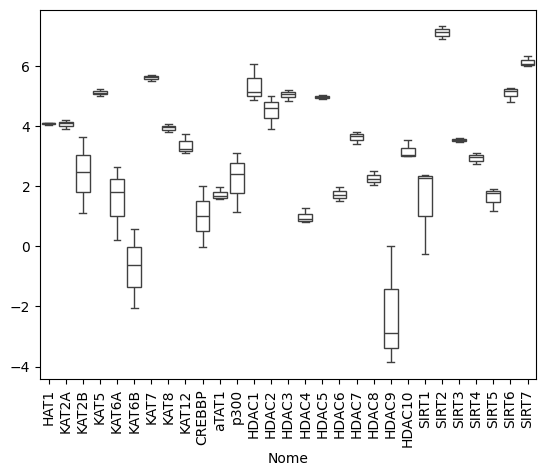

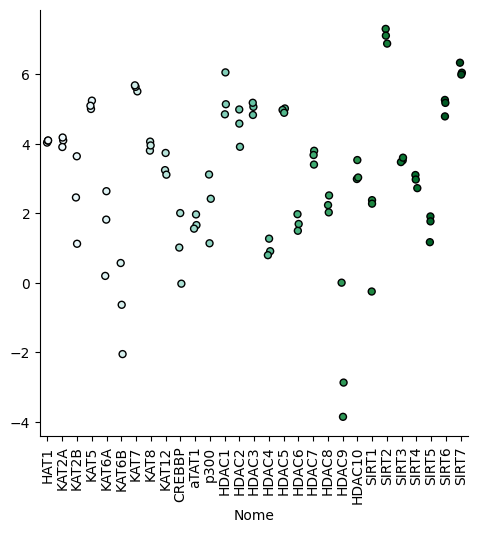

In [ ]:
grafico=sns.boxplot(data=df_filtrado, showcaps=True, boxprops={'facecolor': 'None'}, showfliers=True, whiskerprops={'linewidth': 1})
plt.xticks(rotation=90)


grafico=sns.catplot(data=df_filtrado,kind="strip", size=5,palette= "BuGn" ,edgecolor='black',linewidth=1,)
plt.xticks(rotation=90)

plt.show(grafico)

In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
  for i in tabela:
    if "Status" in i: continue

    plt.figure(figsize=(8,4));
    graficos=sns.catplot(data=tabela,x="Status",y=i,kind="strip", size=10,palette= paleta ,edgecolor='black',linewidth=1,hue="Status",);
    graficos=sns.boxplot(data = tabela,x="Status", y = i, showcaps=True,boxprops={'facecolor':'None'},showfliers=True,whiskerprops={'linewidth':1})
    # graficos.set_xticklabels(rotation=0)
    # graficos.set_axis_labels("Time", "Log²RPKM")

    plt.ylim(min(tabela[i])-1,max(tabela[i])+1)
    titulo = plt.gcf().suptitle(f'${especie}$  '+i, fontsize=14)
    titulo.set_y(1.05)
    graficos = plt.xlabel(' ', fontdict={'size': 13});
    graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});
    # plt.savefig(f"{caminho}/{i}.png",dpi=200, format='png')
    plt.show(graficos)
    print("carregando")



<Figure size 800x400 with 0 Axes>

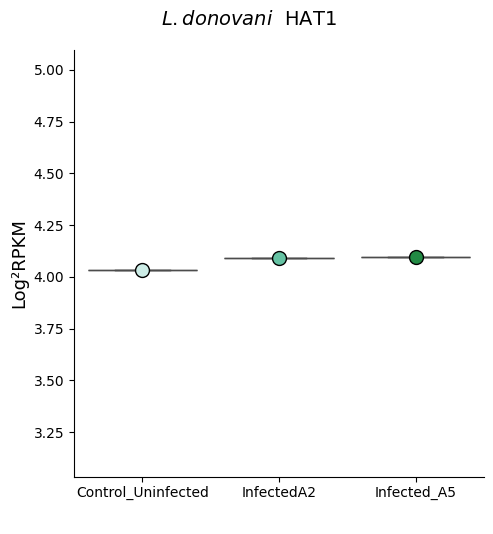

carregando


<Figure size 800x400 with 0 Axes>

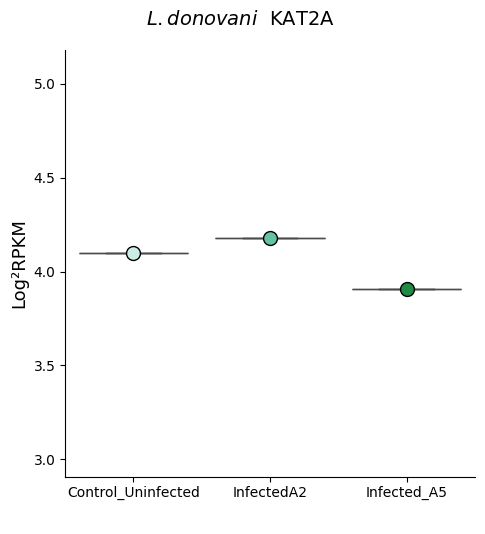

carregando


<Figure size 800x400 with 0 Axes>

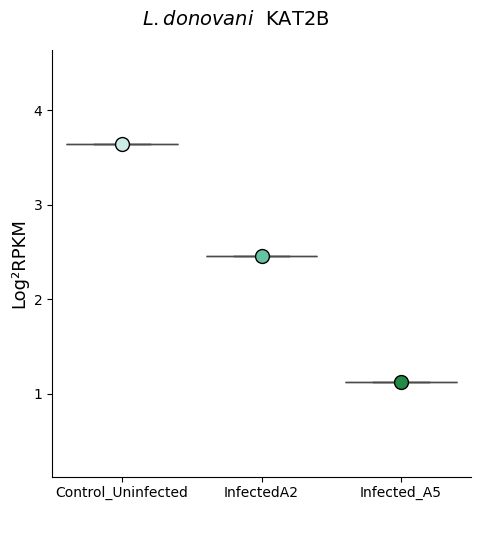

carregando


<Figure size 800x400 with 0 Axes>

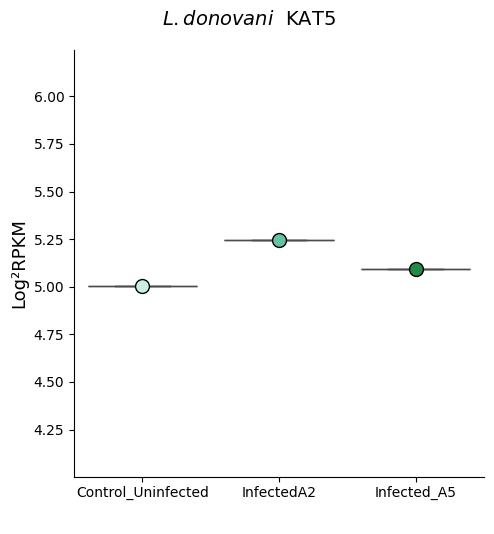

carregando


<Figure size 800x400 with 0 Axes>

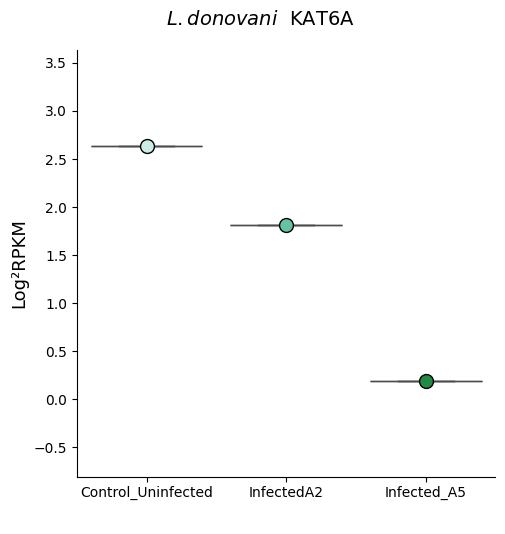

carregando


<Figure size 800x400 with 0 Axes>

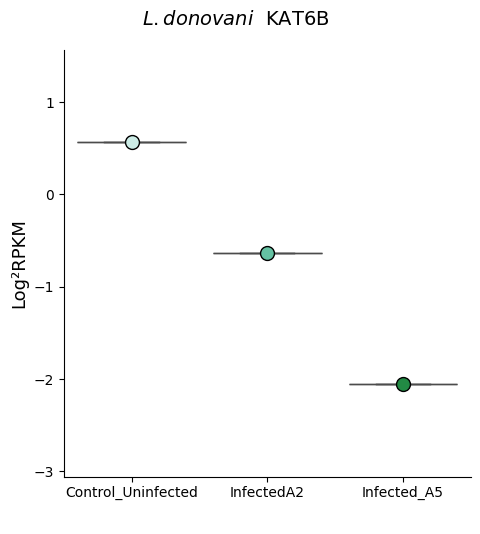

carregando


<Figure size 800x400 with 0 Axes>

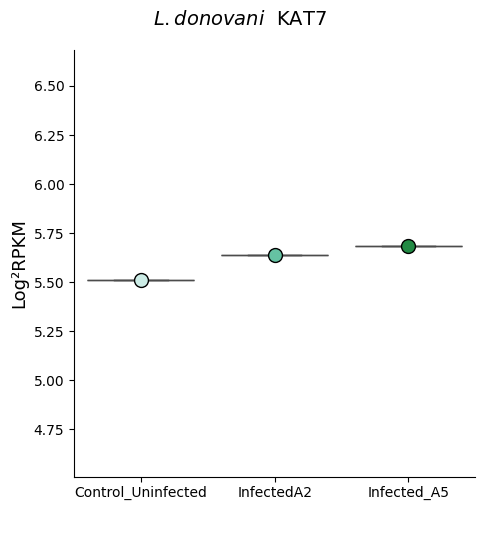

carregando


<Figure size 800x400 with 0 Axes>

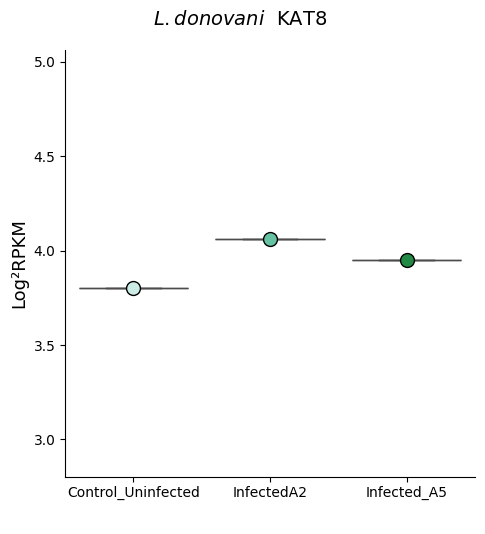

carregando


<Figure size 800x400 with 0 Axes>

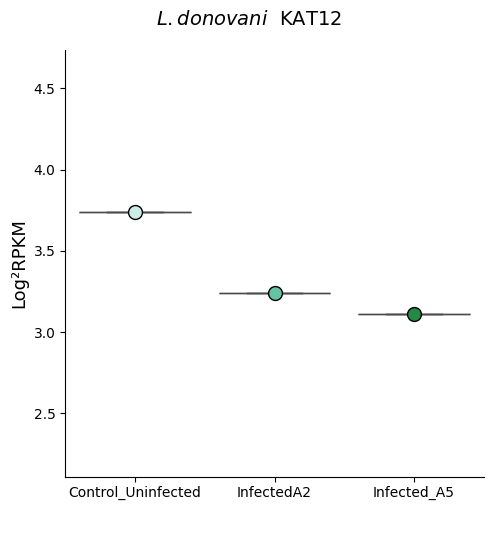

carregando


<Figure size 800x400 with 0 Axes>

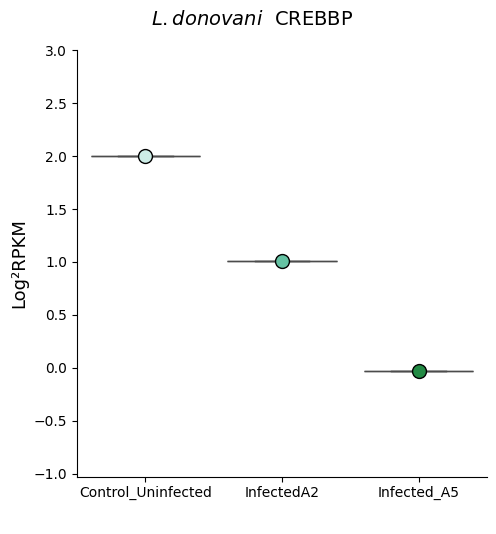

carregando


<Figure size 800x400 with 0 Axes>

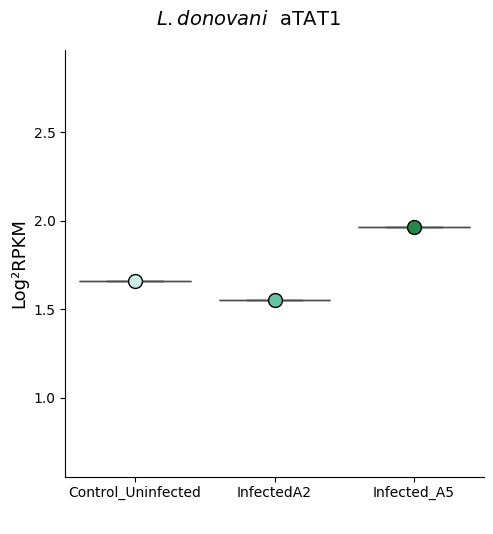

carregando


<Figure size 800x400 with 0 Axes>

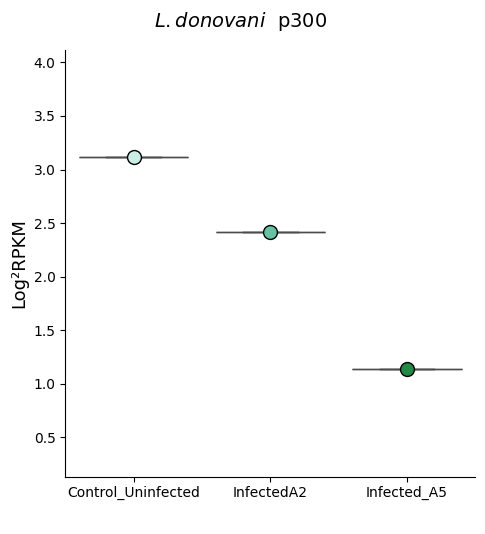

carregando


<Figure size 800x400 with 0 Axes>

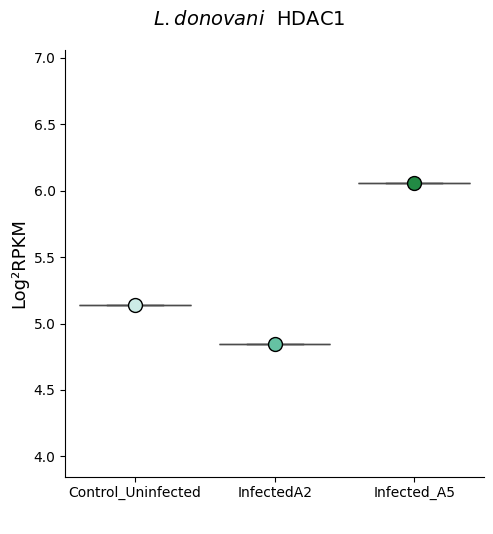

carregando


<Figure size 800x400 with 0 Axes>

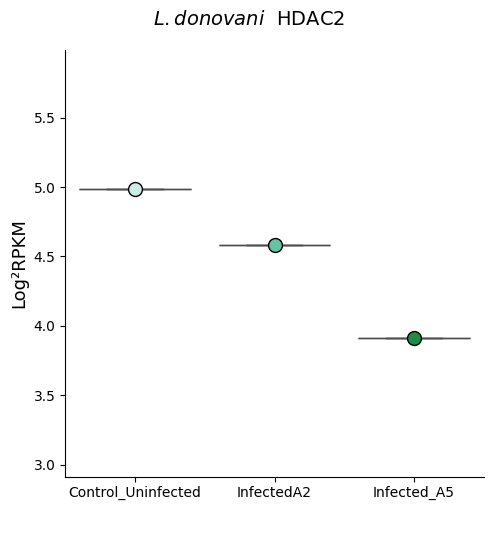

carregando


<Figure size 800x400 with 0 Axes>

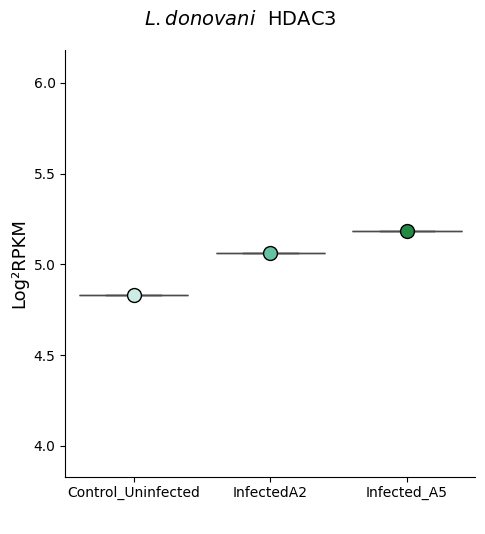

carregando


<Figure size 800x400 with 0 Axes>

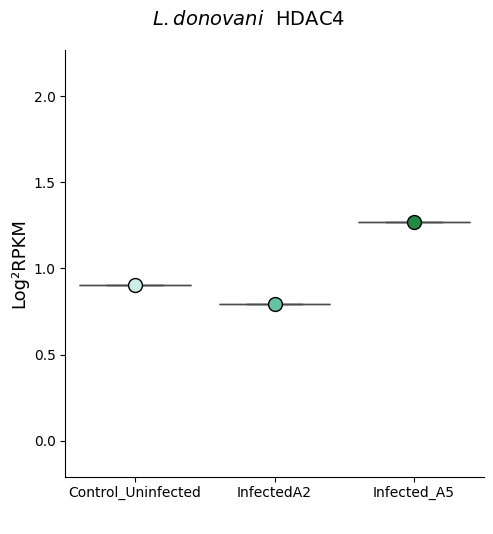

carregando


<Figure size 800x400 with 0 Axes>

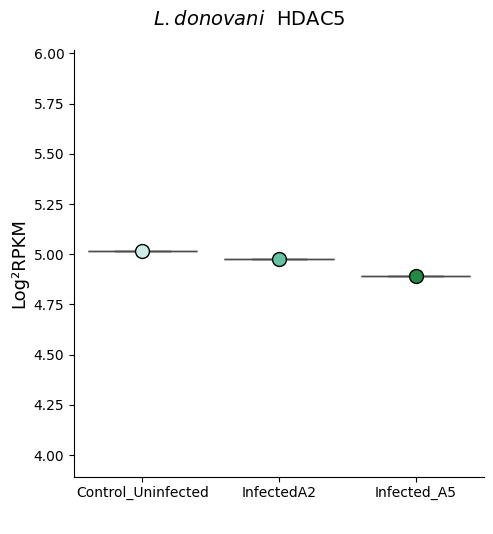

carregando


<Figure size 800x400 with 0 Axes>

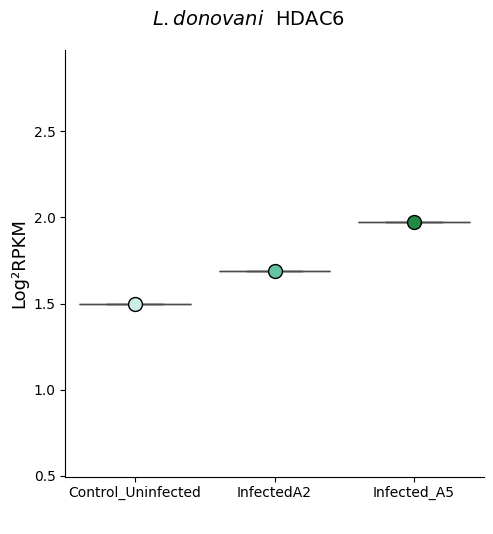

carregando


<Figure size 800x400 with 0 Axes>

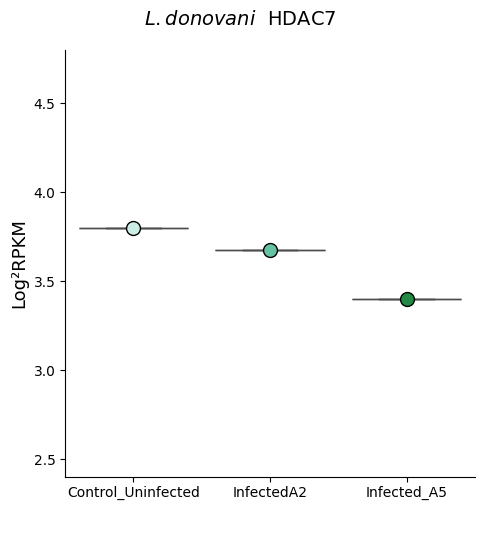

carregando


<Figure size 800x400 with 0 Axes>

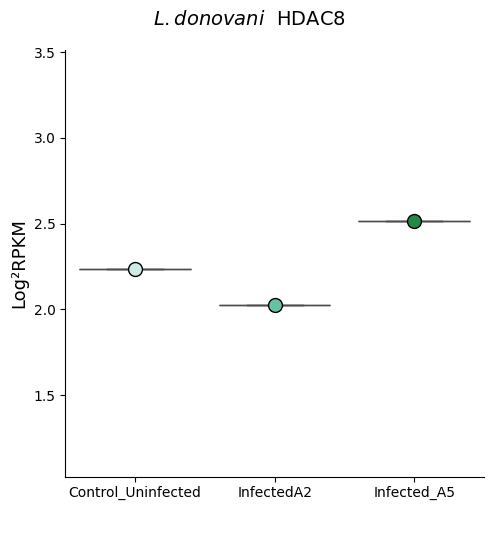

carregando


<Figure size 800x400 with 0 Axes>

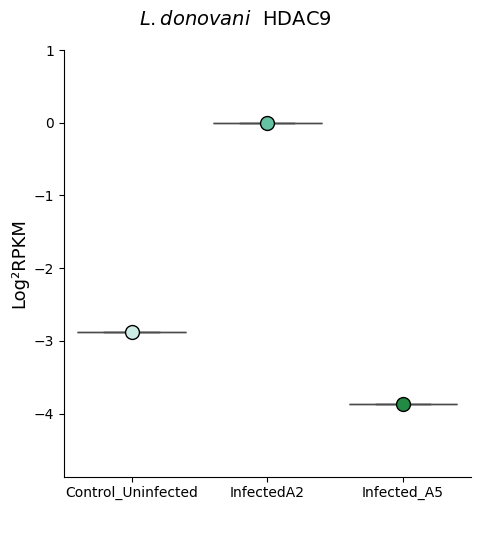

carregando


<Figure size 800x400 with 0 Axes>

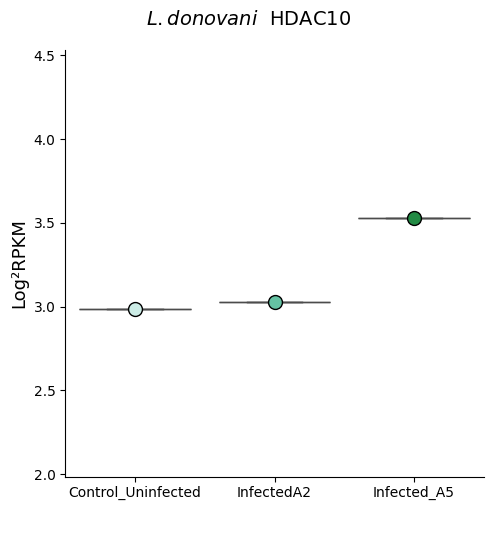

carregando


<Figure size 800x400 with 0 Axes>

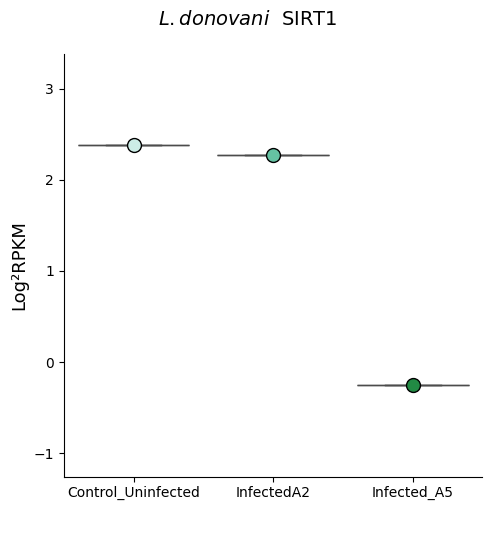

carregando


<Figure size 800x400 with 0 Axes>

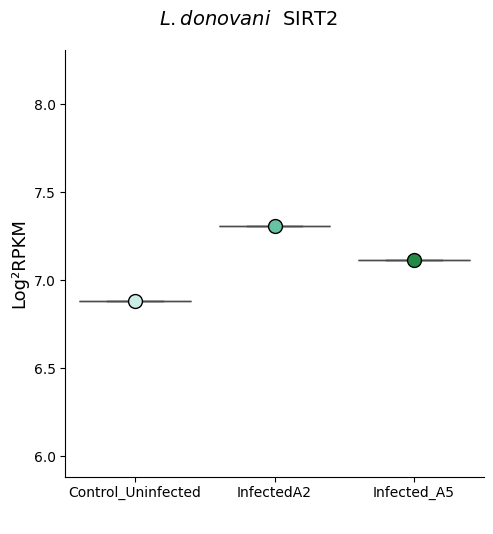

carregando


<Figure size 800x400 with 0 Axes>

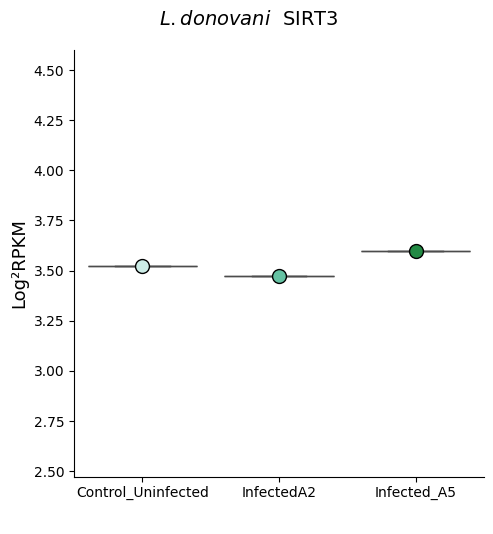

carregando


<Figure size 800x400 with 0 Axes>

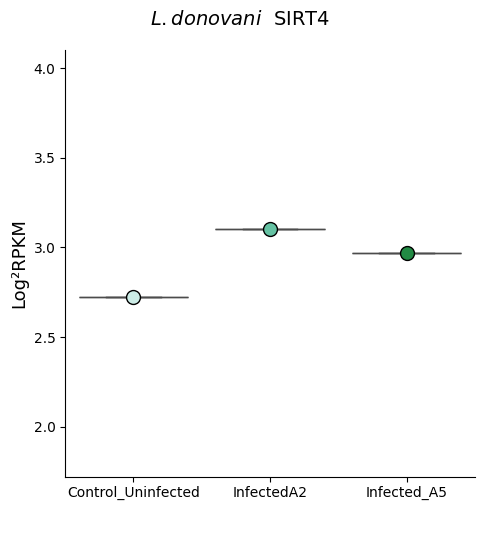

carregando


<Figure size 800x400 with 0 Axes>

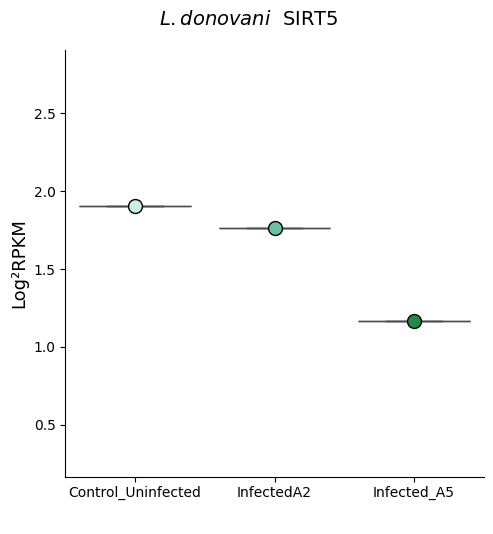

carregando


<Figure size 800x400 with 0 Axes>

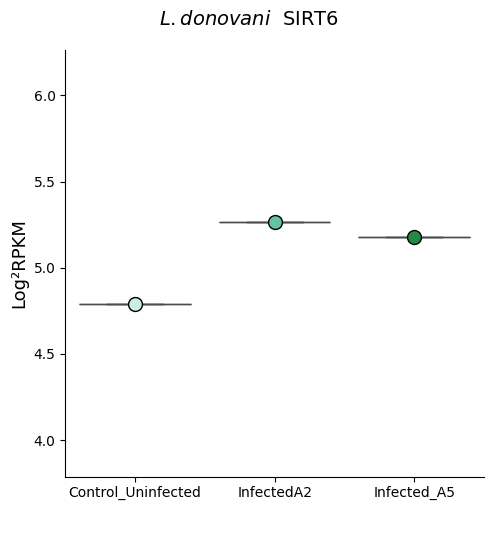

carregando


<Figure size 800x400 with 0 Axes>

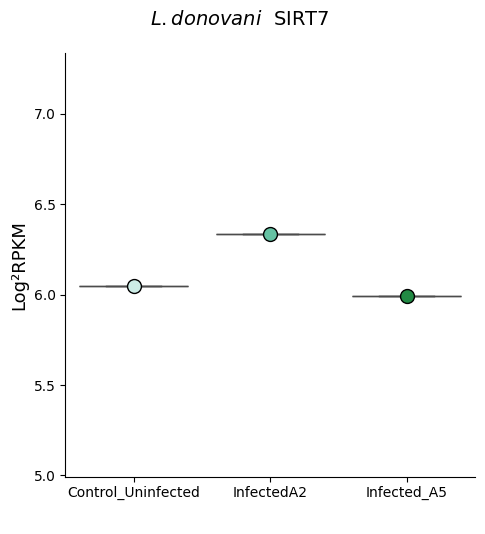

carregando


In [ ]:

# for i in df_filtrado:
#     # plt.figure(figsize=(8,4));
#     graficos=sns.catplot(data=df_filtrado,x="Status",y=i, kind="strip",size=10,palette= "BuGn" ,hue="Status");

#     # graficos=sns.boxplot(data = df_filtrado,x="Status", y = i, showcaps=True,boxprops={'facecolor':'None'},showfliers=True,whiskerprops={'linewidth':1})
#     # graficos.set_xticklabels(rotation=0)
#     # graficos.set_axis_labels("Time", "Log²RPKM")
#     # graficos.set_titles("sdad")
#     # plt.ylim(min(tabela[i])-1,max(tabela[i])+1)
#     # titulo = plt.gcf().suptitle(f'${especie}$  '+i, fontsize=14)
#     # titulo.set_y(1.05)
#     # graficos = plt.xlabel(' ', fontdict={'size': 13});
#     # graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});
#     # plt.savefig(f"{caminho}/{i}.png",dpi=200, format='png')
#     plt.show(graficos)
#     print("carregando")

graficos_boxplot(df_filtrado, "BuGn", "L. donovani", ["Control_Uninfected", "Infected_Ldono", "Infected_Ldono"])
# graficos =sns.catplot(data=df_filtrado,x="Status",y=i,kind="strip", size=10,palette= paleta ,edgecolor='black',linewidth=1,ec="Black", alpha=1,hue="Status",order = ordem);
# graficos =sns.boxplot(data = df_filtrado,x="Status", y = i, showcaps=True,boxprops={'facecolor':'None'},showfliers=True,whiskerprops={'linewidth':1}, order = ordem,)

##PRJNA552352  

##PRJNA601732

In [ ]:
PRJNA601732_tab = pd.read_excel(PRJNA601732 )
PRJNA601732_tab.head()

Nome  Infected_Mouse_Ldonovani1  Infected_Mouse_Ldonovani10  \
0  YTHDF1                   4.797692                    3.949929   
1  YTHDF2                   5.286845                    3.789202   
2  YTHDF3                   5.786607                    5.419098   
3  YTHDC1                   5.575178                    4.208377   
4     FTO                   4.681569                    4.338228   

   Infected_Mouse_Ldonovani2  Infected_Mouse_Ldonovani3  \
0                   4.981626                   4.936650   
1                   5.190563                   5.263156   
2                   6.055765                   5.823467   
3                   5.717751                   5.571168   
4                   4.813266                   4.720604   

   Infected_Mouse_Ldonovani4  Infected_Mouse_Ldonovani5  \
0                   4.847908                   4.948637   
1                   5.214163                   5.183272   
2                   5.941092                   5.787205   
3                   5.540941                   5.498622   
4                   4.752599                   4.666357   

   Infected_Mouse_Ldonovani6  Infected_Mouse_Ldonovani7  \
0                   4.166941                   3.957723   
1                   3.759020                   3.939599   
2                   5.418640                   5.361933   
3                   4.233908                   4.305356   
4                   4.721351                   4.489697   

   Infected_Mouse_Ldonovani8  ...  Uninfected_MouseC1  Uninfected_MouseC10  \
0                   4.039697  ...            4.129603             4.981286   
1                   3.969780  ...            4.066061             5.313471   
2                   5.414753  ...            5.605753             6.295163   
3                   4.271810  ...            4.504098             6.001372   
4                   4.235055  ...            4.553494             4.676918   

   Uninfected_MouseC2  Uninfected_MouseC3  Uninfected_MouseC4  \
0            3.811571            3.979777            3.808289   
1            3.752332            3.784900            3.847803   
2            5.500951            5.262531            5.441987   
3            4.111825            4.246269            4.018467   
4            4.447566            4.236555            4.288119   

   Uninfected_MouseC5  Uninfected_MouseC6  Uninfected_MouseC7  \
0            3.914652            5.007366            5.081593   
1            3.422022            5.317232            5.326197   
2            5.370709            6.366249            6.225117   
3            3.829616            5.956159            5.944768   
4            4.089420            4.938425            4.908927   

   Uninfected_MouseC8  Uninfected_MouseC9  
0            4.957327            4.091182  
1            5.193091            5.625518  
2            6.175318            6.311172  
3            5.942710            5.620255  
4            4.596195            1.438696  

[5 rows x 31 columns]

In [ ]:
# Lista de genes desejados
genes_desejados = ['HAT1','KAT2A','KAT2B','KAT5','KAT6A','KAT6B','KAT7','KAT8','KAT12',
'CREBBP','aTAT1','p300','HDAC1','HDAC2','HDAC3','HDAC4','HDAC5','HDAC6','HDAC7',
'HDAC8','HDAC9','HDAC10','SIRT1','SIRT2','SIRT3','SIRT4','SIRT5','SIRT6','SIRT7'
]

# Filtrando o DataFrame para manter apenas as linhas com genes desejados na coluna "nome"
PRJNA601732_df_filtrado = PRJNA601732_tab[PRJNA601732_tab['Nome'].isin(genes_desejados)]
# # Visualizando o DataFrame filtrado
PRJNA601732_df_filtrado.index = PRJNA601732_df_filtrado["Nome"]


In [ ]:
PRJNA601732_df_filtrado = PRJNA601732_df_filtrado.T

In [ ]:
PRJNA601732_df_filtrado = PRJNA601732_df_filtrado.iloc[1:]

In [ ]:
PRJNA601732_df_filtrado["Status"] =['Mouse_Ldonovani',
 'Mouse_Ldonovani',
 'Mouse_Ldonovani',
 'Mouse_Ldonovani',
 'Mouse_Ldonovani',
 'Mouse_Ldonovani',
 'Mouse_Ldonovani',
 'Mouse_Ldonovani',
 'Mouse_Ldonovani',
 'Mouse_Ldonovani',
 'Mouse_Linfantum',
 'Mouse_Linfantum',
 'Mouse_Linfantum',
 'Mouse_Linfantum',
 'Mouse_Linfantum',
 'Mouse_Linfantum',
 'Mouse_Linfantum',
 'Mouse_Linfantum',
 'Mouse_Linfantum',
 'Mouse_Linfantum',
 'Uninfected_Mouse',
 'Uninfected_Mouse',
 'Uninfected_Mouse',
 'Uninfected_Mouse',
 'Uninfected_Mouse',
 'Uninfected_Mouse',
 'Uninfected_Mouse',
 'Uninfected_Mouse',
 'Uninfected_Mouse',
 'Uninfected_Mouse']


In [ ]:
PRJNA601732_df_filtrado.head()

Nome                            HAT1     KAT2A     KAT2B      KAT5     KAT6A  \
Infected_Mouse_Ldonovani1    5.85534  4.535978  5.060283   4.91921  4.012288   
Infected_Mouse_Ldonovani10   3.30647  3.200638  5.304406  3.529607  2.511945   
Infected_Mouse_Ldonovani2   5.768612  4.511164  5.150976  4.903017  4.273902   
Infected_Mouse_Ldonovani3    5.81116  4.490908  5.053111  4.752398  3.850626   
Infected_Mouse_Ldonovani4    5.70529  4.465238  5.055383  4.920622  3.758895   

Nome                           KAT6B      KAT7      KAT8     KAT12    CREBBP  \
Infected_Mouse_Ldonovani1   1.312265  6.373165  4.326465  4.415382  1.813906   
Infected_Mouse_Ldonovani10  0.905166  4.849405  3.492119   3.79287  1.152455   
Infected_Mouse_Ldonovani2   2.068778  6.522869  4.456863      4.44  2.536001   
Infected_Mouse_Ldonovani3   1.517197  6.284102  4.431825  4.414153  1.971418   
Infected_Mouse_Ldonovani4   1.575885  6.333836  4.220783  4.415395  1.964068   

Nome                        ...     HDAC9    HDAC10     SIRT1     SIRT2  \
Infected_Mouse_Ldonovani1   ...  2.136845  4.264443  4.401926  6.161618   
Infected_Mouse_Ldonovani10  ...  -0.20296  2.854229   2.87663  5.385308   
Infected_Mouse_Ldonovani2   ...  2.692369  4.182267  4.439079  6.096611   
Infected_Mouse_Ldonovani3   ...  2.403785  4.063055  4.311561  6.077804   
Infected_Mouse_Ldonovani4   ...   2.47705   4.07408  4.175584  6.146853   

Nome                           SIRT3     SIRT4     SIRT5     SIRT6     SIRT7  \
Infected_Mouse_Ldonovani1   4.271892  3.640881  1.956544  4.563986  6.450257   
Infected_Mouse_Ldonovani10  6.335107  3.736294  3.544685  3.152036  5.253196   
Infected_Mouse_Ldonovani2   4.281885  3.486197  1.962589  4.669911  6.486304   
Infected_Mouse_Ldonovani3   4.451709  3.580131  2.154685  4.502829  6.413536   
Infected_Mouse_Ldonovani4   4.291577  3.600847  1.866755  4.370466  6.426205   

Nome                                 Status  
Infected_Mouse_Ldonovani1   Mouse_Ldonovani  
Infected_Mouse_Ldonovani10  Mouse_Ldonovani  
Infected_Mouse_Ldonovani2   Mouse_Ldonovani  
Infected_Mouse_Ldonovani3   Mouse_Ldonovani  
Infected_Mouse_Ldonovani4   Mouse_Ldonovani  

[5 rows x 30 columns]

In [ ]:
# Filtrando as linhas para Uninfected_Mouse e Infected_Mouse_Linfantum
subset_PRJNA601732_df_Linfantum = PRJNA601732_df_filtrado[(PRJNA601732_df_filtrado['Status'] == 'Uninfected_Mouse') | (PRJNA601732_df_filtrado['Status'] == 'Mouse_Linfantum')]
subset_PRJNA601732_df_Linfantum.iloc[[1,-1],:]

Nome                            HAT1     KAT2A     KAT2B      KAT5     KAT6A  \
Infected_Mouse_Linfantum10  5.869482     4.529  5.157299  4.756446  4.071213   
Uninfected_MouseC9          4.031135  5.038071  5.203657  6.020793   4.39864   

Nome                           KAT6B      KAT7      KAT8     KAT12    CREBBP  \
Infected_Mouse_Linfantum10   1.52942   6.34041  4.101823  4.693451  2.304626   
Uninfected_MouseC9          2.213438  6.561111   2.57076  4.010098  2.966618   

Nome                        ...     HDAC9    HDAC10     SIRT1     SIRT2  \
Infected_Mouse_Linfantum10  ...  3.220821  4.166746   4.48206  6.080105   
Uninfected_MouseC9          ...  3.783754  4.591771  3.963962  5.613135   

Nome                           SIRT3     SIRT4     SIRT5     SIRT6     SIRT7  \
Infected_Mouse_Linfantum10   4.10319  3.367414  2.332844  4.232793  6.185487   
Uninfected_MouseC9          3.986845       0.0  3.132339  4.832448  6.282036   

Nome                                  Status  
Infected_Mouse_Linfantum10   Mouse_Linfantum  
Uninfected_MouseC9          Uninfected_Mouse  

[2 rows x 30 columns]

In [ ]:
# Filtrando as linhas para Infected_Mouse_Ldonovani e Infected_Mouse_Linfantum
subset_PRJNA601732_df_Ldonovani = PRJNA601732_df_filtrado[(PRJNA601732_df_filtrado['Status'] == 'Mouse_Ldonovani') | (PRJNA601732_df_filtrado['Status'] == 'Infected_Mouse_Linfantum')]
subset_PRJNA601732_df_Ldonovani.iloc[[1,-1],:]

Nome                            HAT1     KAT2A     KAT2B      KAT5     KAT6A  \
Infected_Mouse_Ldonovani10   3.30647  3.200638  5.304406  3.529607  2.511945   
Infected_Mouse_Ldonovani9   3.462722   3.26249  5.371241  3.856609  2.353019   

Nome                           KAT6B      KAT7      KAT8     KAT12    CREBBP  \
Infected_Mouse_Ldonovani10  0.905166  4.849405  3.492119   3.79287  1.152455   
Infected_Mouse_Ldonovani9   1.132731  4.869392  3.894971  4.082344  1.090372   

Nome                        ...     HDAC9    HDAC10    SIRT1     SIRT2  \
Infected_Mouse_Ldonovani10  ...  -0.20296  2.854229  2.87663  5.385308   
Infected_Mouse_Ldonovani9   ...  0.872205  2.842624  3.03834  5.396009   

Nome                           SIRT3     SIRT4     SIRT5     SIRT6     SIRT7  \
Infected_Mouse_Ldonovani10  6.335107  3.736294  3.544685  3.152036  5.253196   
Infected_Mouse_Ldonovani9    6.10736  3.408131   3.61106  2.713267  5.106679   

Nome                                 Status  
Infected_Mouse_Ldonovani10  Mouse_Ldonovani  
Infected_Mouse_Ldonovani9   Mouse_Ldonovani  

[2 rows x 30 columns]

In [ ]:
PRJNA601732_df_filtrado.shape

(30, 30)

In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
  for i in tabela:
    if "Status" in i: continue

    graficos=sns.catplot(data=tabela,x="Status",y=i,kind="strip", size=5 ,edgecolor='black',linewidth=1,hue="Status",order=ordem);
    graficos=sns.boxplot(data = tabela,x="Status", y = i, showcaps=True,boxprops={'facecolor':'None'},showfliers=True,whiskerprops={'linewidth':1},hue="Status", order=ordem)
    plt.xticks(rotation=0)
    # graficos.set_axis_labels("Time", "Log²RPKM")

    plt.ylim(min(tabela[i])-1,max(tabela[i])+1)
    titulo = plt.gcf().suptitle(f'${especie}$  '+i, fontsize=14)
    titulo.set_y(1.0)

    if max(tabela[i])-min(tabela[i])<5:
        plt.ylim(min(tabela[i])-1,max(tabela[i])+2)
    graficos = plt.xlabel(' ', fontdict={'size': 13});
    graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});
    # plt.savefig(f"{caminho}/{i}.png",dpi=200, format='png')
    plt.subplots_adjust(top=1.)
    # plt.subplots_adjust(bottom=0.2)
    plt.savefig(f"/content/drive/MyDrive/Laboratory/Alunos/Cadu/img/PRJNA601732/{especie}{i}.png",dpi=200, format='png')

    plt.show(graficos)
    print("carregando")
    # break


In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
    for i in tabela:
        if "Status" in i:
            continue

        plt.figure(figsize=(10, 8))  # Aumentando o tamanho da figura

        ax = sns.catplot(data=tabela, x="Status", y=i, kind="strip", size=5, edgecolor='black',
                         linewidth=1, hue="Status", order=ordem)

        sns.boxplot(data=tabela, x="Status", y=i, showcaps=True, boxprops={'facecolor': 'None'},
                    showfliers=True, whiskerprops={'linewidth': 1}, hue="Status", order=ordem)

        plt.xticks(rotation=0)

        plt.ylim(min(tabela[i]) - 1, max(tabela[i]) + 1)

        if max(tabela[i]) - min(tabela[i]) < 5:
            plt.ylim(min(tabela[i]) - 1, max(tabela[i]) + 2)

        # Ajustando o título para evitar cortes
        ax.set(title=f'${especie}$  ' + i)
        ax.fig.subplots_adjust(top=0.9)  # Ajustando a posição vertical do título

        plt.xlabel(' ', fontdict={'size': 13})
        plt.ylabel('Log²RPKM', fontdict={'size': 13})

        plt.savefig(f"/content/drive/MyDrive/Laboratory/Alunos/Cadu/img/PRJNA601732/{especie}_{i}.png",
                    dpi=200, format='png')

        plt.show()

        print("carregando")


<Figure size 1000x800 with 0 Axes>

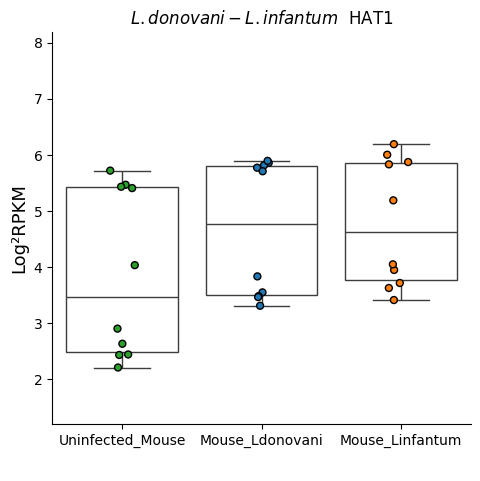

carregando


<Figure size 1000x800 with 0 Axes>

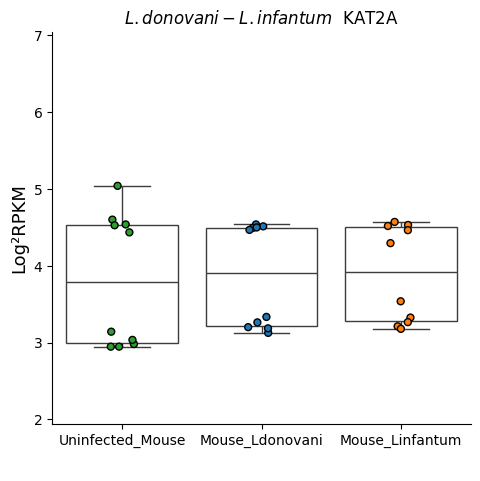

carregando


<Figure size 1000x800 with 0 Axes>

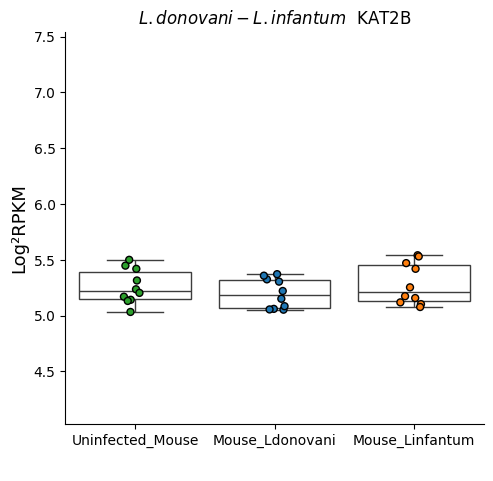

carregando


<Figure size 1000x800 with 0 Axes>

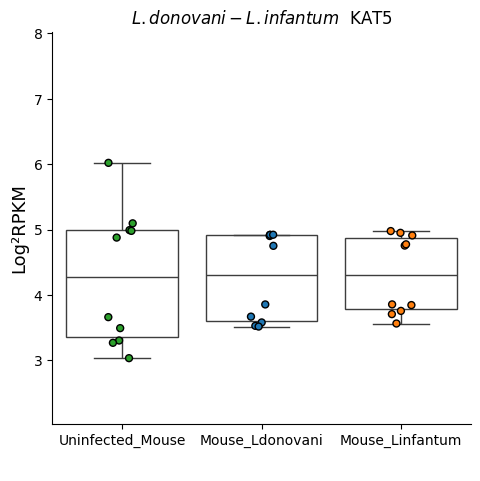

carregando


<Figure size 1000x800 with 0 Axes>

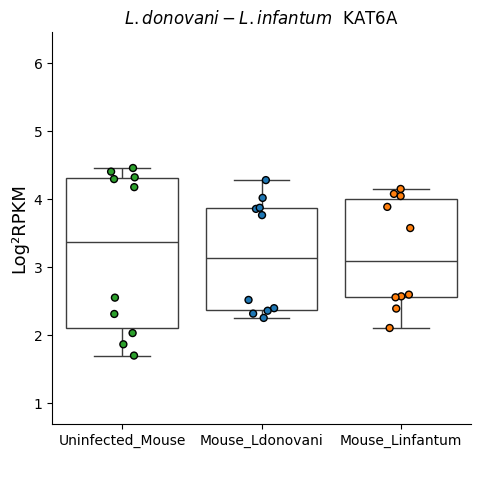

carregando


<Figure size 1000x800 with 0 Axes>

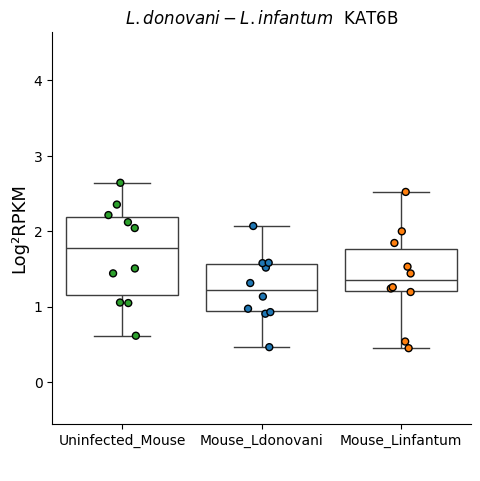

carregando


<Figure size 1000x800 with 0 Axes>

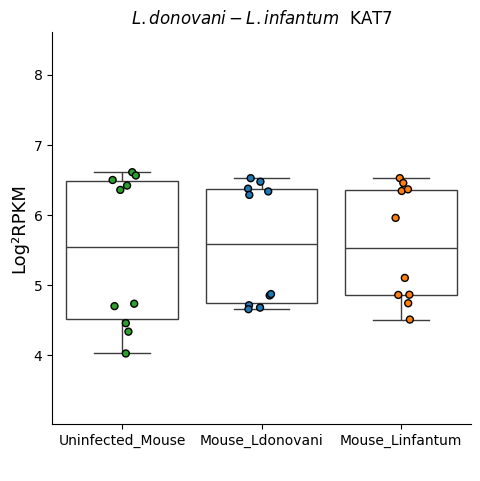

carregando


<Figure size 1000x800 with 0 Axes>

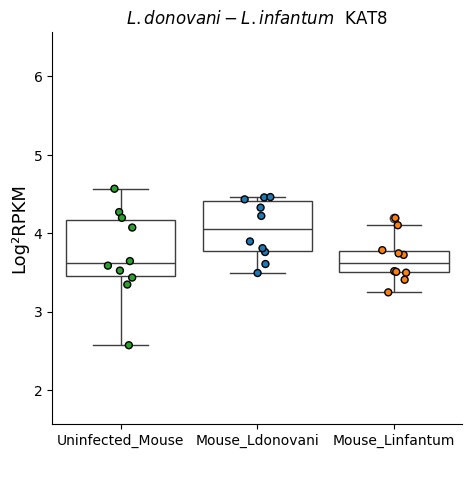

carregando


<Figure size 1000x800 with 0 Axes>

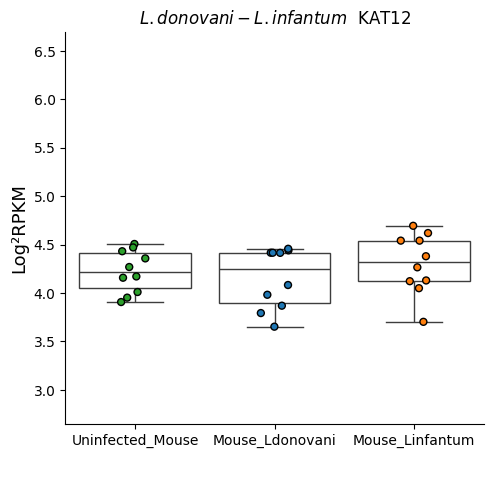

carregando


<Figure size 1000x800 with 0 Axes>

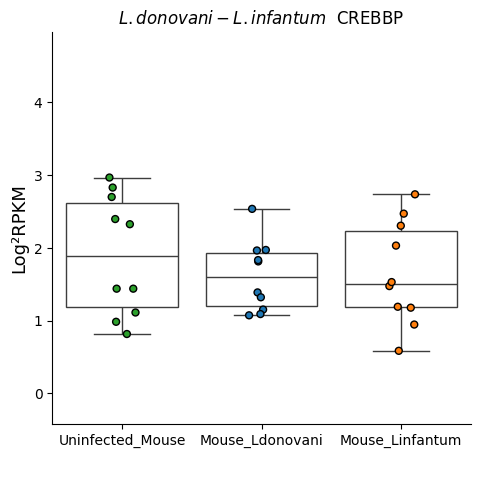

carregando


<Figure size 1000x800 with 0 Axes>

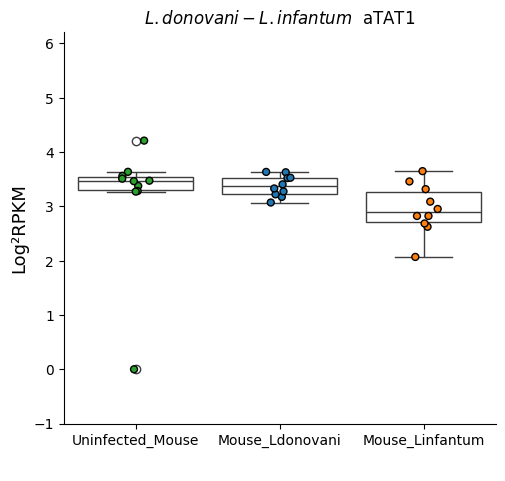

carregando


<Figure size 1000x800 with 0 Axes>

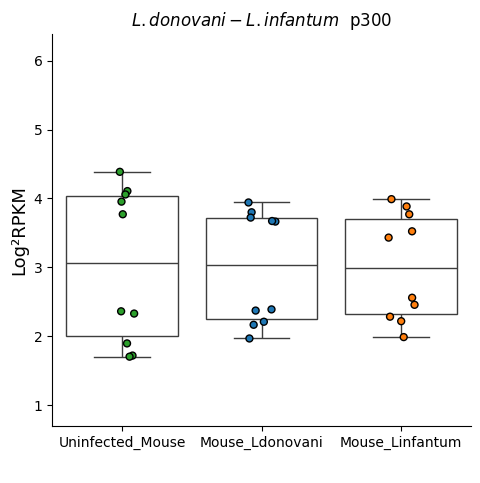

carregando


<Figure size 1000x800 with 0 Axes>

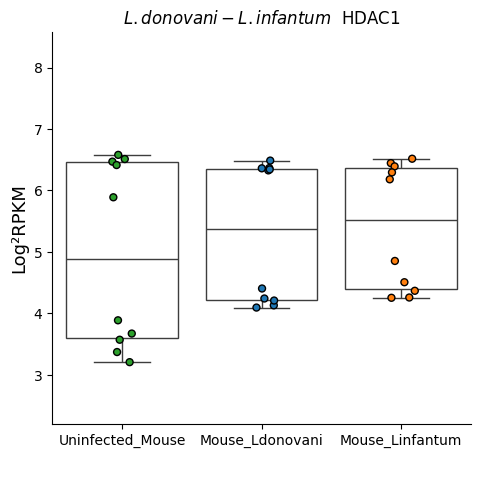

carregando


<Figure size 1000x800 with 0 Axes>

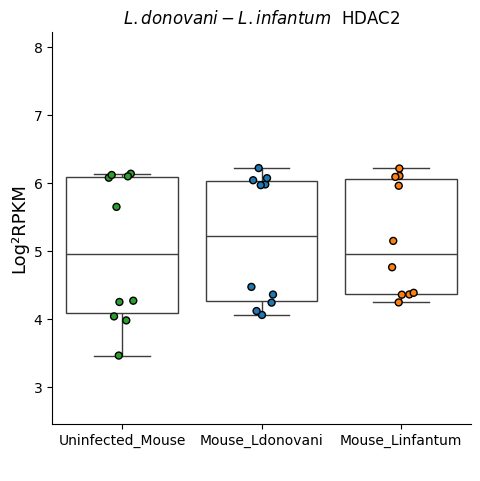

carregando


<Figure size 1000x800 with 0 Axes>

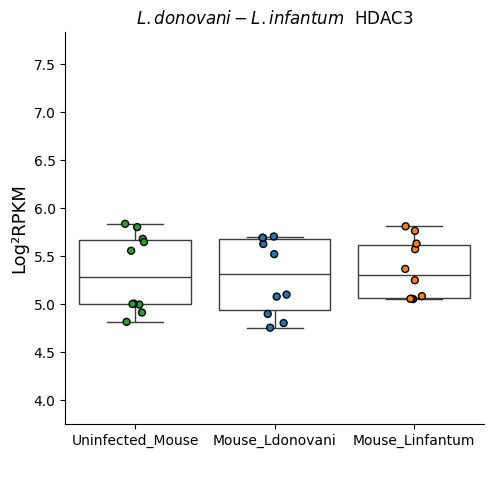

carregando


<Figure size 1000x800 with 0 Axes>

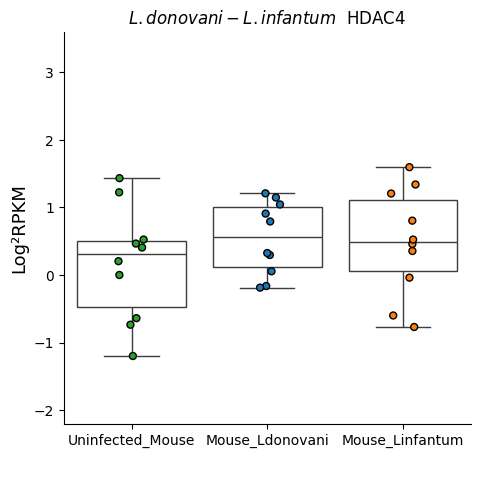

carregando


<Figure size 1000x800 with 0 Axes>

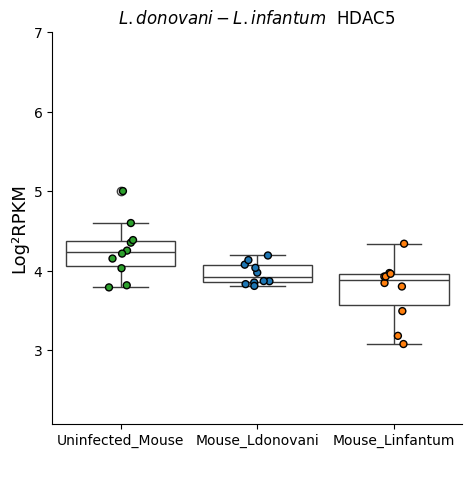

carregando


<Figure size 1000x800 with 0 Axes>

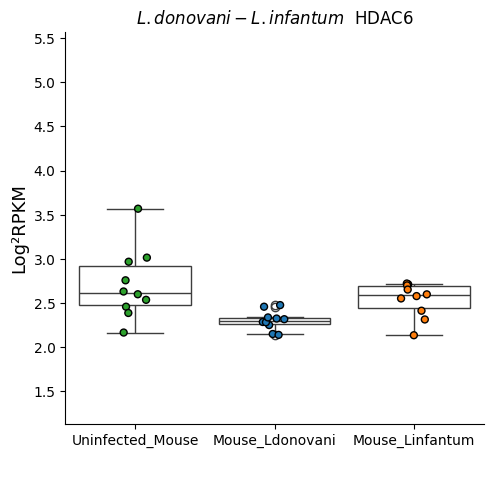

carregando


<Figure size 1000x800 with 0 Axes>

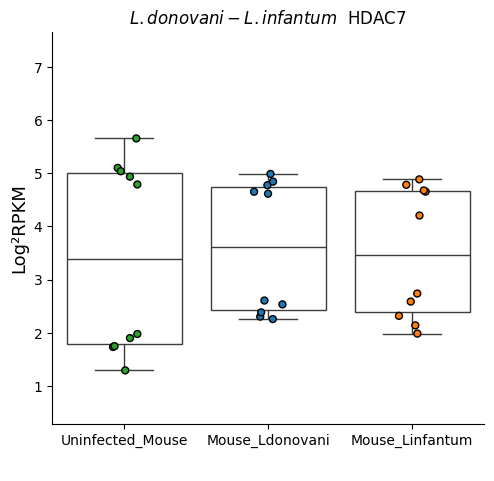

carregando


<Figure size 1000x800 with 0 Axes>

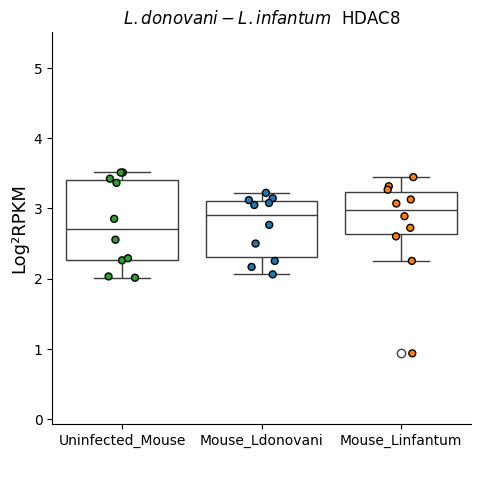

carregando


<Figure size 1000x800 with 0 Axes>

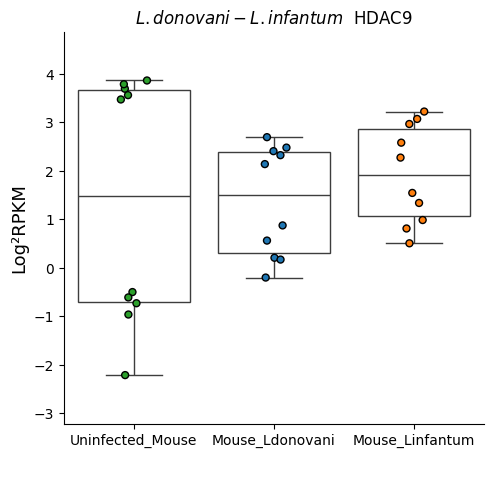

carregando


<Figure size 1000x800 with 0 Axes>

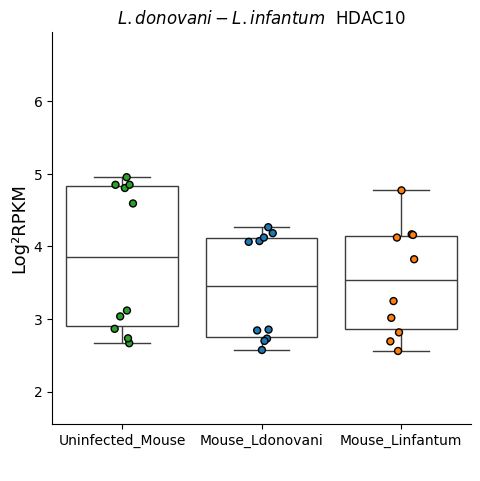

carregando


<Figure size 1000x800 with 0 Axes>

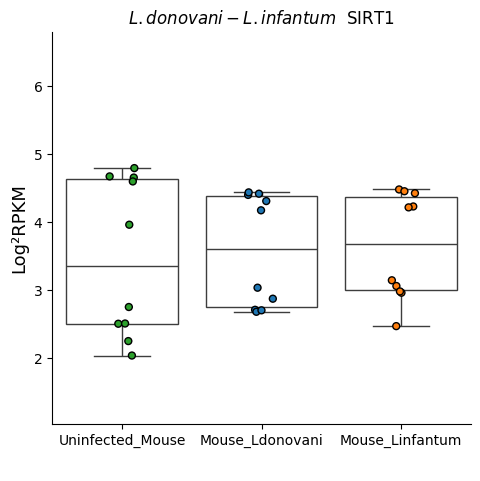

carregando


<Figure size 1000x800 with 0 Axes>

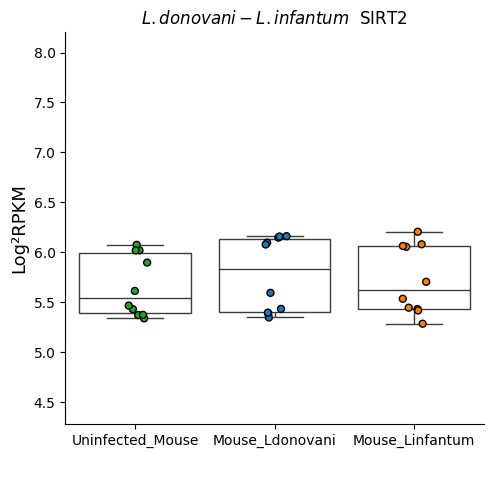

carregando


<Figure size 1000x800 with 0 Axes>

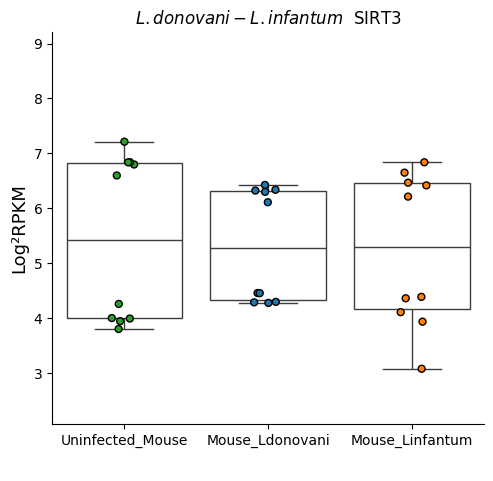

carregando


<Figure size 1000x800 with 0 Axes>

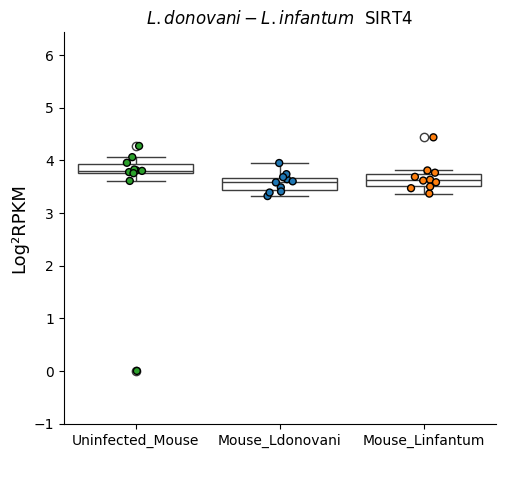

carregando


<Figure size 1000x800 with 0 Axes>

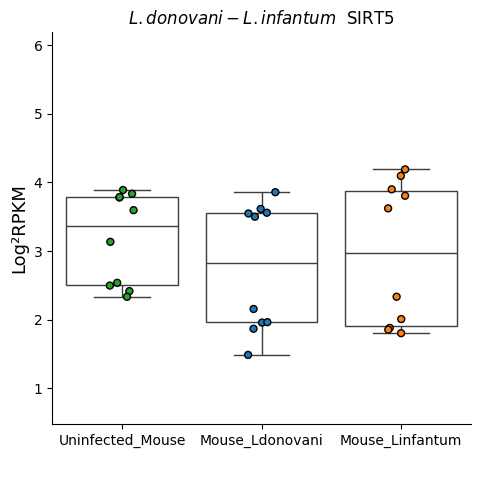

carregando


<Figure size 1000x800 with 0 Axes>

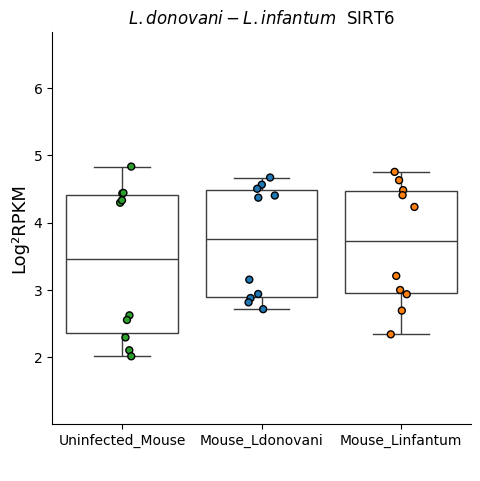

carregando


<Figure size 1000x800 with 0 Axes>

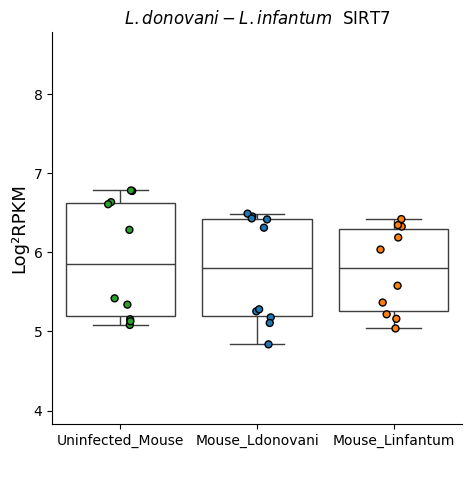

carregando


In [ ]:
graficos_boxplot(PRJNA601732_df_filtrado, "BuGn", "L. donovani-L. infantum", ["Uninfected_Mouse", "Mouse_Ldonovani" ,'Mouse_Linfantum'])
#,)

##PRJNA633893  

##PRJNA656921  

##PRJNA838552  

##SRP009251  

##SRP069976

In [ ]:
SRP069976_tab = pd.read_excel(SRP069976 )
SRP069976_tab.head()

Nome  Health_10_SRR3162851  Health_1_SRR3162842  Health_2_SRR3162843  \
0  YTHDF1              5.405853             4.637366             4.860832   
1  YTHDF2              5.678406             5.521820             5.459031   
2  YTHDF3              5.352834             5.524650             5.349187   
3  YTHDC1             -3.407287             0.000000             0.000000   
4     FTO              4.949613             4.599300             5.517500   

   Health_3_SRR3162844  Health_4_SRR3162845  Health_5_SRR3162846  \
0             5.050745             4.962156             5.012771   
1             5.488752             5.362402             5.402450   
2             5.503833             5.476837             5.195135   
3            -3.502692            -2.899596            -5.688233   
4             5.107449             5.096880             5.430893   

   Health_6_SRR3162847  Health_7_SRR3162848  Health_8_SRR3162849  ...  \
0             4.850772             5.151217             5.031150  ...   
1             5.365123             5.510235             5.246922  ...   
2             5.232614             5.713141             5.260285  ...   
3            -3.331512            -3.655954            -2.858675  ...   
4             5.094156             5.178486             5.218154  ...   

   Lama_Late_Infection_17_SRR3162871  Lama_Late_Infection_1_SRR3162860  \
0                           5.251087                          4.937038   
1                           5.503342                          5.297359   
2                           5.588969                          5.188145   
3                          -4.267487                         -6.812706   
4                           4.801119                          4.887021   

   Lama_Late_Infection_2_SRR3162861  Lama_Late_Infection_3_SRR3162862  \
0                          5.088797                          4.835171   
1                          5.573963                          5.428449   
2                          5.418797                          5.460030   
3                         -5.276504                         -5.214587   
4                          4.469078                          4.574657   

   Lama_Late_Infection_4_SRR3162863  Lama_Late_Infection_5_SRR3162864  \
0                          4.652830                          4.571949   
1                          5.689118                          5.355364   
2                          5.707464                          5.191679   
3                         -4.871189                         -3.896146   
4                          4.380398                          4.345646   

   Lama_Late_Infection_6_SRR3162865  Lama_Late_Infection_7_SRR3162866  \
0                          4.990859                          5.159428   
1                          5.551884                          5.583155   
2                          5.400393                          5.733605   
3                         -4.235023                         -3.391789   
4                          5.045333                          5.022432   

   Lama_Late_Infection_8_SRR3162867  Lama_Late_Infection_9_SRR3162868  
0                          5.107759                          5.122698  
1                          5.532676                          5.381121  
2                          5.705362                          5.493204  
3                         -4.095181                         -4.296377  
4                          4.380905                          4.647120  

[5 rows x 42 columns]

In [ ]:
# Lista de genes desejados
genes_desejados = ['HAT1','KAT2A','KAT2B','KAT5','KAT6A','KAT6B','KAT7','KAT8','KAT12',
'CREBBP','aTAT1','p300','HDAC1','HDAC2','HDAC3','HDAC4','HDAC5','HDAC6','HDAC7',
'HDAC8','HDAC9','HDAC10','SIRT1','SIRT2','SIRT3','SIRT4','SIRT5','SIRT6','SIRT7'
]

# Filtrando o DataFrame para manter apenas as linhas com genes desejados na coluna "nome"
SRP069976_df_filtrado = SRP069976_tab[SRP069976_tab['Nome'].isin(genes_desejados)]
# # Visualizando o DataFrame filtrado
SRP069976_df_filtrado.index = SRP069976_df_filtrado["Nome"]


In [ ]:
SRP069976_df_filtrado = SRP069976_df_filtrado.T

In [ ]:
SRP069976_df_filtrado = SRP069976_df_filtrado.iloc[1:]

In [ ]:
SRP069976_df_filtrado.index.to_list()

['Health_10_SRR3162851',
 'Health_1_SRR3162842',
 'Health_2_SRR3162843',
 'Health_3_SRR3162844',
 'Health_4_SRR3162845',
 'Health_5_SRR3162846',
 'Health_6_SRR3162847',
 'Health_7_SRR3162848',
 'Health_8_SRR3162849',
 'Health_9_SRR3162850',
 'Lama_Chronic_Infection_1_SRR7275002',
 'Lama_Chronic_Infection_2_SRR7275003',
 'Lama_Chronic_Infection_3_SRR7275004',
 'Lama_Chronic_Infection_4_SRR7275005',
 'Lama_Chronic_Infection_5_SRR7275006',
 'Lama_Chronic_Infection_6_SRR7275007',
 'Lama_Early_Infection_1_SRR3162852',
 'Lama_Early_Infection_2_SRR3162853',
 'Lama_Early_Infection_3_SRR3162854',
 'Lama_Early_Infection_4_SRR3162855',
 'Lama_Early_Infection_5_SRR3162856',
 'Lama_Early_Infection_6_SRR3162857',
 'Lama_Early_Infection_7_SRR3162858',
 'Lama_Early_Infection_8_SRR3162859',
 'Lama_Late_Infection_10_SRR3162869',
 'Lama_Late_Infection_11_SRR3162870',
 'Lama_Late_Infection_12_SRR3162872',
 'Lama_Late_Infection_13_SRR3162873',
 'Lama_Late_Infection_14_SRR3162874',
 'Lama_Late_Infection_15_

In [ ]:
SRP069976_df_filtrado["Status"] =['Health',
 'Health',
 'Health',
 'Health',
 'Health',
 'Health',
 'Health',
 'Health',
 'Health',
 'Health',
 'Chronic_Infection',
 'Chronic_Infection',
 'Chronic_Infection',
 'Chronic_Infection',
 'Chronic_Infection',
 'Chronic_Infection',
 'Early_Infection',
 'Early_Infection',
 'Early_Infection',
 'Early_Infection',
 'Early_Infection',
 'Early_Infection',
 'Early_Infection',
 'Early_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection',
 'Late_Infection']
set(SRP069976_df_filtrado["Status"])

{'Chronic_Infection', 'Early_Infection', 'Health', 'Late_Infection'}

In [ ]:
SRP069976_df_filtrado.iloc[[1,-1],:]

Nome                                  HAT1     KAT2A     KAT2B      KAT5  \
Health_1_SRR3162842                5.10217  2.433366  3.615024  3.565441   
Lama_Late_Infection_9_SRR3162868  5.426726  3.534034  4.517674  3.956484   

Nome                                 KAT6A     KAT6B      KAT7      KAT8  \
Health_1_SRR3162842               3.216639  1.171776  4.189976  3.110506   
Lama_Late_Infection_9_SRR3162868   4.18923  2.546364  4.700208  4.017245   

Nome                                 KAT12    CREBBP  ...     HDAC9    HDAC10  \
Health_1_SRR3162842               3.526485  2.932718  ...  0.188357  1.434227   
Lama_Late_Infection_9_SRR3162868  3.026515  4.017946  ...  1.803374  4.027971   

Nome                                 SIRT1     SIRT2     SIRT3     SIRT4  \
Health_1_SRR3162842               3.057556  5.980107  2.404101  0.758665   
Lama_Late_Infection_9_SRR3162868  3.578609  5.329283  3.519429  -2.08779   

Nome                                 SIRT5     SIRT6     SIRT7          Status  
Health_1_SRR3162842                3.77957  3.444883  3.395515          Health  
Lama_Late_Infection_9_SRR3162868  3.092535  3.755831  4.757731  Late_Infection  

[2 rows x 30 columns]

In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
  sns.set_theme(style="ticks", font_scale=0.8)
  sns.set_style("whitegrid")
  for i in tabela:
    if "Status" in i: continue

    plt.figure(figsize=(4,8));
    graficos=sns.catplot(data=tabela,x="Status",y=i,kind="strip",palette=paleta, size=5 ,edgecolor='black',linewidth=1,hue="Status",order=ordem);
    graficos=sns.boxplot(data = tabela,x="Status", y = i, showcaps=True,boxprops={'facecolor':'None'},showfliers=True,whiskerprops={'linewidth':1},hue="Status", order=ordem)
    plt.xticks(rotation=0)
    # graficos.set_axis_labels("Time", "Log²RPKM")

    plt.ylim(min(tabela[i])-1,max(tabela[i])+1)
    if max(tabela[i])-min(tabela[i])<5:
        plt.ylim(min(tabela[i])-1,max(tabela[i])+2)
    titulo = plt.gcf().suptitle(f'${especie}$  '+i, fontsize=14)
    titulo.set_y(1.05)
    graficos = plt.xlabel(' ', fontdict={'size': 13});
    graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});
    # plt.savefig(f"{caminho}/{i}.png",dpi=200, format='png')
    plt.savefig(f"/content/drive/MyDrive/Laboratory/Alunos/Cadu/img/SRP069976/{especie}{i}.png",dpi=200, format='png')

    plt.show(graficos)
    print("carregando")
    # break


In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
    for i in tabela:
        if "Status" in i:
            continue

        plt.figure(figsize=(12, 8))  # Aumentando o tamanho da figura

        ax = sns.catplot(data=tabela, x="Status", y=i, kind="strip", size=5, edgecolor='black',
                         linewidth=1, hue="Status", order=ordem)

        sns.boxplot(data=tabela, x="Status", y=i, showcaps=True, boxprops={'facecolor': 'None'},
                    showfliers=True, whiskerprops={'linewidth': 1}, hue="Status", order=ordem)

        plt.xticks(rotation=45, ha="right")

        plt.ylim(min(tabela[i]) - 1, max(tabela[i]) + 1)

        if max(tabela[i]) - min(tabela[i]) < 5:
            plt.ylim(min(tabela[i]) - 1, max(tabela[i]) + 2)

        # Ajustando o título para evitar cortes
        ax.set(title=f'${especie}$  ' + i)
        ax.fig.subplots_adjust(top=0.9)  # Ajustando a posição vertical do título
        plt.subplots_adjust(bottom=0.25)

        plt.xlabel(' ', fontdict={'size': 13})
        plt.ylabel('Log²RPKM', fontdict={'size': 13})

        plt.savefig(f"/content/drive/MyDrive/Laboratory/Alunos/Cadu/img/SRP069976/{especie}_{i}.png",dpi=200, format='png')

        plt.show()

        print("carregando")



<Figure size 1200x800 with 0 Axes>

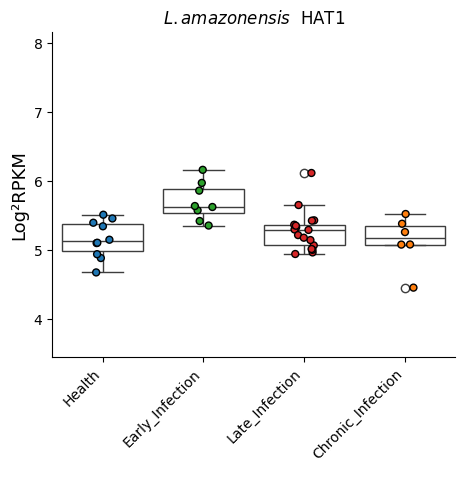

carregando


<Figure size 1200x800 with 0 Axes>

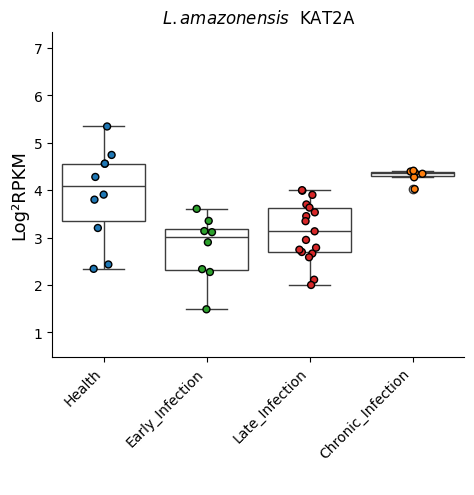

carregando


<Figure size 1200x800 with 0 Axes>

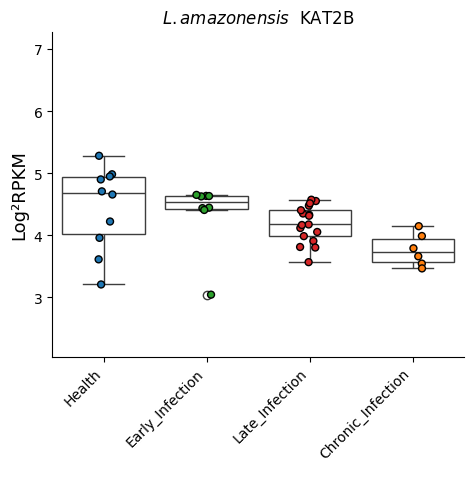

carregando


<Figure size 1200x800 with 0 Axes>

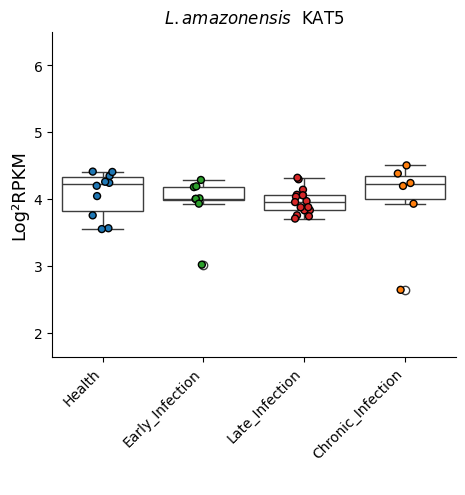

carregando


<Figure size 1200x800 with 0 Axes>

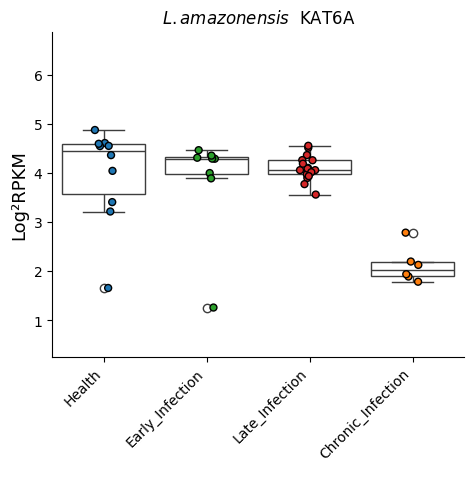

carregando


<Figure size 1200x800 with 0 Axes>

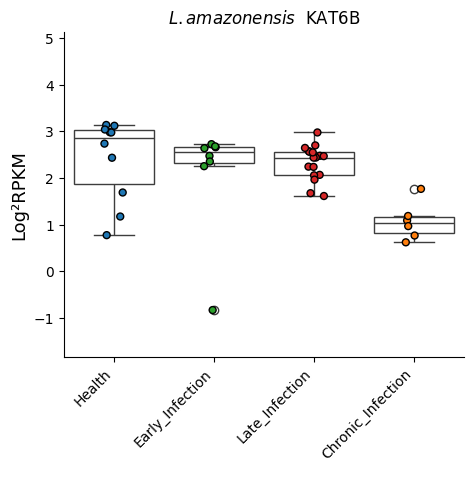

carregando


<Figure size 1200x800 with 0 Axes>

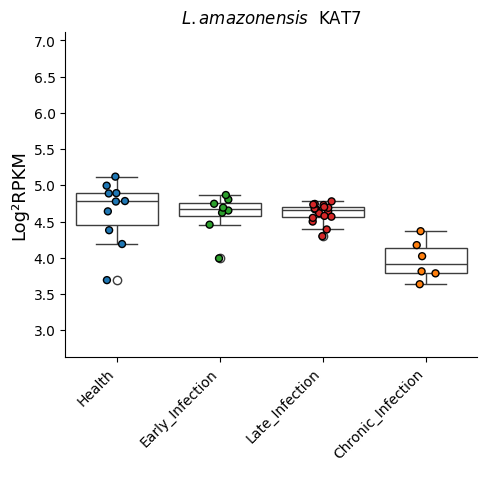

carregando


<Figure size 1200x800 with 0 Axes>

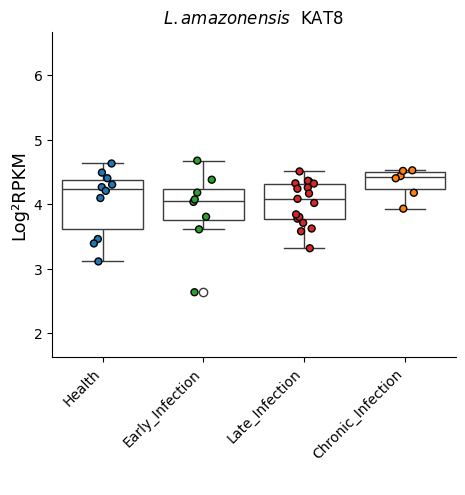

carregando


<Figure size 1200x800 with 0 Axes>

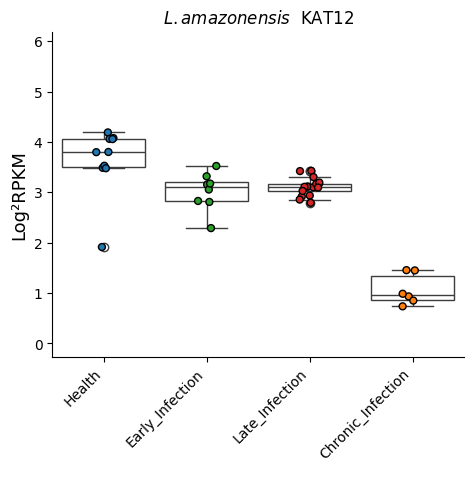

carregando


<Figure size 1200x800 with 0 Axes>

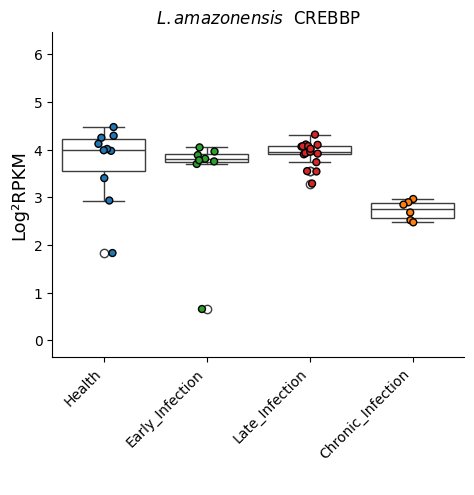

carregando


<Figure size 1200x800 with 0 Axes>

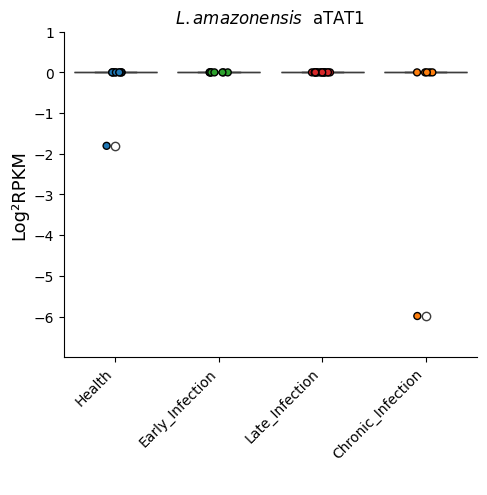

carregando


<Figure size 1200x800 with 0 Axes>

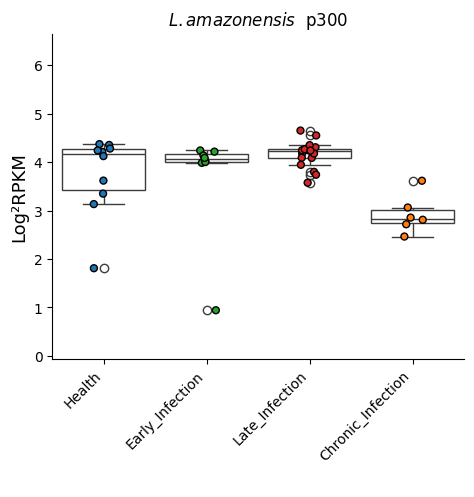

carregando


<Figure size 1200x800 with 0 Axes>

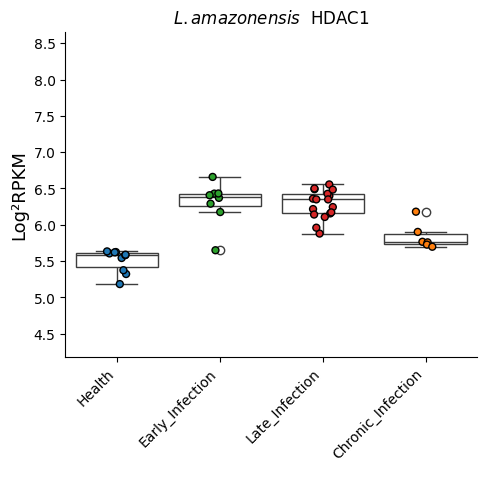

carregando


<Figure size 1200x800 with 0 Axes>

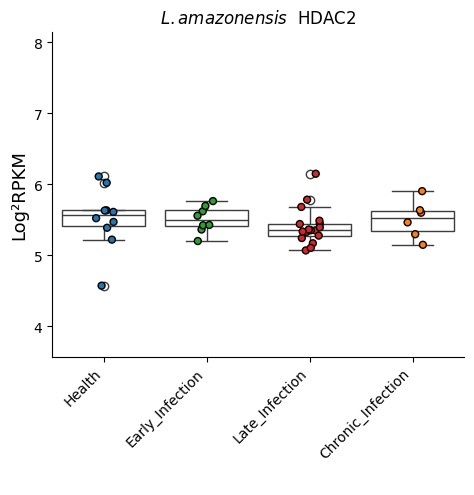

carregando


<Figure size 1200x800 with 0 Axes>

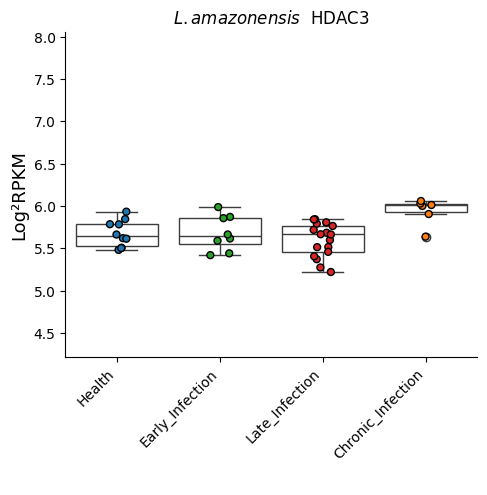

carregando


<Figure size 1200x800 with 0 Axes>

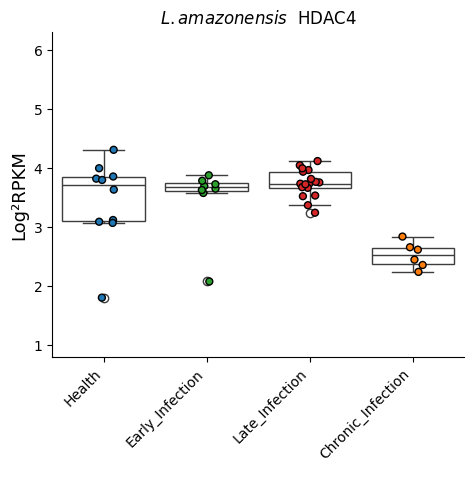

carregando


<Figure size 1200x800 with 0 Axes>

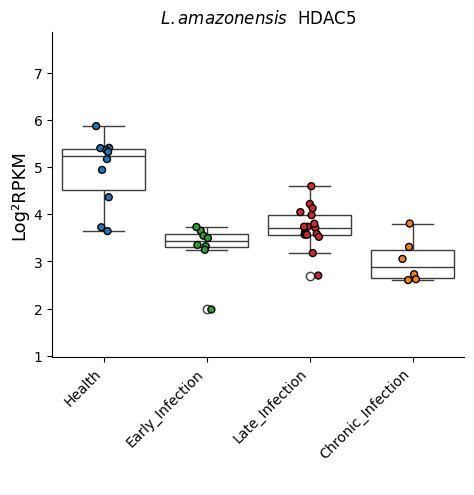

carregando


<Figure size 1200x800 with 0 Axes>

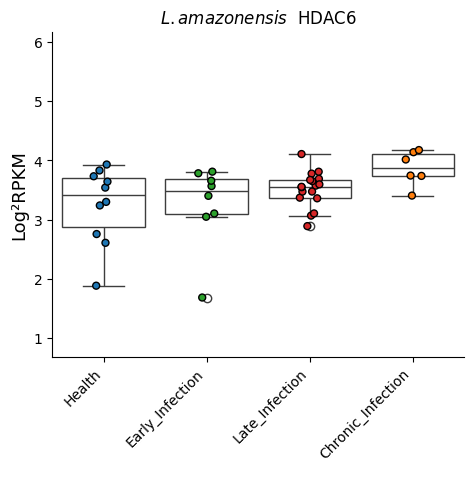

carregando


<Figure size 1200x800 with 0 Axes>

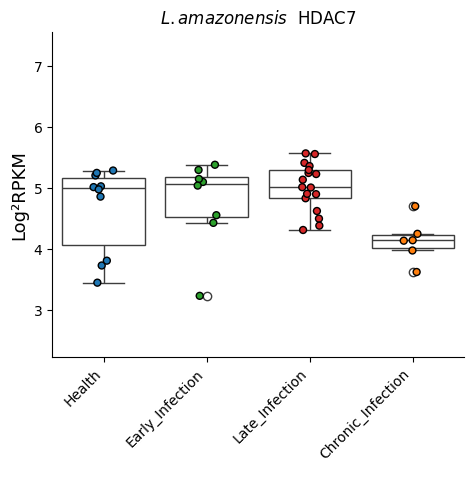

carregando


<Figure size 1200x800 with 0 Axes>

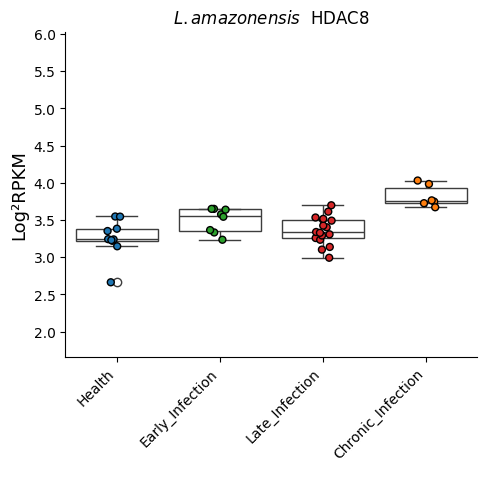

carregando


<Figure size 1200x800 with 0 Axes>

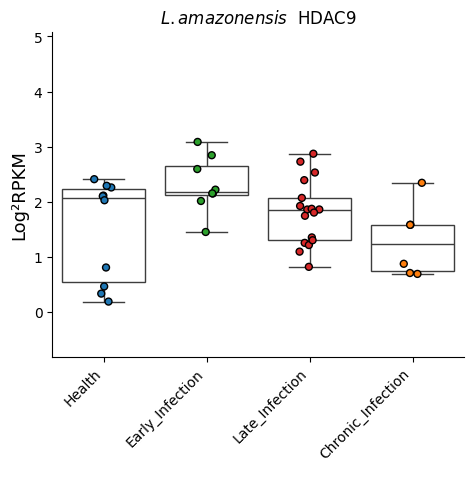

carregando


<Figure size 1200x800 with 0 Axes>

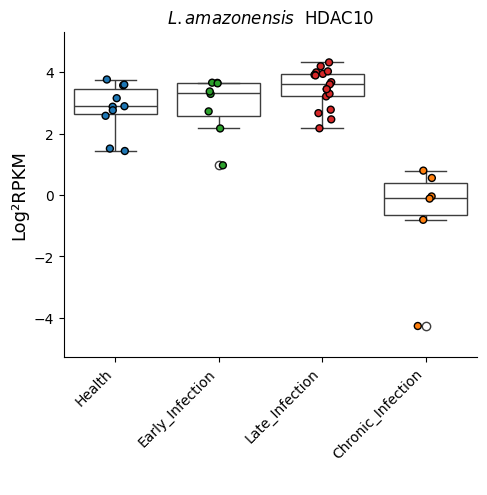

carregando


<Figure size 1200x800 with 0 Axes>

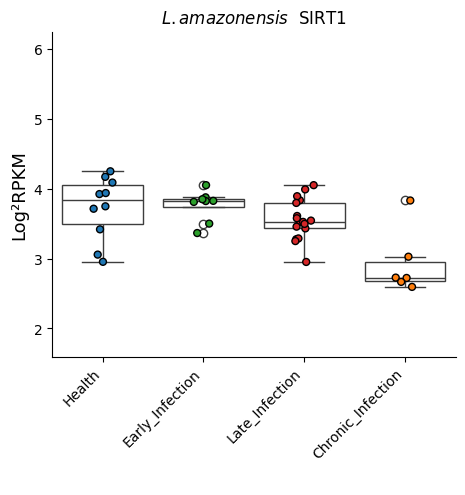

carregando


<Figure size 1200x800 with 0 Axes>

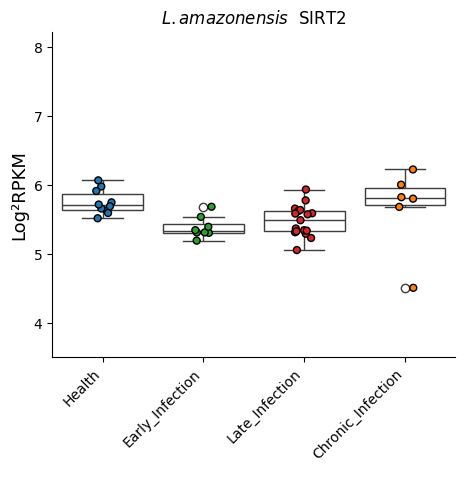

carregando


<Figure size 1200x800 with 0 Axes>

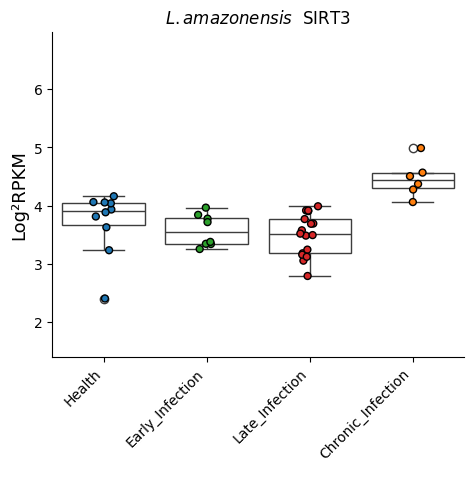

carregando


<Figure size 1200x800 with 0 Axes>

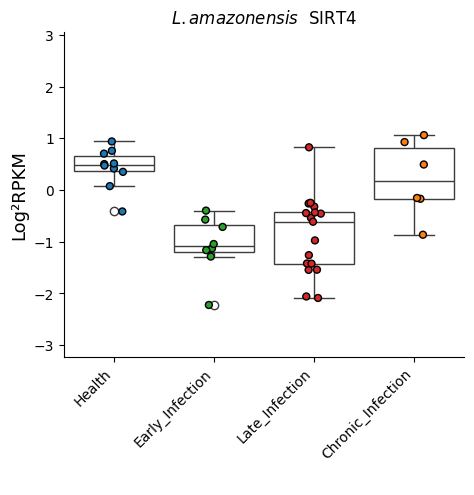

carregando


<Figure size 1200x800 with 0 Axes>

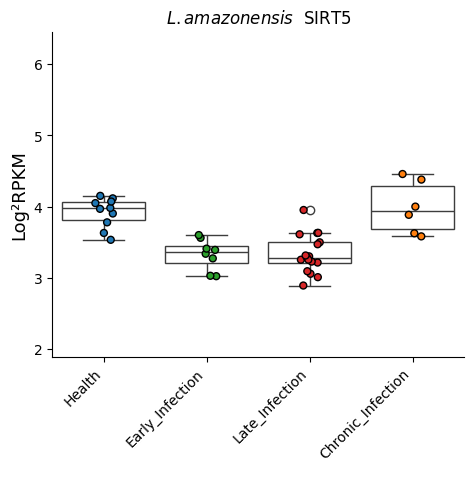

carregando


<Figure size 1200x800 with 0 Axes>

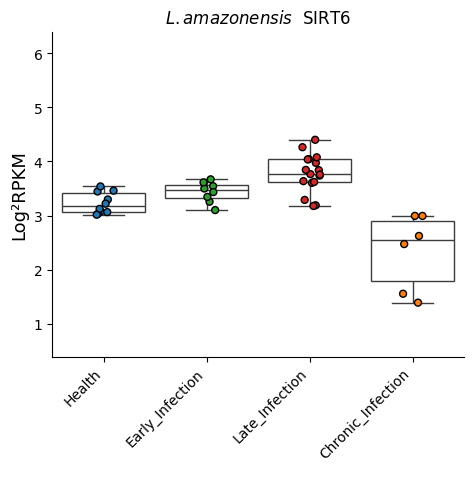

carregando


<Figure size 1200x800 with 0 Axes>

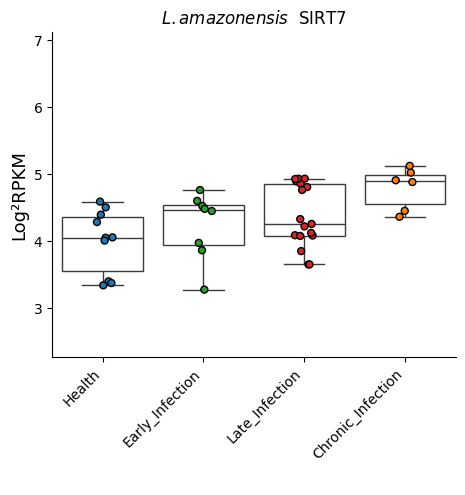

carregando


In [ ]:
graficos_boxplot(SRP069976_df_filtrado, "CMRmap", "L. amazonensis", ['Health', 'Early_Infection', 'Late_Infection','Chronic_Infection'])


##SRP377060

#M_tuberculosis

##SRP151491

In [ ]:
SRP151491_tab = pd.read_excel(SRP151491 )
SRP151491_tab.head()

Nome  Mo_Alveolar_Infected_1_SRR8556403  \
0   YTHDF 1                           3.261130   
1   YTHDF 2                           5.687368   
2  YTHDF 3                            4.355895   
3   YTHDC 1                           2.547028   
4       FTO                           5.460901   

   Mo_Alveolar_Infected_2_SRR8556404  Mo_Alveolar_Infected_3_SRR8556405  \
0                           5.111286                           5.104322   
1                           6.211556                           5.864810   
2                           6.005562                           5.688067   
3                           4.376343                           4.280942   
4                           6.128543                           5.798674   

   Mo_Alveolar_Infected_4_SRR8556406  Mo_Alveolar_Infected_5_SRR8556407  \
0                           5.056472                           5.118850   
1                           6.084114                           6.134215   
2                           5.873554                           5.929676   
3                           4.523190                           4.650608   
4                           5.903565                           5.695657   

   Mo_Alveolar_Infected_6_SRR8556408  Mo_Alveolar_Uninfected_1_SRR8556397  \
0                           5.036741                             5.132645   
1                           5.840756                             5.684027   
2                           6.127916                             5.665462   
3                           4.600771                             4.007301   
4                           5.672839                             5.410704   

   Mo_Alveolar_Uninfected_2_SRR8556398  Mo_Alveolar_Uninfected_3_SRR8556399  \
0                             5.103061                             4.984566   
1                             5.720547                             5.534799   
2                             5.690040                             5.818186   
3                             4.185478                             4.063113   
4                             5.394094                             5.874755   

   Mo_Alveolar_Uninfected_4_SRR8556400  Mo_Alveolar_Uninfected_5_SRR8556401  \
0                             5.235855                             5.270335   
1                             5.835042                             5.733752   
2                             5.543708                             5.801842   
3                             4.494943                             4.284437   
4                             5.623551                             6.056509   

   Mo_Alveolar_Uninfected_6_SRR8556402  
0                             5.209164  
1                             5.701218  
2                             5.763488  
3                             4.260886  
4                             6.119527

In [ ]:
# Lista de genes desejados
genes_desejados = ['HAT1','KAT2A','KAT2B','KAT5','KAT6A','KAT6B','KAT7','KAT8','KAT12',
'CREBBP','aTAT1','p300','HDAC1','HDAC2','HDAC3','HDAC4','HDAC5','HDAC6','HDAC7',
'HDAC8','HDAC9','HDAC10','SIRT1','SIRT2','SIRT3','SIRT4','SIRT5','SIRT6','SIRT7'
]

# Filtrando o DataFrame para manter apenas as linhas com genes desejados na coluna "nome"
SRP151491_df_filtrado = SRP151491_tab[SRP151491_tab['Nome'].isin(genes_desejados)]
# # Visualizando o DataFrame filtrado
SRP151491_df_filtrado.index = SRP151491_df_filtrado["Nome"]


In [ ]:
SRP151491_df_filtrado = SRP151491_df_filtrado.T

In [ ]:
SRP151491_df_filtrado = SRP151491_df_filtrado.iloc[1:]

In [ ]:
SRP151491_df_filtrado.index.to_list()

['Mo_Alveolar_Infected_1_SRR8556403',
 'Mo_Alveolar_Infected_2_SRR8556404',
 'Mo_Alveolar_Infected_3_SRR8556405',
 'Mo_Alveolar_Infected_4_SRR8556406',
 'Mo_Alveolar_Infected_5_SRR8556407',
 'Mo_Alveolar_Infected_6_SRR8556408',
 'Mo_Alveolar_Uninfected_1_SRR8556397',
 'Mo_Alveolar_Uninfected_2_SRR8556398',
 'Mo_Alveolar_Uninfected_3_SRR8556399',
 'Mo_Alveolar_Uninfected_4_SRR8556400',
 'Mo_Alveolar_Uninfected_5_SRR8556401',
 'Mo_Alveolar_Uninfected_6_SRR8556402']

In [ ]:
SRP151491_df_filtrado["Status"] =['Mo_Infected',
 'Mo_Infected',
 'Mo_Infected',
 'Mo_Infected',
 'Mo_Infected',
 'Mo_Infected',
 'Mo_Uninfected',
 'Mo_Uninfected',
 'Mo_Uninfected',
 'Mo_Uninfected',
 'Mo_Uninfected',
 'Mo_Uninfected']

In [ ]:
SRP151491_df_filtrado

Nome                                     HAT1     KAT2A     KAT2B      KAT5  \
Mo_Alveolar_Infected_1_SRR8556403    6.042015  2.958925  0.995703   6.61349   
Mo_Alveolar_Infected_2_SRR8556404    5.570299  4.485743  1.136887  5.397437   
Mo_Alveolar_Infected_3_SRR8556405    5.704972  4.039856  0.858485  5.257084   
Mo_Alveolar_Infected_4_SRR8556406    5.788226  4.239809  1.658749  5.388993   
Mo_Alveolar_Infected_5_SRR8556407    5.812197  4.064553  1.140745  5.196758   
Mo_Alveolar_Infected_6_SRR8556408    5.695618  3.601956 -0.250897  5.539786   
Mo_Alveolar_Uninfected_1_SRR8556397  5.728728  4.223611  1.463467  5.153676   
Mo_Alveolar_Uninfected_2_SRR8556398  5.966348  3.917381  1.018285  5.229517   
Mo_Alveolar_Uninfected_3_SRR8556399  5.699452  4.323498  1.855886  5.155501   
Mo_Alveolar_Uninfected_4_SRR8556400  5.334224  4.514275   1.30459  5.381895   
Mo_Alveolar_Uninfected_5_SRR8556401  5.357108  4.687313  1.431836  5.199162   
Mo_Alveolar_Uninfected_6_SRR8556402    5.2639  4.475519  1.476917  5.178282   

Nome                                    KAT6A     KAT6B      KAT7      KAT8  \
Mo_Alveolar_Infected_1_SRR8556403   -0.442276  -1.17663  4.825846  3.912961   
Mo_Alveolar_Infected_2_SRR8556404    1.408374  0.252679  6.866865  3.664311   
Mo_Alveolar_Infected_3_SRR8556405    0.472288 -0.191677  6.740639   3.75261   
Mo_Alveolar_Infected_4_SRR8556406    0.887292  0.510116  6.575636  3.591037   
Mo_Alveolar_Infected_5_SRR8556407    0.513668 -0.394812  6.676543  3.735333   
Mo_Alveolar_Infected_6_SRR8556408    0.247058 -0.185582  6.424386  3.441694   
Mo_Alveolar_Uninfected_1_SRR8556397  0.948947  1.258015  6.547475  3.440469   
Mo_Alveolar_Uninfected_2_SRR8556398   0.17044  0.813903  6.528116  3.585518   
Mo_Alveolar_Uninfected_3_SRR8556399  1.426821   0.85878  6.491342  3.690641   
Mo_Alveolar_Uninfected_4_SRR8556400  1.018483  0.357237  6.741012   4.05169   
Mo_Alveolar_Uninfected_5_SRR8556401   0.77878  0.863574  6.752865  3.881979   
Mo_Alveolar_Uninfected_6_SRR8556402  1.223231  0.787867  6.646429  3.979179   

Nome                                    KAT12    CREBBP  ...     HDAC9  \
Mo_Alveolar_Infected_1_SRR8556403    1.775456  0.054597  ... -1.193902   
Mo_Alveolar_Infected_2_SRR8556404    3.443078  1.484671  ...  1.990204   
Mo_Alveolar_Infected_3_SRR8556405    3.770896  0.877925  ...  1.934158   
Mo_Alveolar_Infected_4_SRR8556406    3.107583  1.343578  ...  1.934588   
Mo_Alveolar_Infected_5_SRR8556407    2.905753  0.992968  ...  1.632486   
Mo_Alveolar_Infected_6_SRR8556408    3.025422  0.385334  ...  2.055219   
Mo_Alveolar_Uninfected_1_SRR8556397  2.960476  1.074344  ...  1.270335   
Mo_Alveolar_Uninfected_2_SRR8556398  2.846519  0.747756  ...  1.747391   
Mo_Alveolar_Uninfected_3_SRR8556399  3.415381  1.912469  ...  1.921409   
Mo_Alveolar_Uninfected_4_SRR8556400  3.377818  1.799798  ...  1.077332   
Mo_Alveolar_Uninfected_5_SRR8556401  3.550052  1.918506  ...  1.044209   
Mo_Alveolar_Uninfected_6_SRR8556402  3.450418  1.839487  ...  1.313789   

Nome                                   HDAC10     SIRT1     SIRT2     SIRT3  \
Mo_Alveolar_Infected_1_SRR8556403    0.023228 -0.315075  7.678887  5.843186   
Mo_Alveolar_Infected_2_SRR8556404    1.115793  3.154771  6.965179  4.637341   
Mo_Alveolar_Infected_3_SRR8556405    1.254963  3.390049  7.015621  4.026516   
Mo_Alveolar_Infected_4_SRR8556406    1.226239  3.025195   6.96137  4.647248   
Mo_Alveolar_Infected_5_SRR8556407    0.881875  3.329803    7.0762  4.532508   
Mo_Alveolar_Infected_6_SRR8556408   -0.311768  3.054327   7.12016  3.810218   
Mo_Alveolar_Uninfected_1_SRR8556397  1.861777  3.027468  7.078086  5.095316   
Mo_Alveolar_Uninfected_2_SRR8556398  1.345323  2.698132  6.908658  4.783925   
Mo_Alveolar_Uninfected_3_SRR8556399  1.436645  3.063203  6.962084  4.755819   
Mo_Alveolar_Uninfected_4_SRR8556400  1.944243  3.234247  6.914875  4.796824   
Mo_Alveolar_Uninfected_5_SRR8556401  2.032048  3.118699  6.917377  4.746606   
Mo_Alveolar_Uninfected_6_SRR85564

In [ ]:
# Filtrando as linhas para Uninfected_Mouse e Infected_Mouse_Linfantum
# subset_PRJNA601732_df_Linfantum = PRJNA601732_df_filtrado[(PRJNA601732_df_filtrado['Status'] == 'Uninfected_Mouse') | (PRJNA601732_df_filtrado['Status'] == 'Mouse_Linfantum')]
# subset_PRJNA601732_df_Linfantum.iloc[[1,-1],:]

In [ ]:
# Filtrando as linhas para Infected_Mouse_Ldonovani e Infected_Mouse_Linfantum
# subset_PRJNA601732_df_Ldonovani = PRJNA601732_df_filtrado[(PRJNA601732_df_filtrado['Status'] == 'Mouse_Ldonovani') | (PRJNA601732_df_filtrado['Status'] == 'Infected_Mouse_Linfantum')]
# subset_PRJNA601732_df_Ldonovani.iloc[[1,-1],:]

In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
  for i in tabela:
    if "Status" in i: continue

    plt.figure(figsize=(4,8));
    graficos=sns.catplot(data=tabela,x="Status",y=i,kind="strip", size=5 ,edgecolor='black',linewidth=1,hue="Status",order=ordem);
    graficos=sns.boxplot(data = tabela,x="Status", y = i, showcaps=True,boxprops={'facecolor':'None'},showfliers=True,whiskerprops={'linewidth':1},hue="Status", order=ordem)
    plt.xticks(rotation=0)
    # graficos.set_axis_labels("Time", "Log²RPKM")

    plt.ylim(min(tabela[i])-1,max(tabela[i])+1)
    titulo = plt.gcf().suptitle(f'${especie}$  '+i, fontsize=14)
    if max(tabela[i])-min(tabela[i])<5:
        plt.ylim(min(tabela[i])-1,max(tabela[i])+2)
    titulo.set_y(1.05)
    graficos = plt.xlabel(' ', fontdict={'size': 13});
    graficos = plt.ylabel('Log²RPKM', fontdict={'size': 13});
    # plt.savefig(f"{caminho}/{i}.png",dpi=200, format='png')

    plt.savefig(f"/content/drive/MyDrive/Laboratory/Alunos/Cadu/img/SRP151491/{especie}{i}.png",dpi=200, format='png')

    plt.show(graficos)
    print("carregando")
    # break


In [ ]:
def graficos_boxplot(tabela, paleta, especie, ordem, caminho="aqui"):
    for i in tabela:
        if "Status" in i:
            continue

        plt.figure(figsize=(10, 8))  # Aumentando o tamanho da figura

        ax = sns.catplot(data=tabela, x="Status", y=i, kind="strip", size=5, edgecolor='black',
                         linewidth=1, hue="Status", order=ordem)

        sns.boxplot(data=tabela, x="Status", y=i, showcaps=True, boxprops={'facecolor': 'None'},
                    showfliers=True, whiskerprops={'linewidth': 1}, hue="Status", order=ordem)

        plt.xticks(rotation=0)

        plt.ylim(min(tabela[i]) - 1, max(tabela[i]) + 1)

        if max(tabela[i]) - min(tabela[i]) < 5:
            plt.ylim(min(tabela[i]) - 1, max(tabela[i]) + 2)

        # Ajustando o título para evitar cortes
        ax.set(title=f'${especie}$  ' + i)
        ax.fig.subplots_adjust(top=0.9)  # Ajustando a posição vertical do título

        plt.xlabel(' ', fontdict={'size': 13})
        plt.ylabel('Log²RPKM', fontdict={'size': 13})

        plt.savefig(f"/content/drive/MyDrive/Laboratory/Alunos/Cadu/img/SRP151491/{especie}_{i}.png",
                    dpi=200, format='png')

        plt.show()

        print("carregando")


<Figure size 1000x800 with 0 Axes>

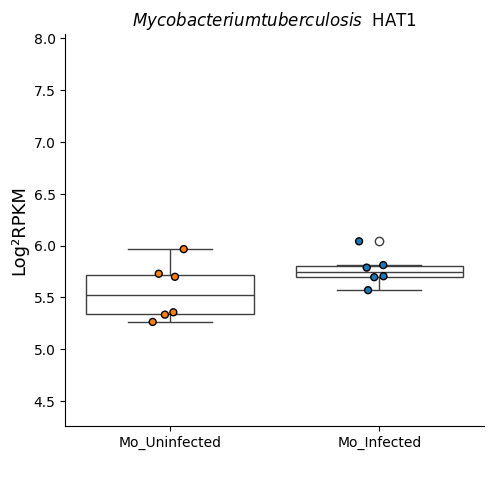

carregando


<Figure size 1000x800 with 0 Axes>

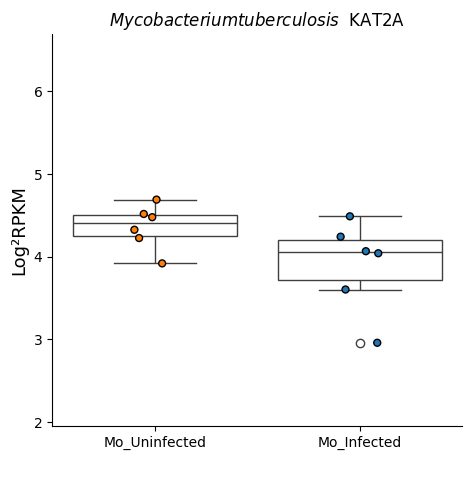

carregando


<Figure size 1000x800 with 0 Axes>

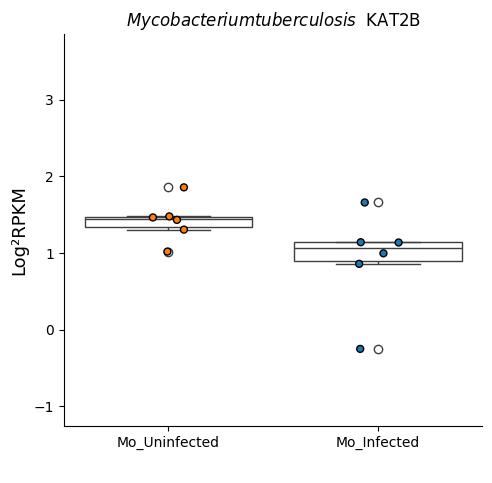

carregando


<Figure size 1000x800 with 0 Axes>

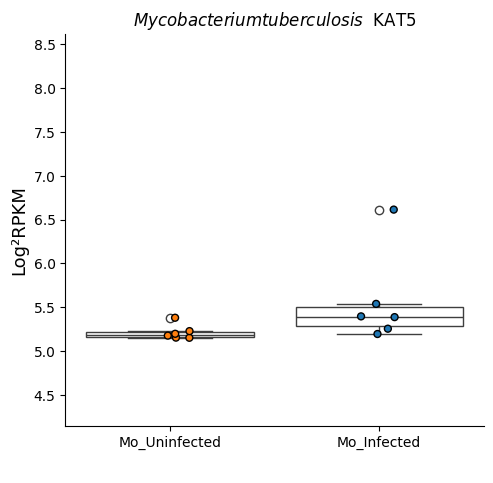

carregando


<Figure size 1000x800 with 0 Axes>

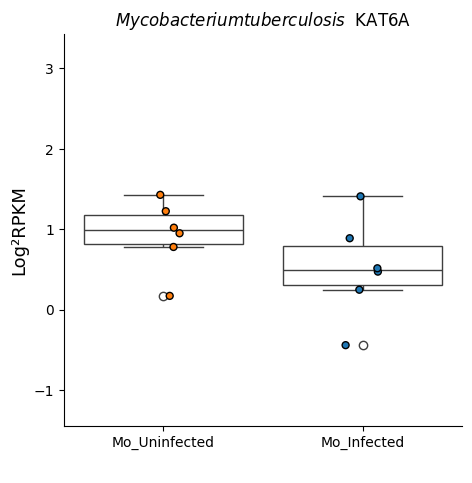

carregando


<Figure size 1000x800 with 0 Axes>

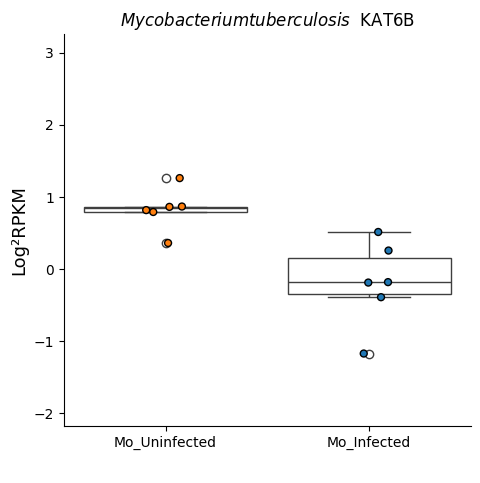

carregando


<Figure size 1000x800 with 0 Axes>

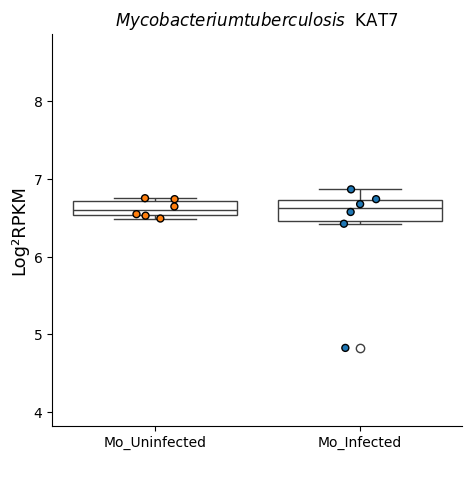

carregando


<Figure size 1000x800 with 0 Axes>

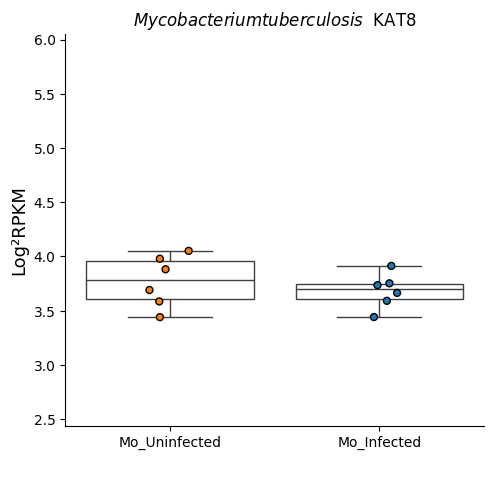

carregando


<Figure size 1000x800 with 0 Axes>

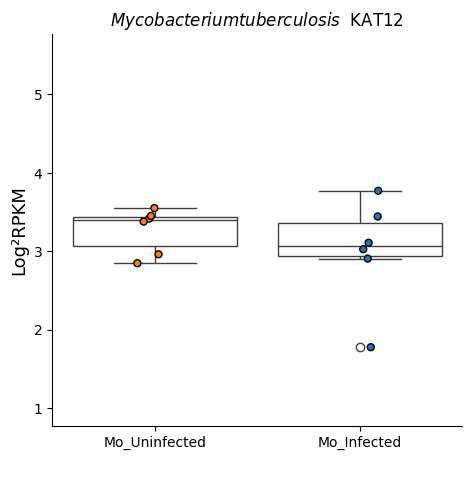

carregando


<Figure size 1000x800 with 0 Axes>

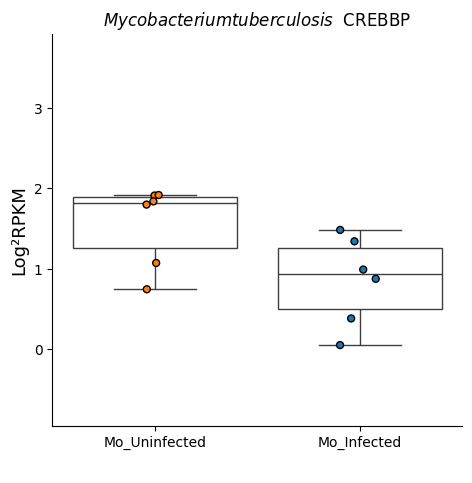

carregando


<Figure size 1000x800 with 0 Axes>

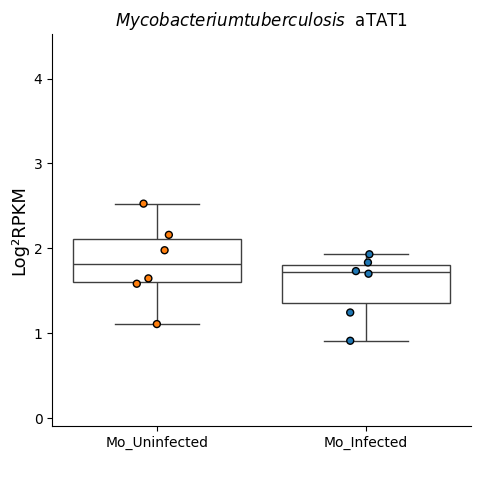

carregando


<Figure size 1000x800 with 0 Axes>

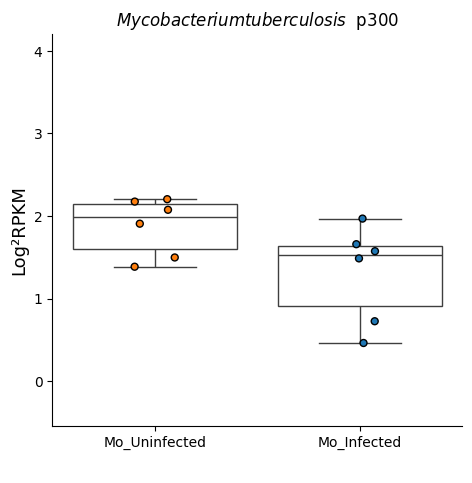

carregando


<Figure size 1000x800 with 0 Axes>

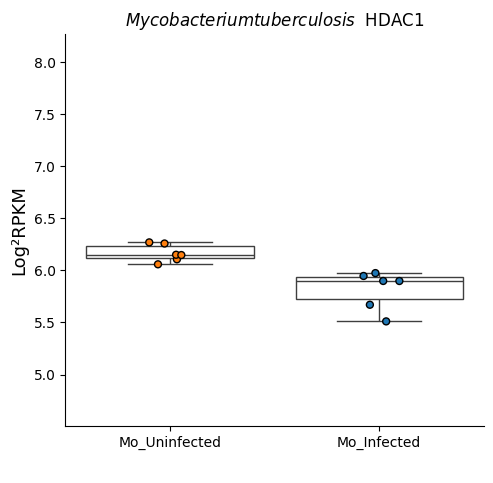

carregando


<Figure size 1000x800 with 0 Axes>

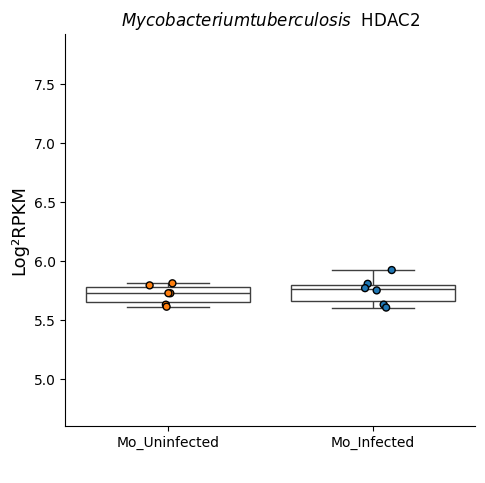

carregando


<Figure size 1000x800 with 0 Axes>

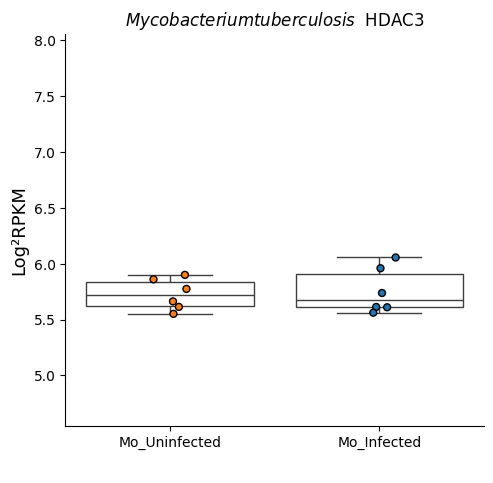

carregando


<Figure size 1000x800 with 0 Axes>

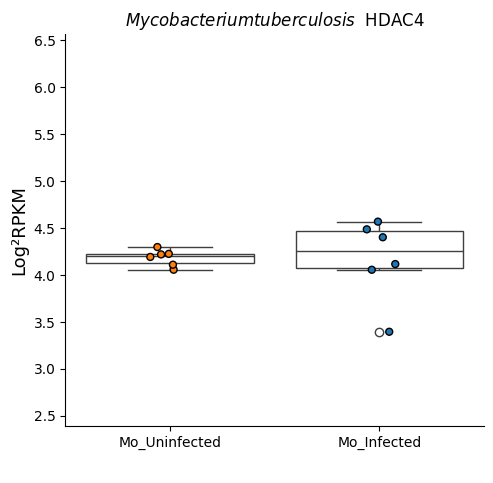

carregando


<Figure size 1000x800 with 0 Axes>

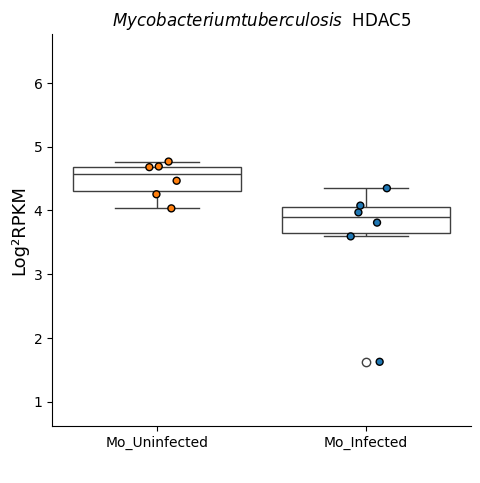

carregando


<Figure size 1000x800 with 0 Axes>

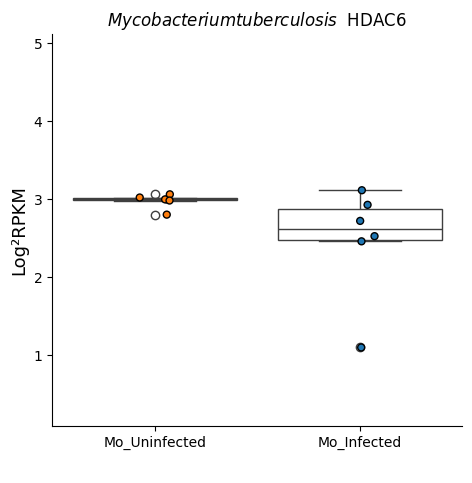

carregando


<Figure size 1000x800 with 0 Axes>

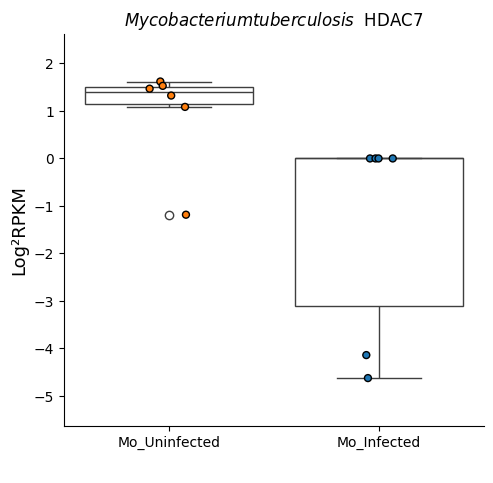

carregando


<Figure size 1000x800 with 0 Axes>

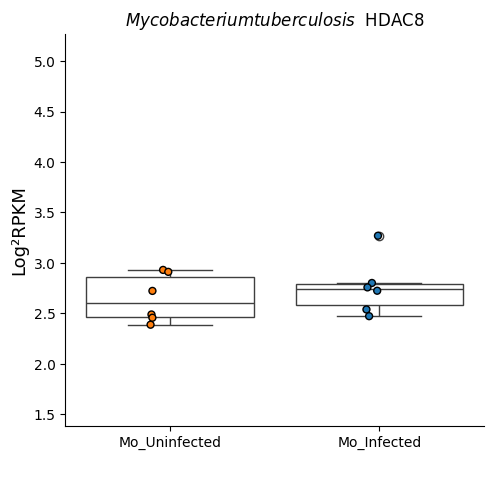

carregando


<Figure size 1000x800 with 0 Axes>

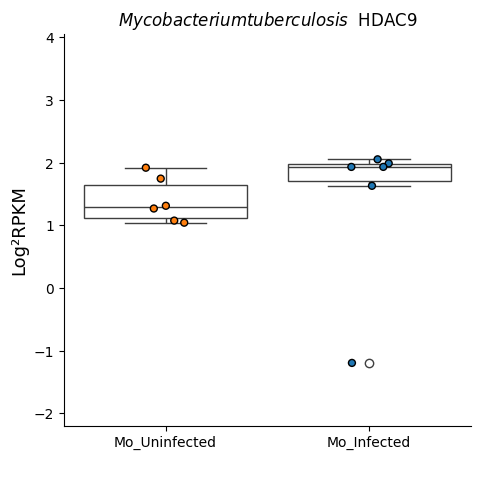

carregando


<Figure size 1000x800 with 0 Axes>

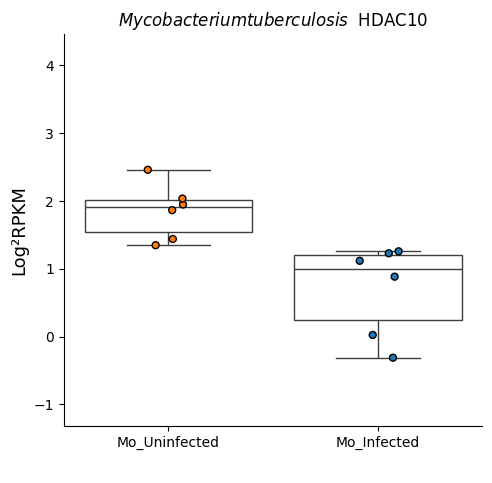

carregando


<Figure size 1000x800 with 0 Axes>

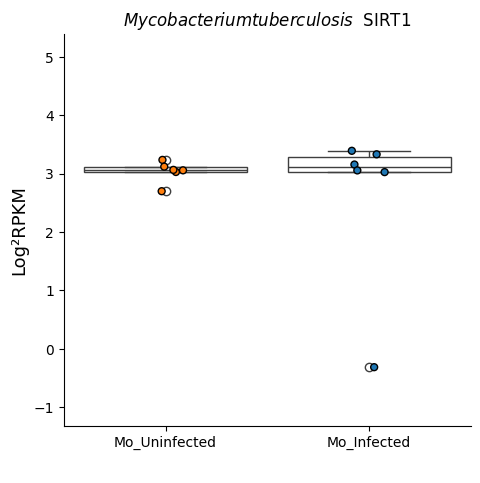

carregando


<Figure size 1000x800 with 0 Axes>

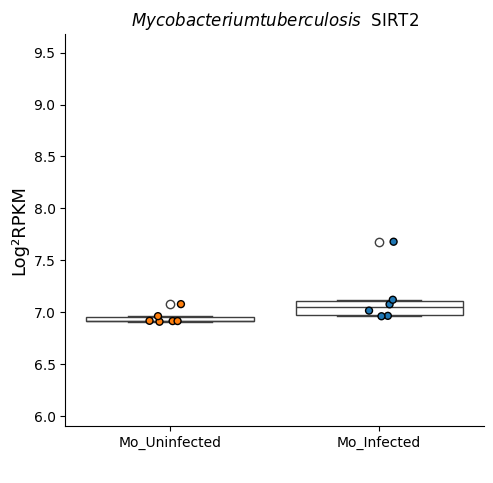

carregando


<Figure size 1000x800 with 0 Axes>

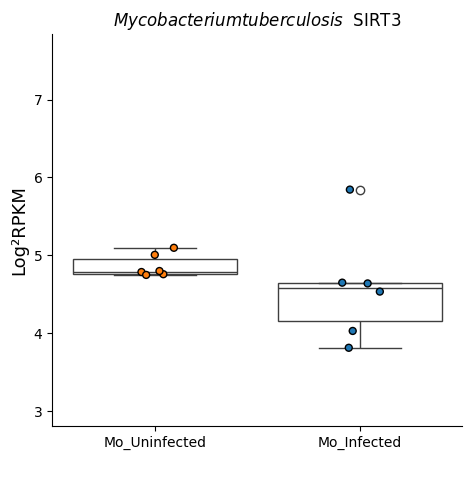

carregando


<Figure size 1000x800 with 0 Axes>

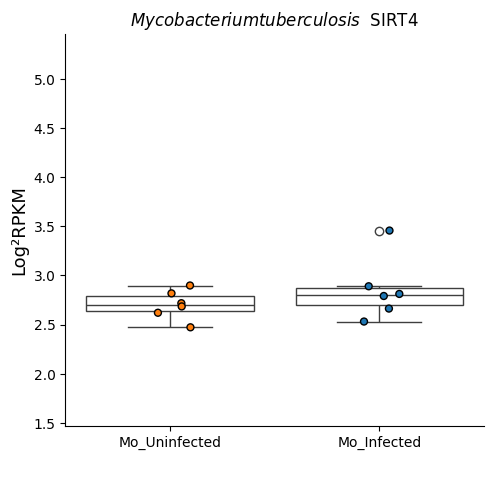

carregando


<Figure size 1000x800 with 0 Axes>

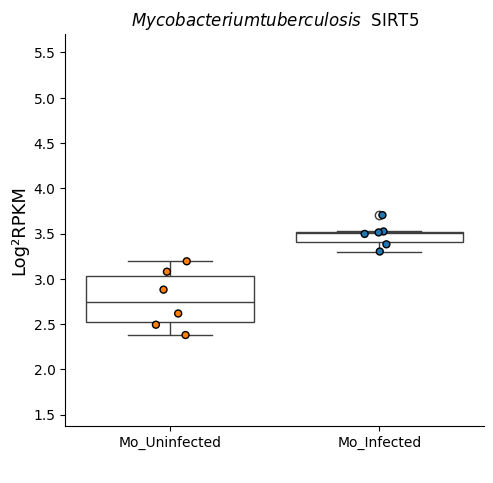

carregando


<Figure size 1000x800 with 0 Axes>

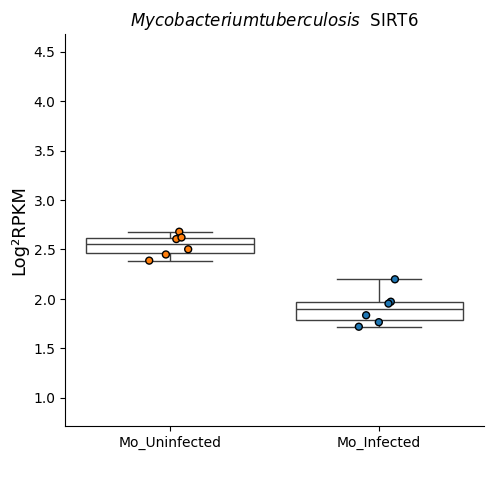

carregando


<Figure size 1000x800 with 0 Axes>

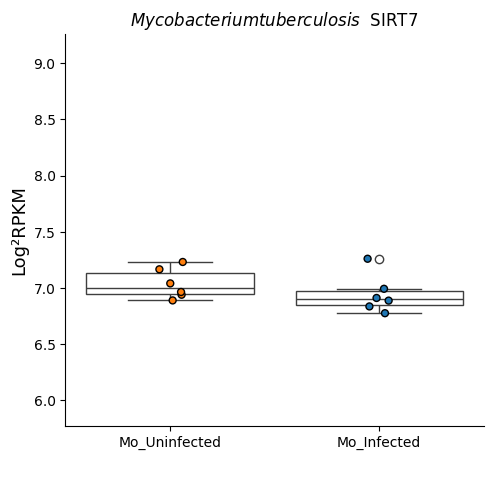

carregando


In [ ]:

graficos_boxplot(SRP151491_df_filtrado, "BuGn", " Mycobacterium tuberculosis", ["Mo_Uninfected", "Mo_Infected" ])



##GSE100897


##GSE141656


##PRJNA707548


##SRP185421


#SARS-CoV-2

## GSE163668

##GSE163959

##GSE166253

##GSE167749